In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import scipy
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.colors as mcolors
sns.set()

In [59]:
raw = pickle.load(open("raw_data/raw_heatmaps.pkl", "rb"))

In [60]:
raw['total_contribution'][centroids[0]]

NameError: name 'centroids' is not defined

In [8]:
rocs = !ls raw_data
rocs

['gru_raw.pkl',
 'retain_best_raw.pkl',
 'retain_raw.pkl',
 'retain_short_raw.pkl']

In [9]:
raw_gru = pickle.load(open(f"raw_data/gru_raw.pkl", "rb"))
raw_retain = pickle.load(open(f"raw_data/retain_best_raw.pkl", "rb"))

In [6]:
r_raw = []
for f in rocs:
    r_raw.append(pickle.load(open(f"raw_data/{f}", "rb")))
r_raw[0]

{'far_list': array([0.1       , 0.22564103, 0.35128205, 0.47692308, 0.6025641 ,
        0.72820513, 0.85384615, 0.97948718, 1.10512821, 1.23076923,
        1.35641026, 1.48205128, 1.60769231, 1.73333333, 1.85897436,
        1.98461538, 2.11025641, 2.23589744, 2.36153846, 2.48717949,
        2.61282051, 2.73846154, 2.86410256, 2.98974359, 3.11538462,
        3.24102564, 3.36666667, 3.49230769, 3.61794872, 3.74358974,
        3.86923077, 3.99487179, 4.12051282, 4.24615385, 4.37179487,
        4.4974359 , 4.62307692, 4.74871795, 4.87435897, 5.        ]),
 'detection_rate': array([0.89811321, 0.90188679, 0.94339623, 0.95471698, 0.95471698,
        0.95471698, 0.95471698, 0.96226415, 0.96226415, 0.96226415,
        0.96603774, 0.96603774, 0.96603774, 0.96603774, 0.96603774,
        0.96981132, 0.96981132, 0.96981132, 0.96981132, 0.96981132,
        0.96981132, 0.96981132, 0.96981132, 0.96981132, 0.96981132,
        0.96981132, 0.96981132, 0.96981132, 0.96981132, 0.96981132,
        0.973584

Text(0, 0.5, 'Detection rate, %')

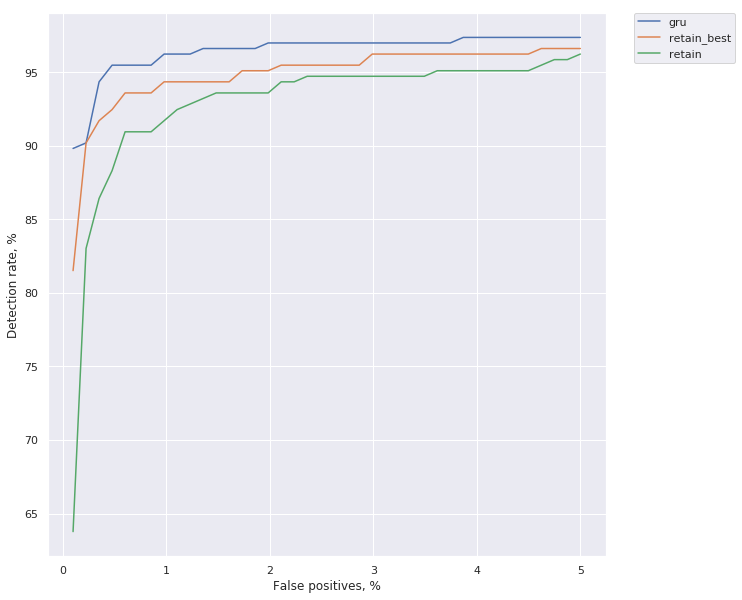

In [7]:
plt.figure(figsize=(10,10))
for r,f in zip(r_raw[:-1], rocs[:-1]):
    plt.plot(r['far_list'], r['detection_rate'] * 100, label=f[:-8])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("False positives, %")
plt.ylabel("Detection rate, %")

In [119]:
far_gru = [0.02684258, 0.02608432, 0.02532605, 0.02487109, 0.02456779,
       0.02411283, 0.02350622, 0.0225963 , 0.02244465, 0.02198969,
       0.02183803, 0.02123142, 0.02092812, 0.0203215 , 0.0200182 ,
       0.01925993, 0.01865332, 0.01835002, 0.01804671, 0.01789506,
       0.01789506, 0.0177434 , 0.0174401 , 0.01728844, 0.01713679,
       0.01683348, 0.01637853, 0.01607522, 0.01577191, 0.01531695,
       0.0151653 , 0.0151653 , 0.01501365, 0.01455869, 0.01410373,
       0.01410373, 0.01395208, 0.01349712, 0.01304216, 0.01289051,
       0.01273885, 0.0125872 , 0.01228389, 0.01213224, 0.01198059,
       0.01182894, 0.01167728, 0.01167728, 0.01122232, 0.01122232,
       0.01107067, 0.01061571, 0.01061571, 0.01031241, 0.01031241,
       0.00985745, 0.00970579, 0.00940249, 0.00925083, 0.00894753,
       0.00894753, 0.00894753, 0.00879588, 0.00879588, 0.00864422,
       0.00864422, 0.00864422, 0.00864422, 0.00834092, 0.00818926,
       0.00803761, 0.00803761, 0.00803761, 0.0077343 , 0.00758265,
       0.00727934, 0.00727934, 0.00712769, 0.00667273, 0.00652108,
       0.00652108, 0.00636943, 0.00636943, 0.00621777, 0.00606612,
       0.00606612, 0.00606612, 0.00606612, 0.00591447, 0.00591447,
       0.00545951, 0.00545951, 0.0051562 , 0.0051562 , 0.0051562 ,
       0.00500455, 0.0048529 , 0.00470124, 0.00409463, 0.00379133]


In [120]:
dr_gru = [0.94779116, 0.94779116, 0.94779116, 0.94779116, 0.94578313,
       0.9437751 , 0.9437751 , 0.94176707, 0.94176707, 0.94176707,
       0.94176707, 0.94176707, 0.94176707, 0.94176707, 0.94176707,
       0.93975904, 0.93975904, 0.93975904, 0.937751  , 0.937751  ,
       0.937751  , 0.937751  , 0.937751  , 0.937751  , 0.937751  ,
       0.937751  , 0.937751  , 0.937751  , 0.937751  , 0.93574297,
       0.93574297, 0.93574297, 0.93574297, 0.93373494, 0.93373494,
       0.93172691, 0.93172691, 0.92971888, 0.92771084, 0.92771084,
       0.92771084, 0.92771084, 0.92771084, 0.92771084, 0.92570281,
       0.92570281, 0.91967871, 0.91967871, 0.91767068, 0.91566265,
       0.91365462, 0.91365462, 0.91365462, 0.91365462, 0.91164659,
       0.90763052, 0.90763052, 0.90763052, 0.90763052, 0.90763052,
       0.90763052, 0.90763052, 0.90763052, 0.90763052, 0.90763052,
       0.90763052, 0.90763052, 0.90763052, 0.90562249, 0.90562249,
       0.90562249, 0.90361446, 0.90160643, 0.90160643, 0.89959839,
       0.89959839, 0.89759036, 0.89558233, 0.8935743 , 0.89156627,
       0.8875502 , 0.8875502 , 0.8875502 , 0.8875502 , 0.88554217,
       0.87951807, 0.87951807, 0.87751004, 0.87751004, 0.87751004,
       0.87550201, 0.87550201, 0.87148594, 0.86947791, 0.86947791,
       0.86947791, 0.86947791, 0.86947791, 0.86947791, 0.86947791]


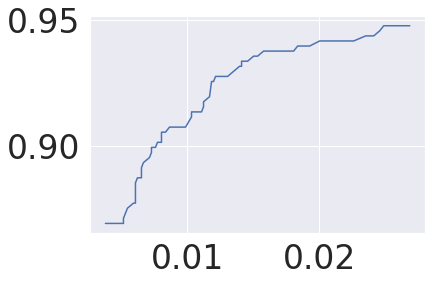

In [127]:
plt.plot(far_gru, dr_gru)

In [41]:
far_gru = raw_gru['far_list']
dr_gru = raw_gru['detection_rate'] * 100

gru_augmented = (raw_retain['far_list'], raw_retain['detection_rate'] * 100)

(0.1, 2.5)

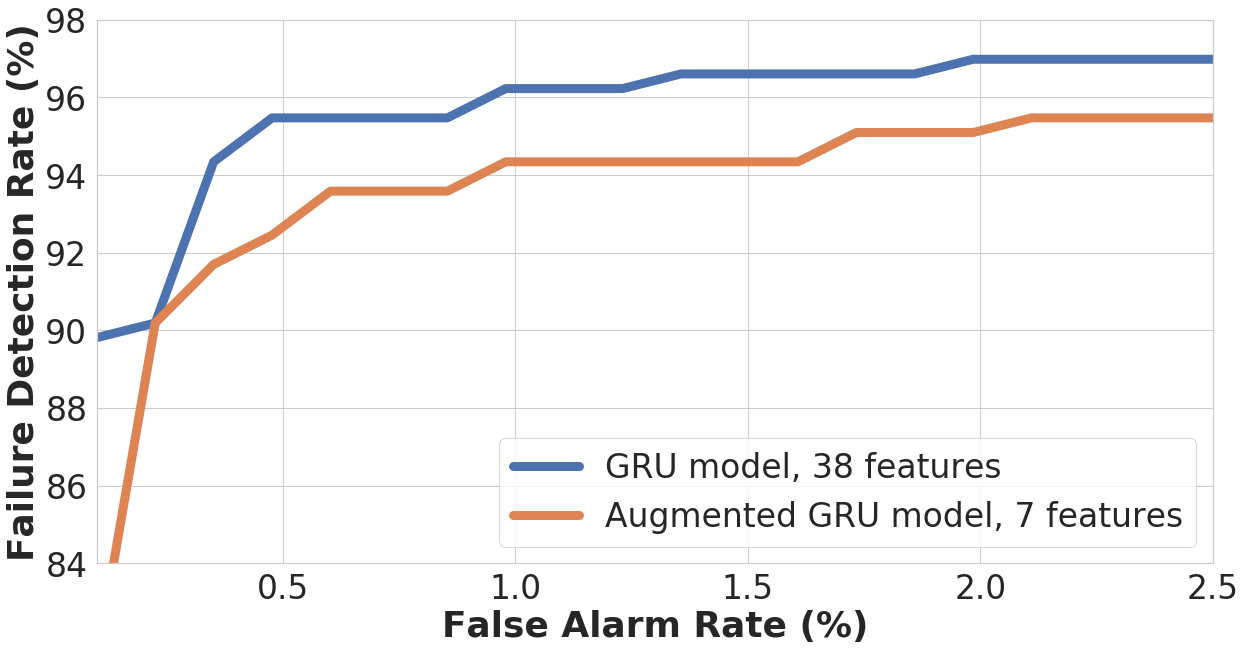

In [52]:
plt.figure(figsize=(20,10))

sns.set(font_scale=3, style='whitegrid')

plt.plot(np.array(far_gru), np.array(dr_gru), label="GRU model, 38 features", linewidth=9)
plt.plot(*gru_augmented, label="Augmented GRU model, 7 features", linewidth=9)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend()
# plt.title("Model Performance Comparison")
plt.xlabel("False Alarm Rate (%)", weight='bold')
plt.ylabel("Failure Detection Rate (%)", weight='bold')
plt.ylim(84, 98)
plt.xlim(0.1, 2.5)

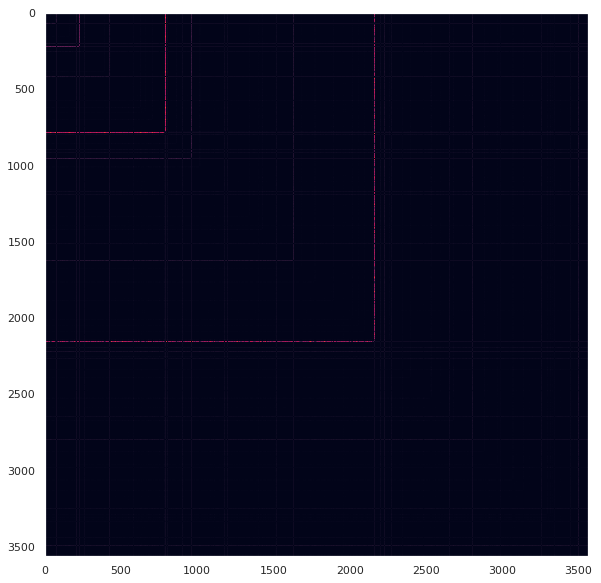

In [781]:
sns.set(style='dark')
plt.figure(figsize=(10,10))
plt.imshow(T)

In [2]:
raw = pickle.load(open("logs/fit/RETAIN_HDD/20191012-104155/heatmaps/raw.pkl", "rb"))

In [3]:
raw.keys()

dict_keys(['coefficients', 'total_contribution', 'names'])

In [4]:
len(raw['names'])

3566

In [53]:
def plot1d(data1, data2, ylabel1='', ylabel2=''):
    sns.set(font_scale=1.7, style='whitegrid')
    
    plt.figure(figsize=(15, 10))
    
    
    plt.subplot(2, 1, 1)
    plt.ylabel(ylabel1, weight='bold', fontsize=20)
    plt.xlabel('Days in advance', weight='bold')
    plt.plot(data1)
    
    plt.xticks([*np.arange(0, data1.shape[0], 50.0)[:-1], data1.shape[0]])
    plt.draw()
    
    labels = [item.get_text() for item in plt.gca().get_xticklabels()]
    labels[0] = 'today'
#     labels = ['', *labels[:-1]]
    plt.gca().set_xticklabels(labels[::-1])
        
    plt.subplot(2, 1, 2)
    plt.ylabel(ylabel2, weight='bold', fontsize=20)
    plt.xlabel('Days in advance', weight='bold')
    plt.plot(data2)
    
    plt.xticks([*np.arange(0, data1.shape[0], 50.0)[:-1], data1.shape[0]])
    plt.draw()
    
    labels = [item.get_text() for item in plt.gca().get_xticklabels()]
    labels[0] = 'today'
#     labels = ['', *labels[:-1]]
    plt.gca().set_xticklabels(labels[::-1])
    
    plt.tight_layout()

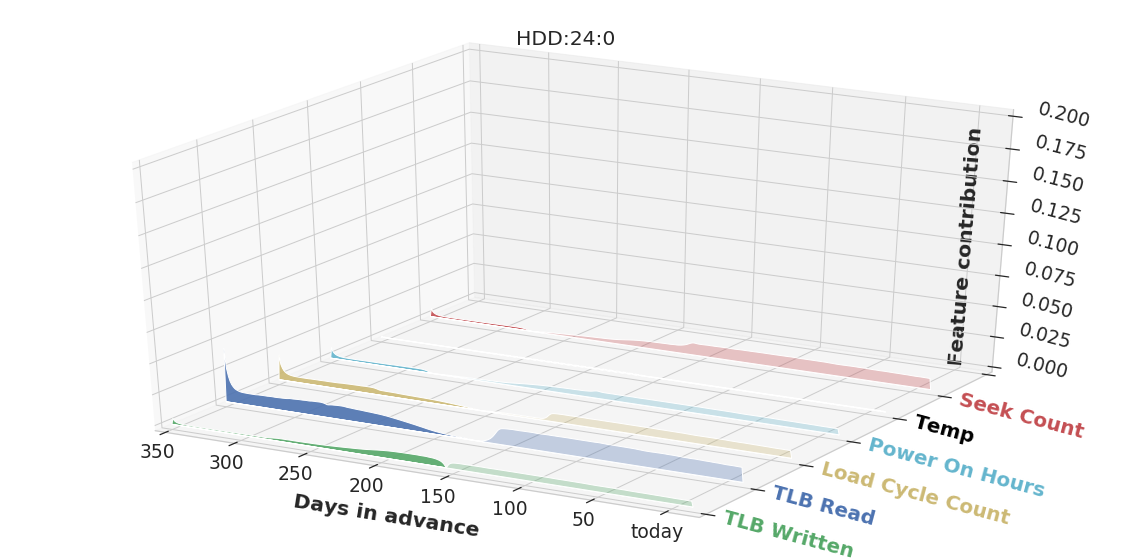

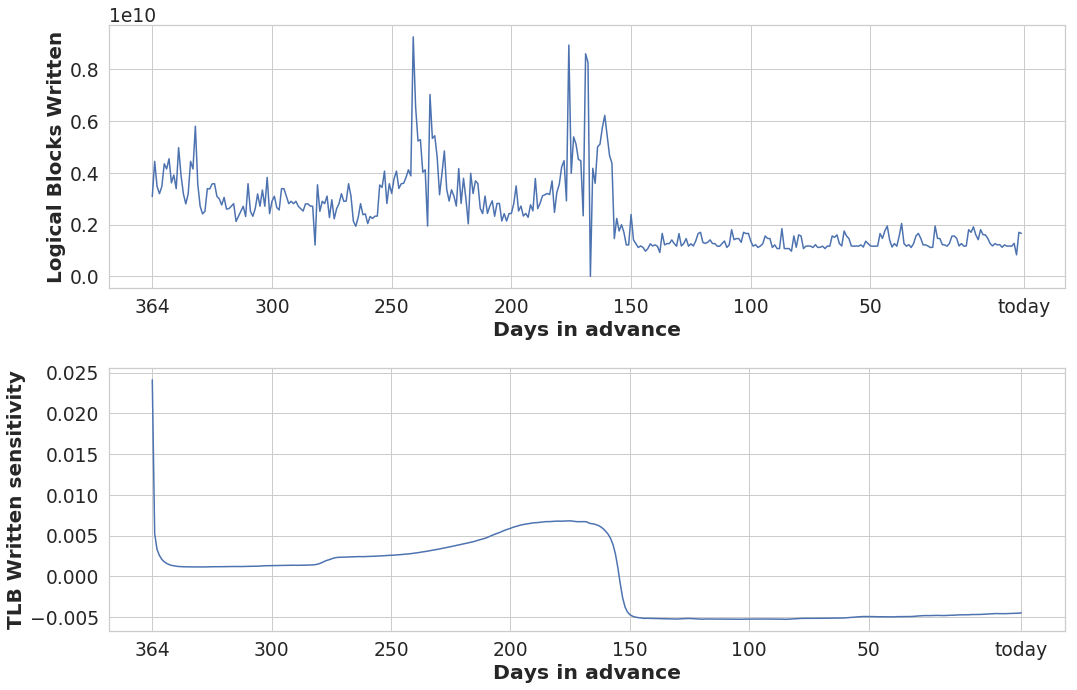

In [64]:
_idx = 4
plotmat(get_mat(_idx), title=raw['names'][2].decode())

labels =[
                    "Current Pending Sector Count",
                    "Total Logical Blocks Written",
                    "Total Logical Blocks Read",
                    "Load Cycle Coun",
                    "Power On Hours",
                    "Temperature",
                    "Seek Count"
                ]

# sns.set()
t = raw["total_contribution"][_idx]
c = raw["coefficients"][_idx]
x = t / c

# for i in range(x.shape[1]):
#     if labels[i] == "Temperature":
#         plot1d(x[:, i], c[:, -2], 'Temperature (C)', "TLB Written sensitivity")
tlb = (1.47946e11-5.52785e10)*(np.power(1 + x[:, 1],10)-1) + 5.52785e10
plot1d(tlb[1:] - tlb[:-1], t[:, 1], 'Logical Blocks Written', "TLB Written sensitivity")

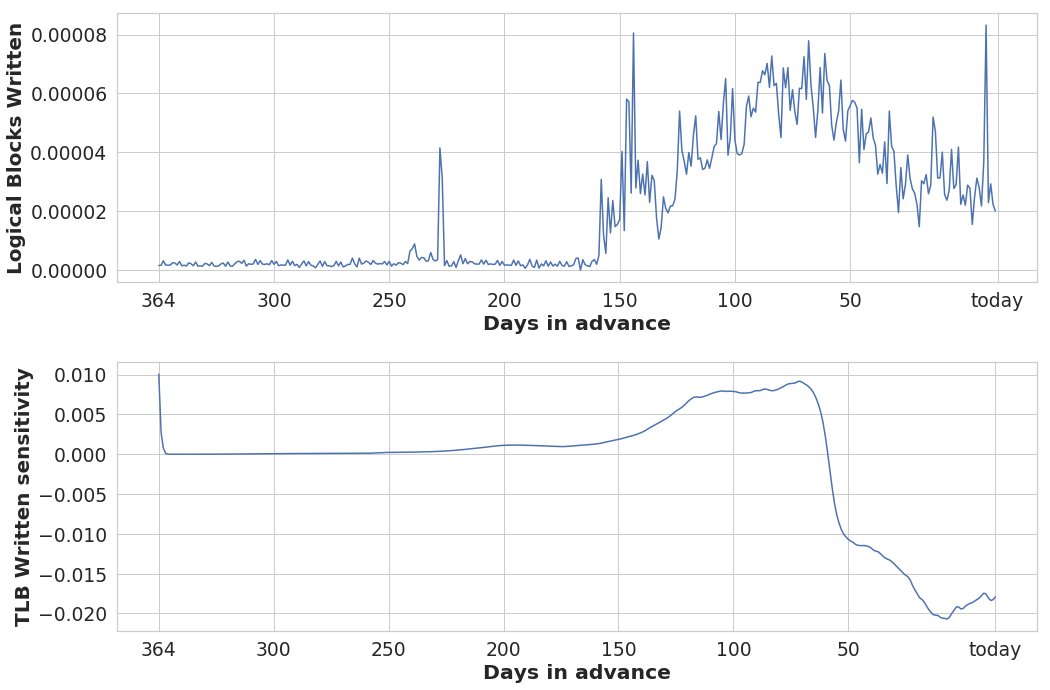

30


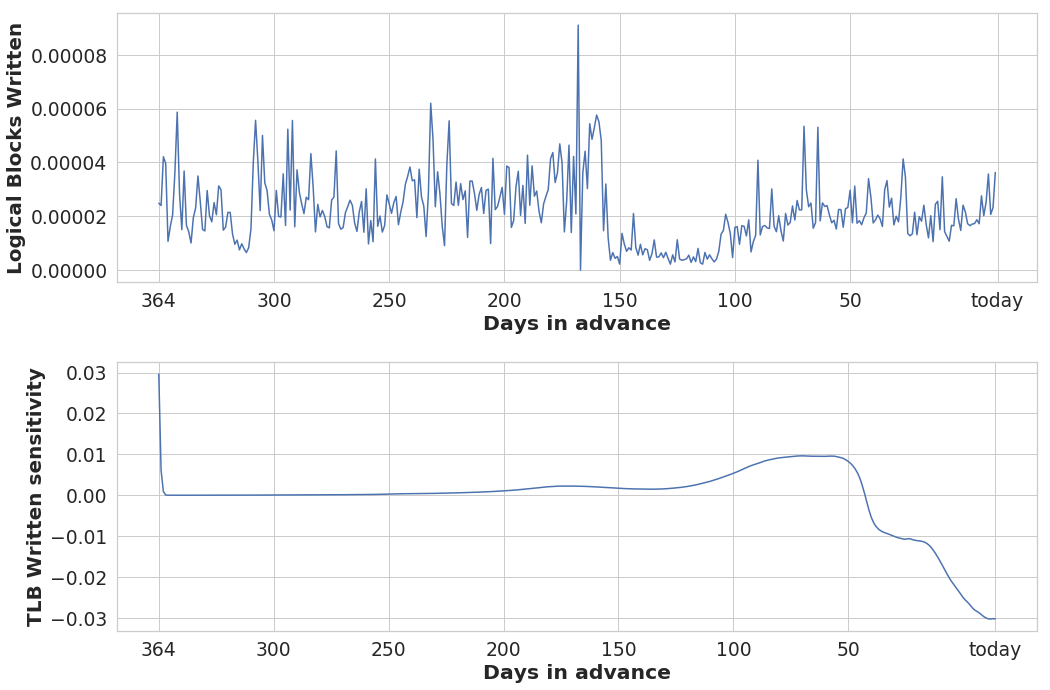

31


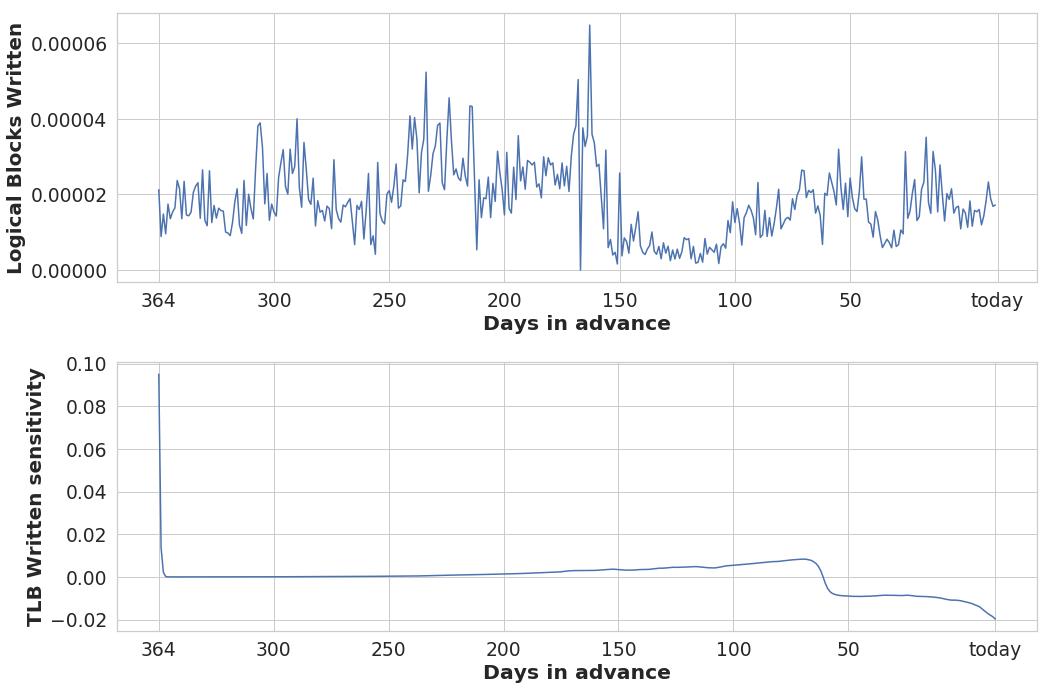

32


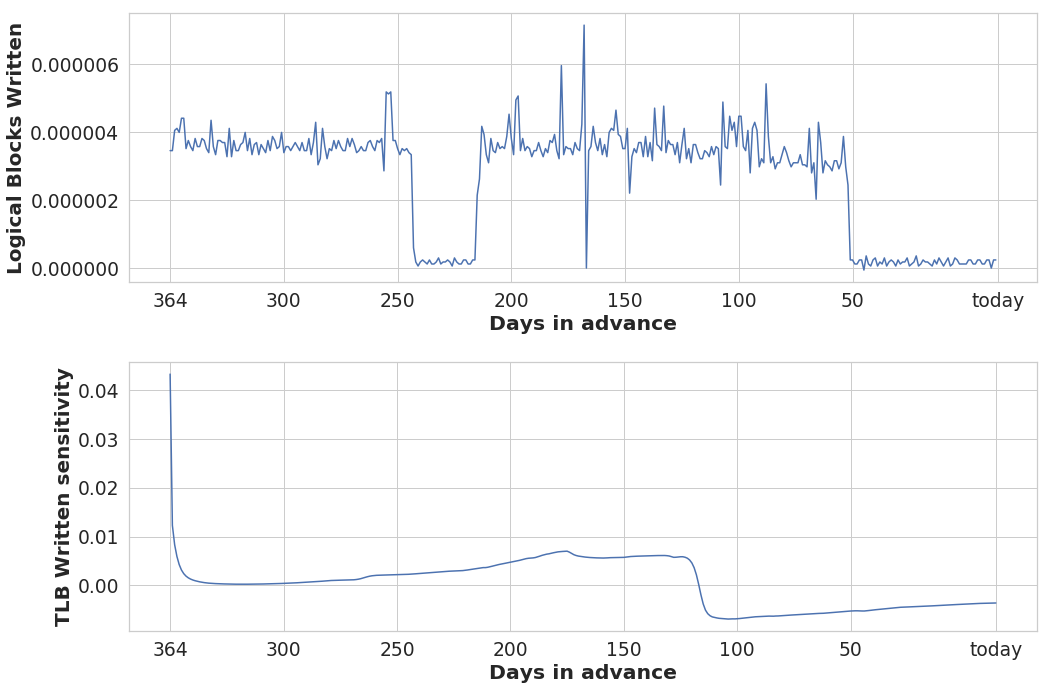

33


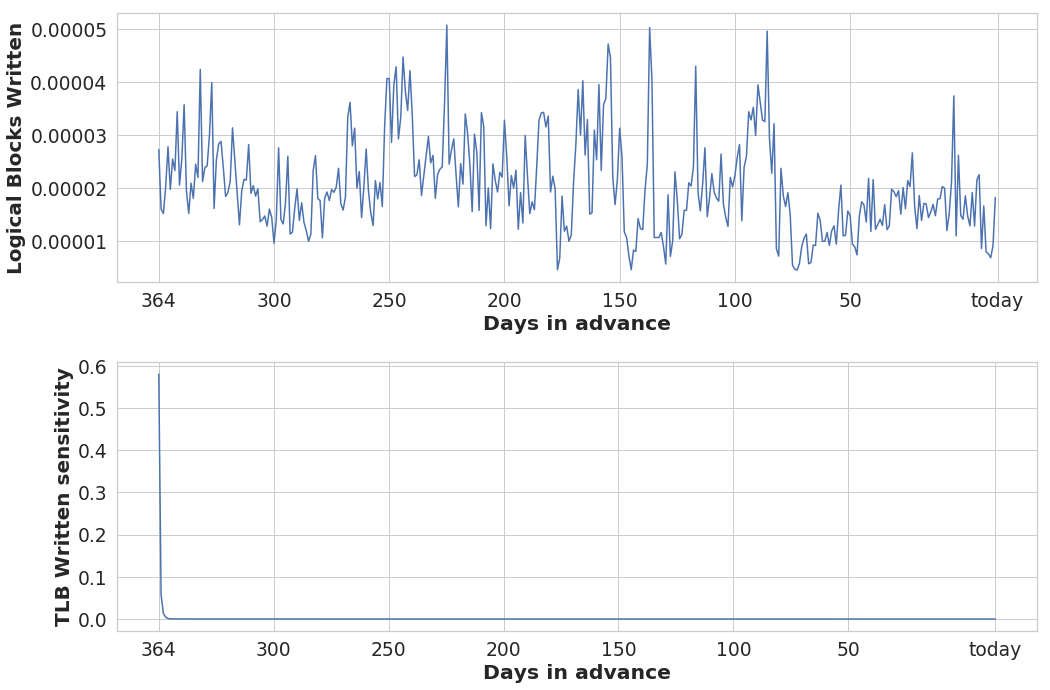

34


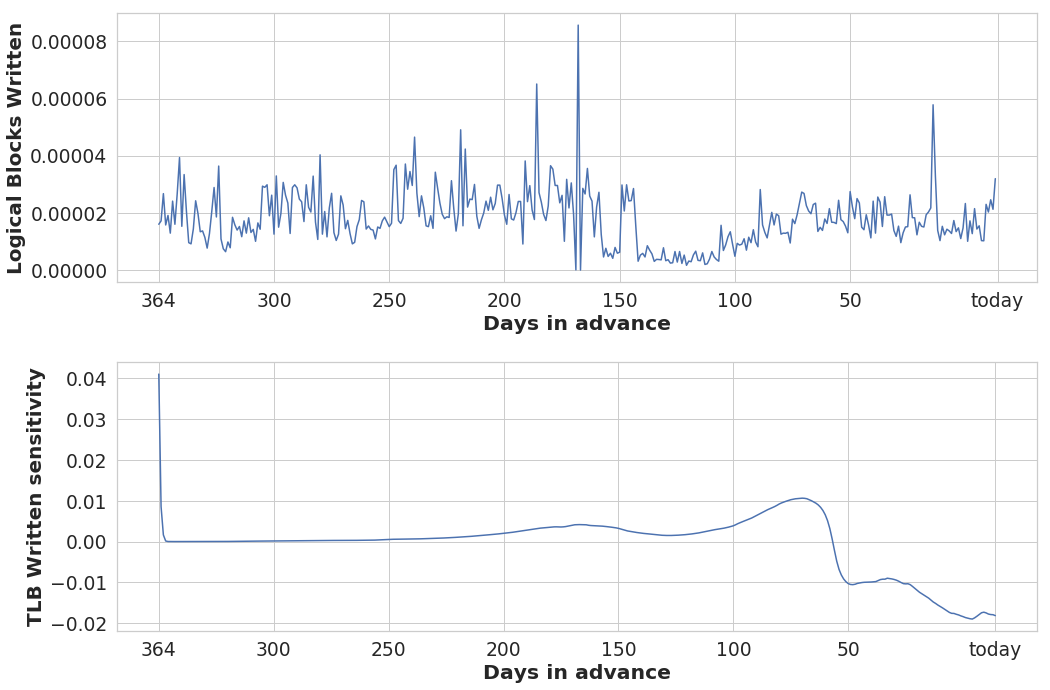

35


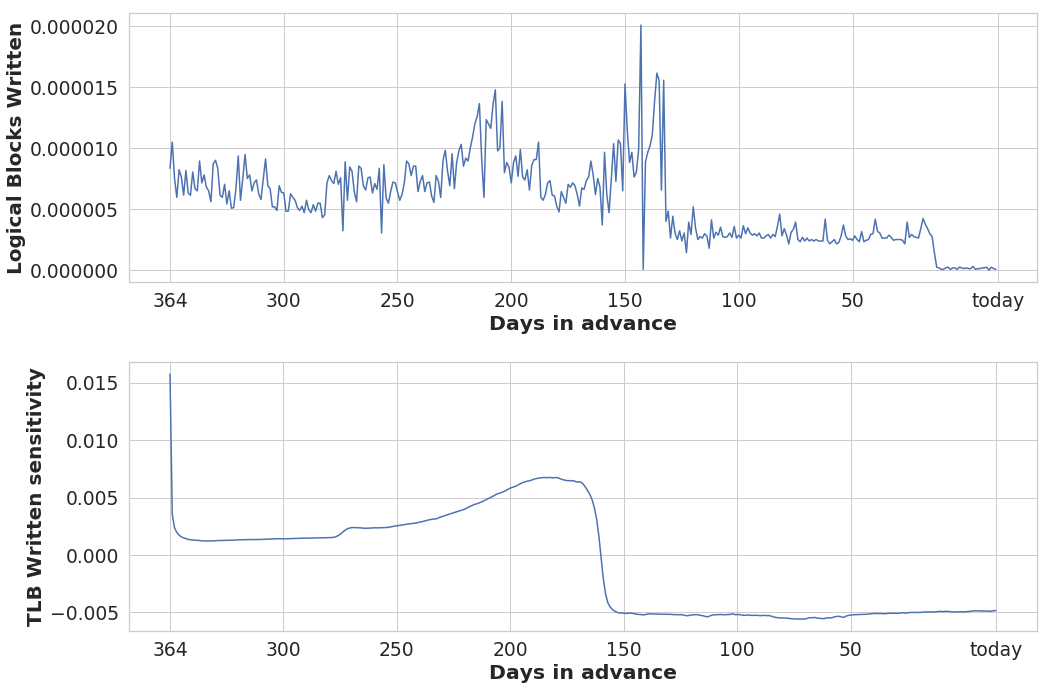

36


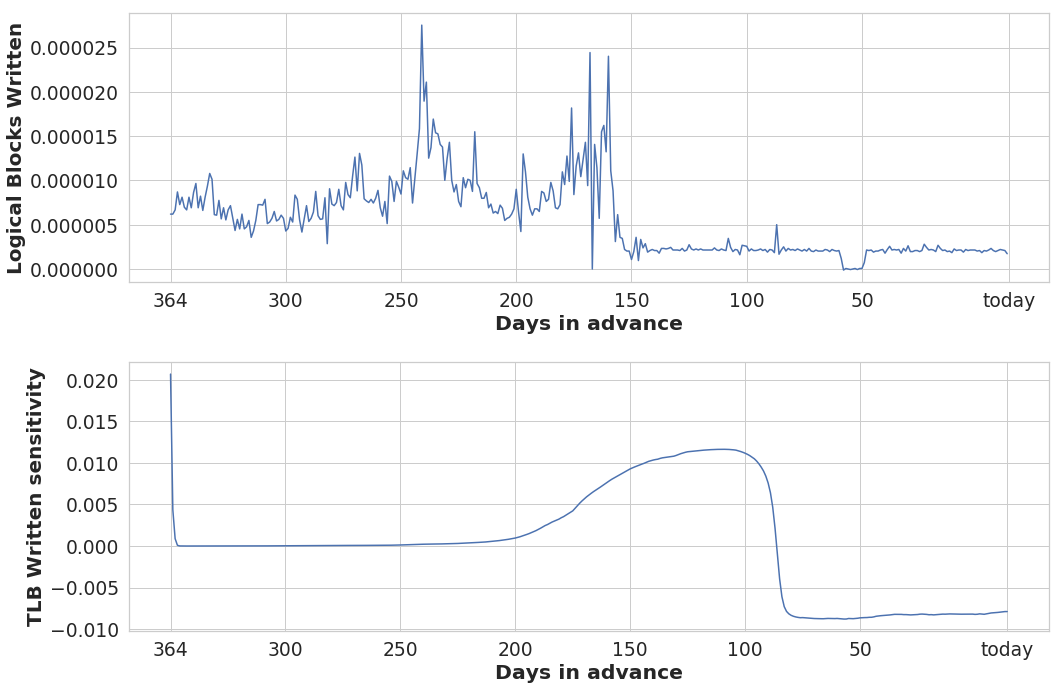

37


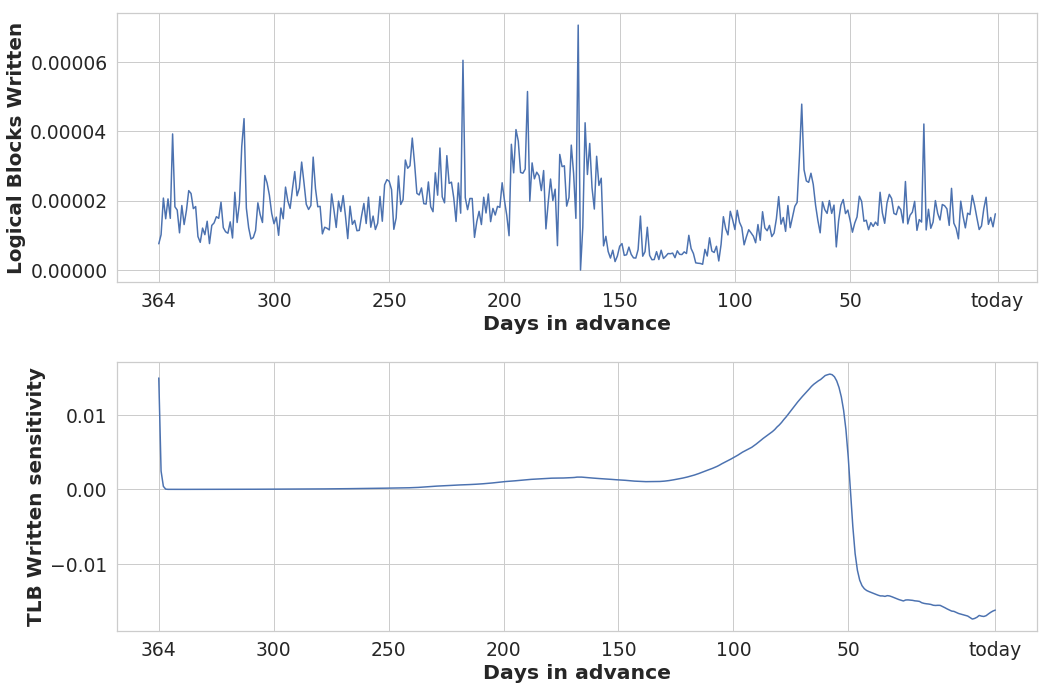

38


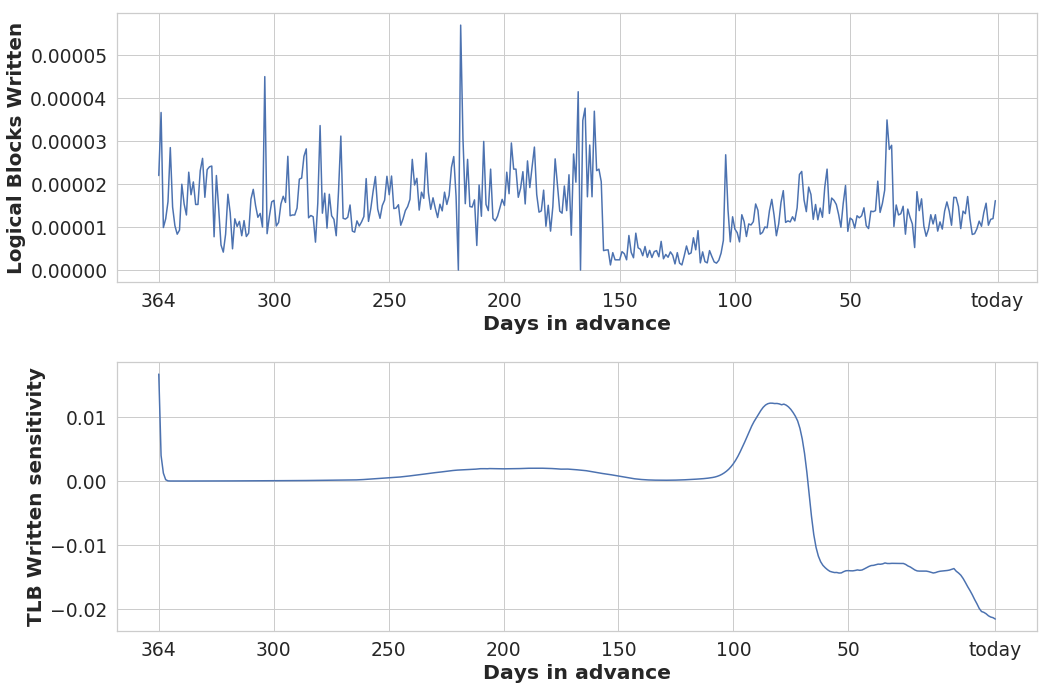

39


In [67]:
for i in range(30,40):
    t = raw["total_contribution"][i]
    c = raw["coefficients"][i]
    x = t / c
    
    plot1d(- x[:-1, 1] + x[1:, 1], t[:, 1], 'Logical Blocks Written', "TLB Written sensitivity")
    plt.show()
    print(i)

In [ ]:
for i, (c, t, n) in enumerate(zip(*raw.values())):
    if i < 300:
        print(i)
        show(t, 10)

In [668]:
j = 0
neg_idx = []
for i, (c, t, n) in enumerate(zip(*raw.values())):
    if n[-1] - ord('0'):
        neg_idx.append(i)
neg_idx, len(neg_idx)

([34,
  75,
  116,
  124,
  132,
  134,
  146,
  157,
  172,
  206,
  224,
  226,
  227,
  229,
  244,
  258,
  261,
  279,
  280,
  290,
  327,
  336,
  341,
  384,
  392,
  407,
  417,
  422,
  453,
  458,
  486,
  500,
  541,
  545,
  547,
  575,
  580,
  590,
  631,
  635,
  649,
  671,
  688,
  719,
  739,
  750,
  769,
  781,
  783,
  789,
  793,
  803,
  873,
  901,
  903,
  905,
  908,
  910,
  930,
  933,
  935,
  939,
  955,
  960,
  975,
  983,
  987,
  991,
  1011,
  1047,
  1083,
  1088,
  1094,
  1111,
  1118,
  1140,
  1156,
  1167,
  1169,
  1176,
  1178,
  1190,
  1196,
  1201,
  1207,
  1213,
  1236,
  1262,
  1282,
  1295,
  1319,
  1328,
  1329,
  1332,
  1334,
  1339,
  1402,
  1411,
  1441,
  1448,
  1453,
  1459,
  1460,
  1485,
  1486,
  1496,
  1501,
  1517,
  1519,
  1549,
  1555,
  1567,
  1568,
  1572,
  1582,
  1588,
  1594,
  1628,
  1641,
  1643,
  1657,
  1679,
  1709,
  1736,
  1765,
  1768,
  1771,
  1778,
  1780,
  1790,
  1801,
  1810,
  1827,
  1836

34


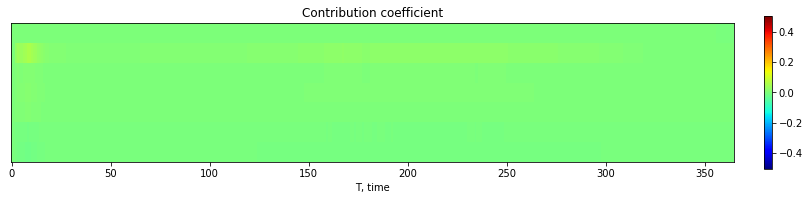

75


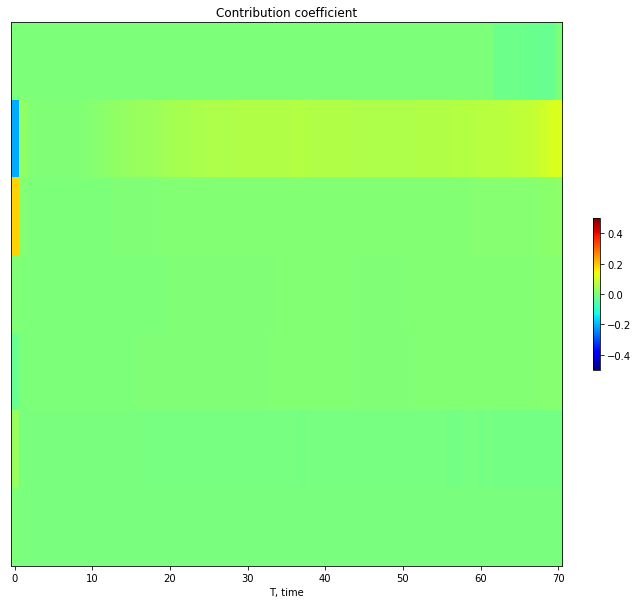

116


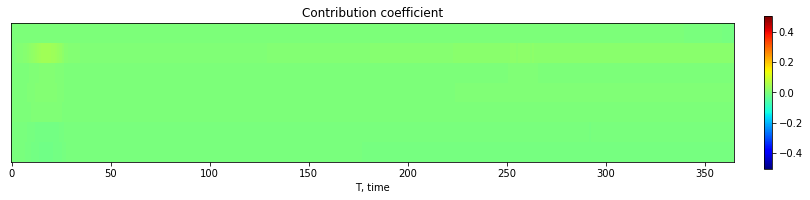

124


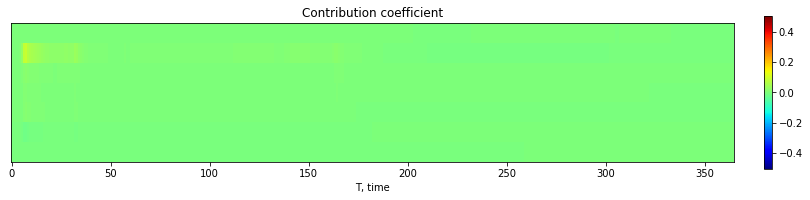

132


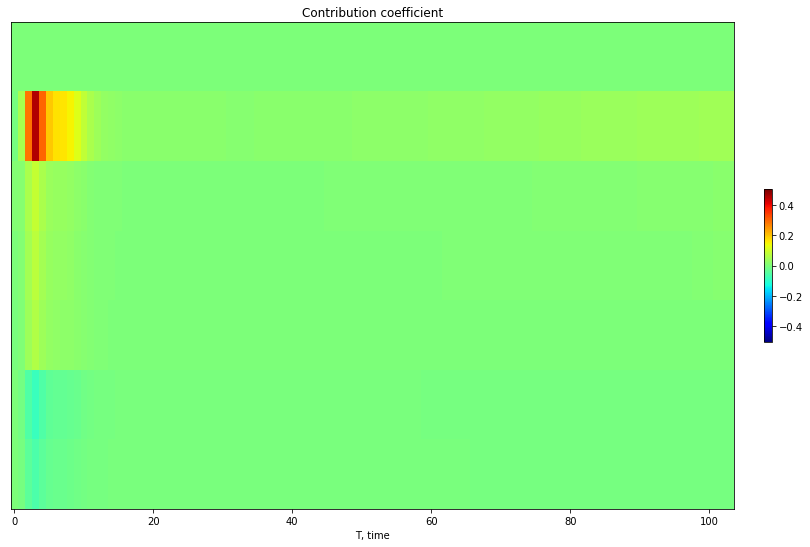

134


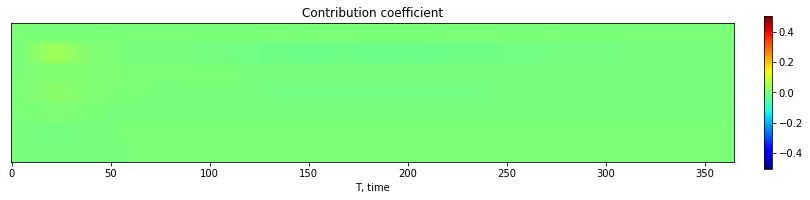

146


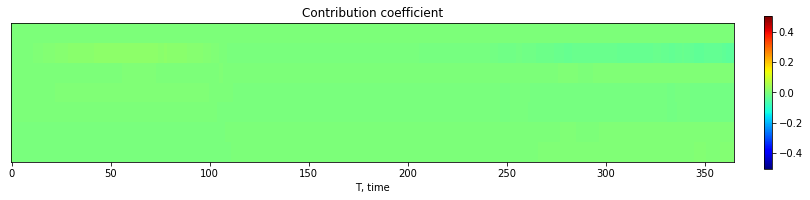

157


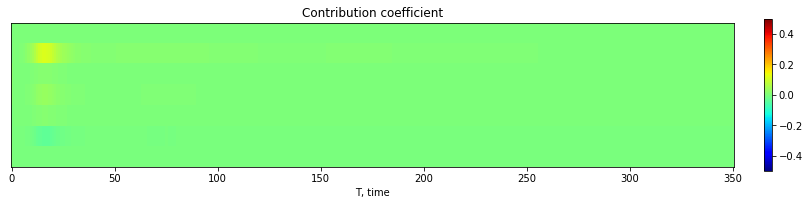

172


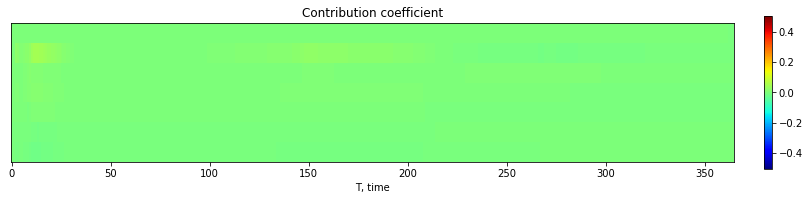

206


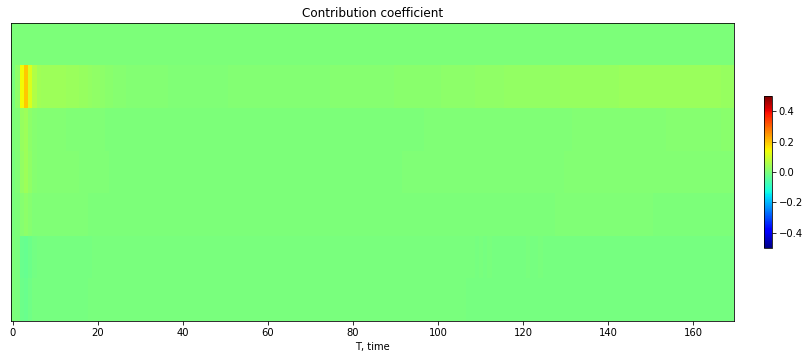

224


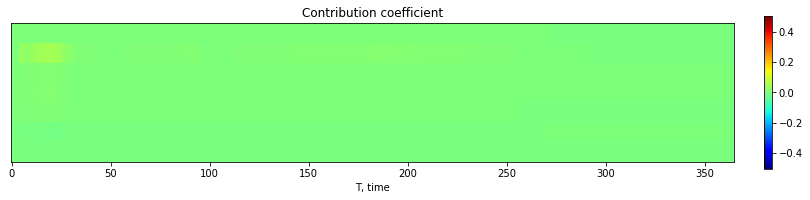

226


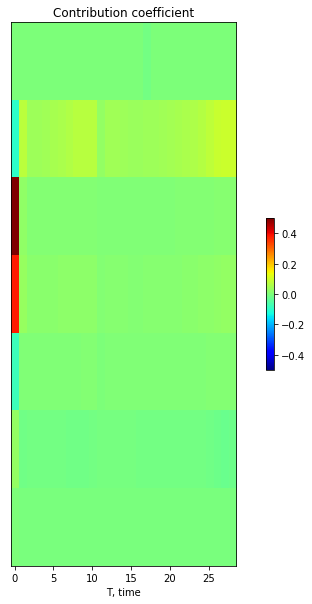

227


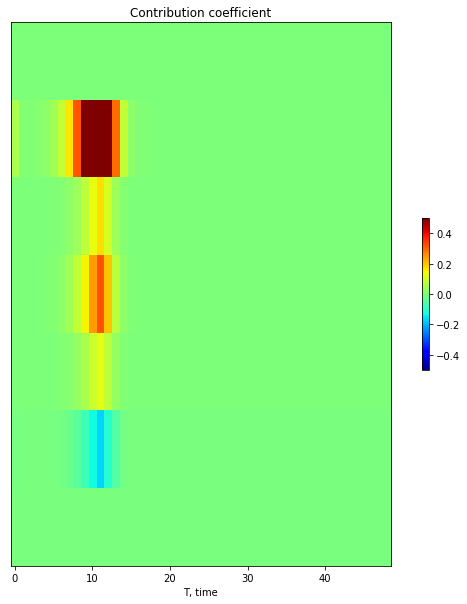

229


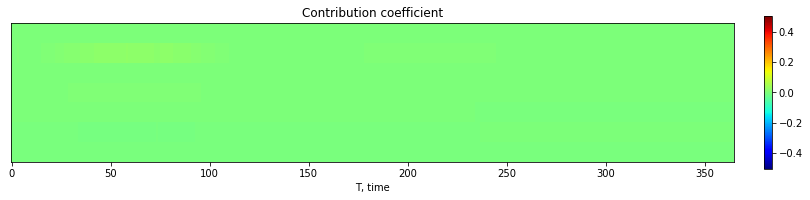

244


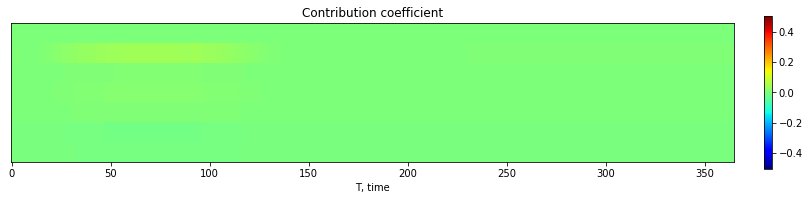

258


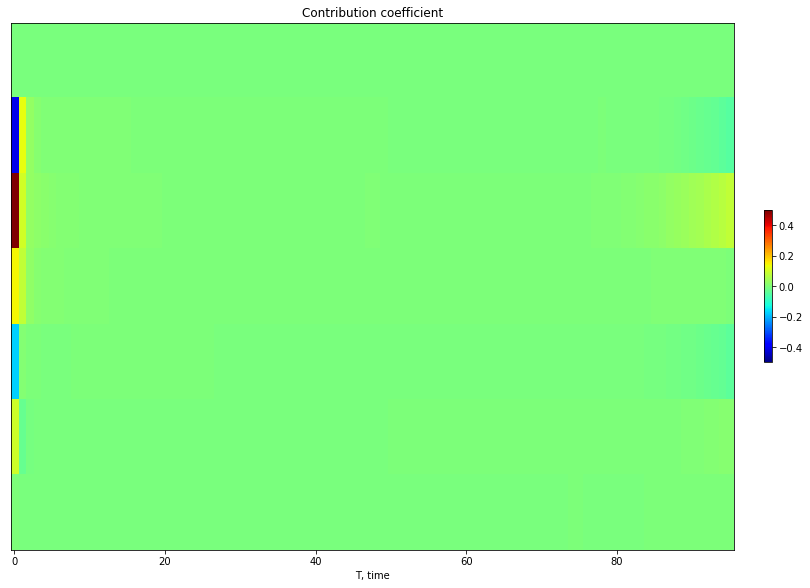

261


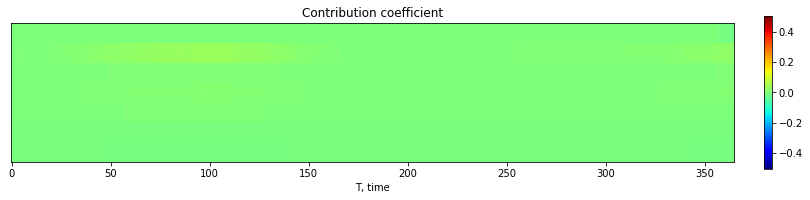

279


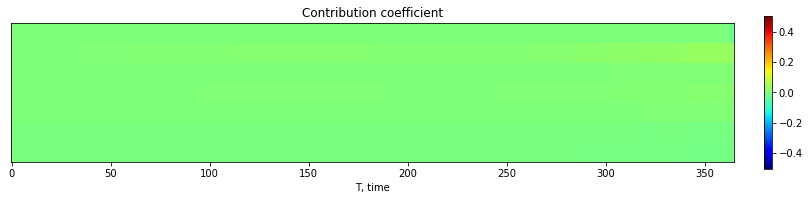

280


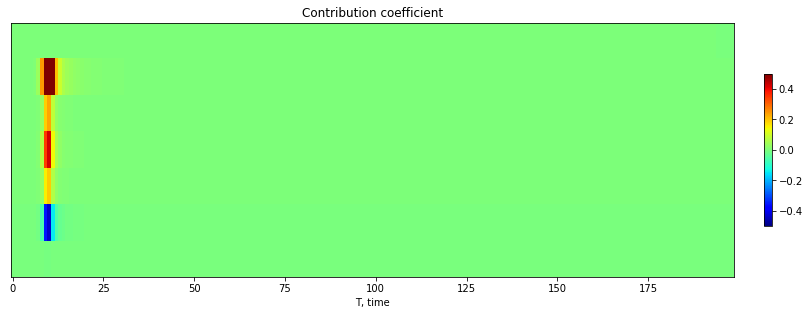

290


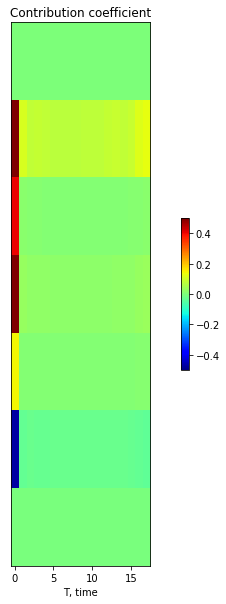

327


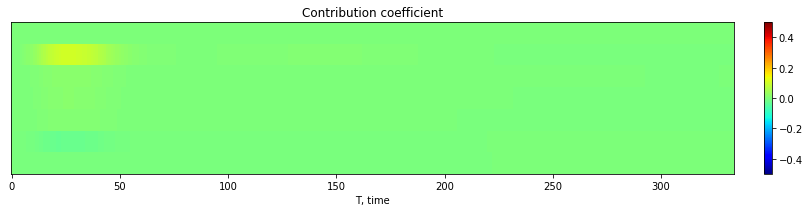

336


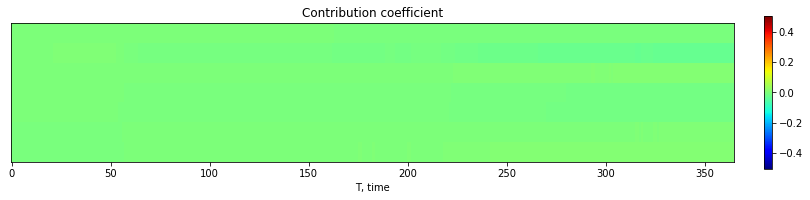

341


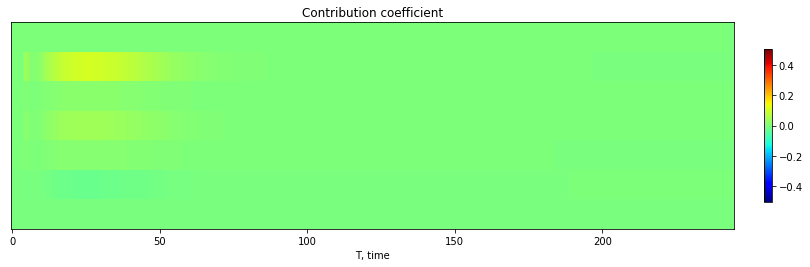

384


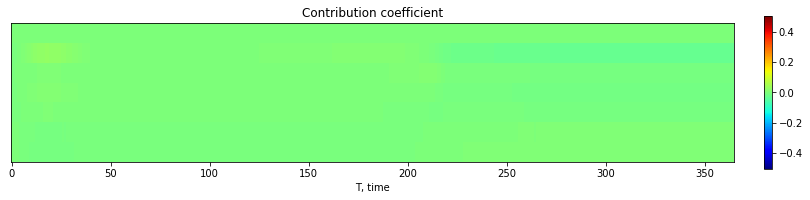

392


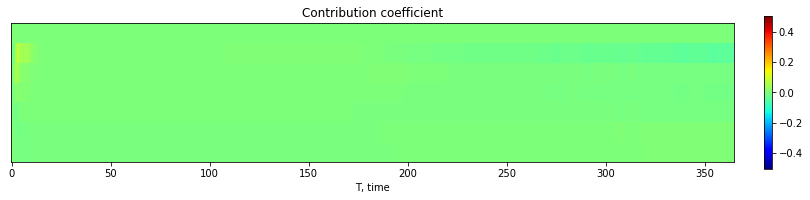

407


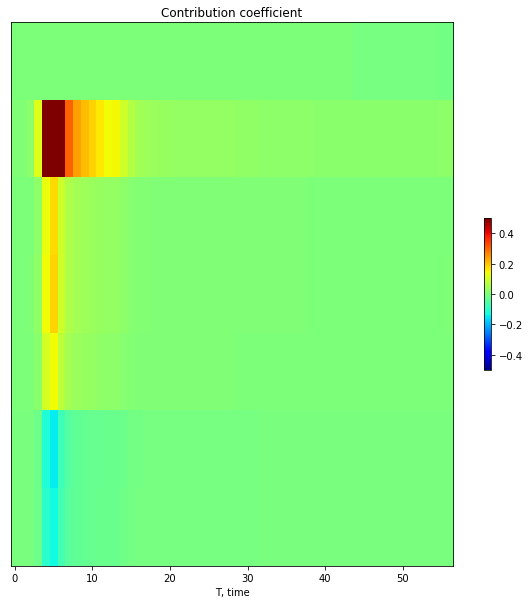

417


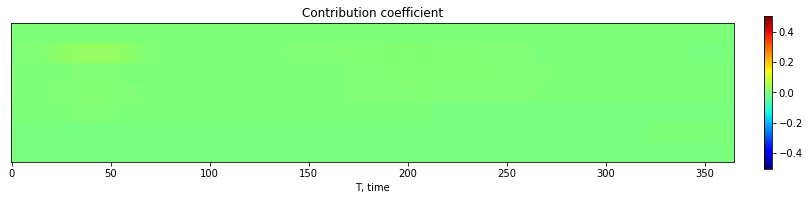

422


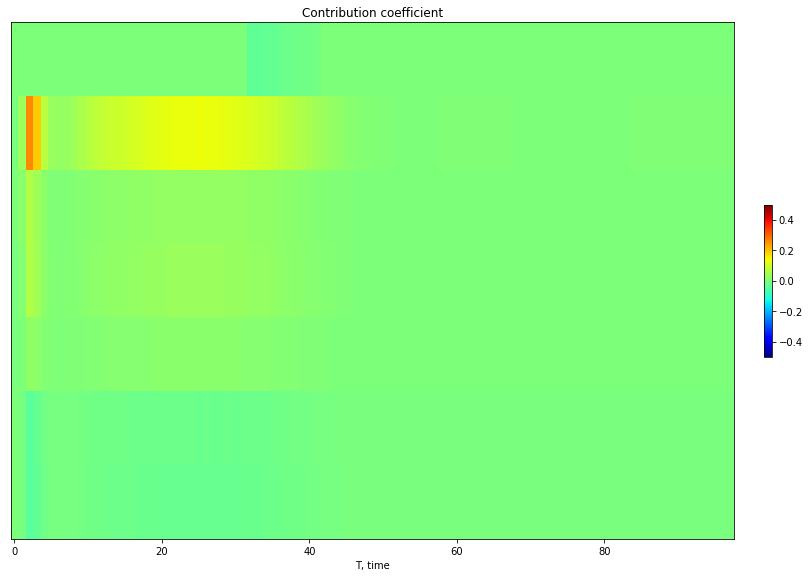

453


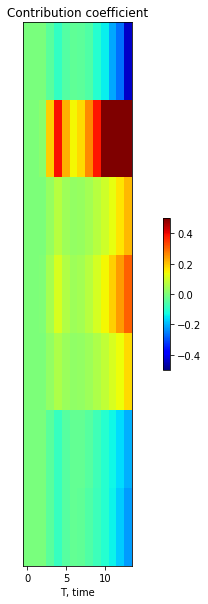

458


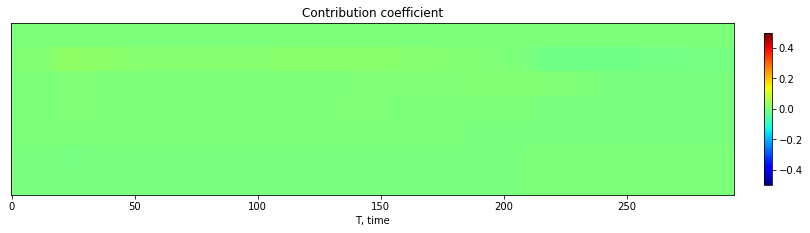

486


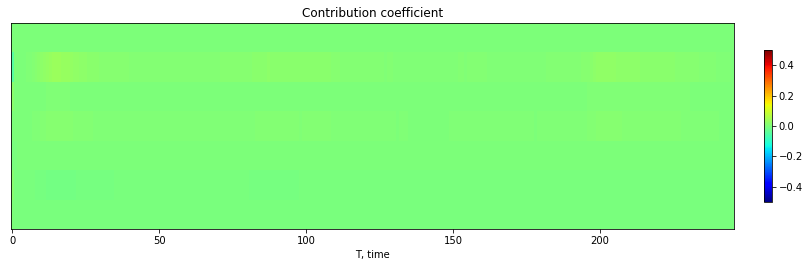

500


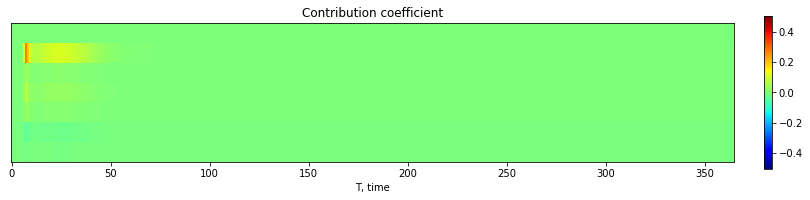

541


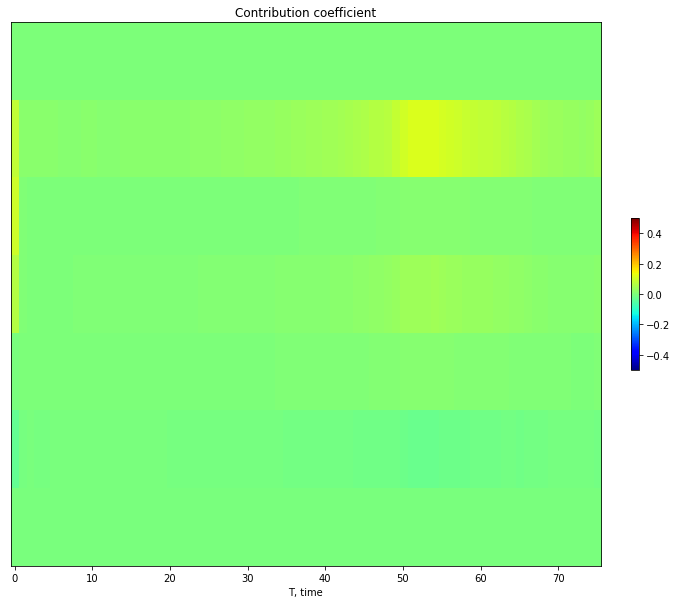

545


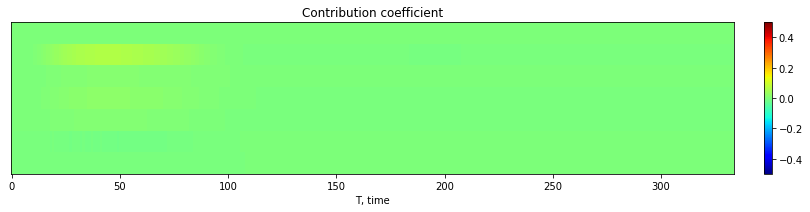

547


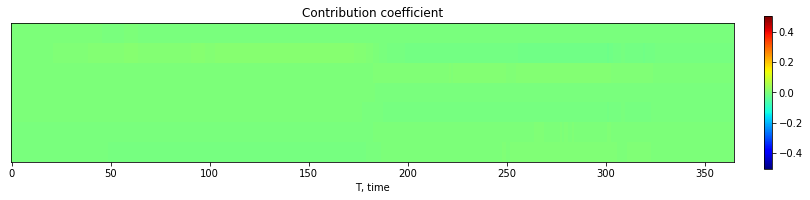

575


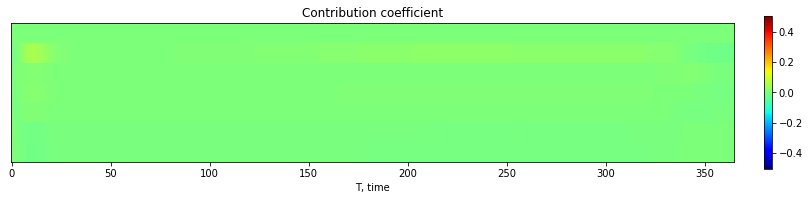

580


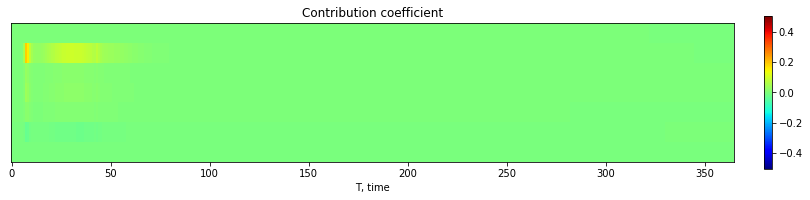

590


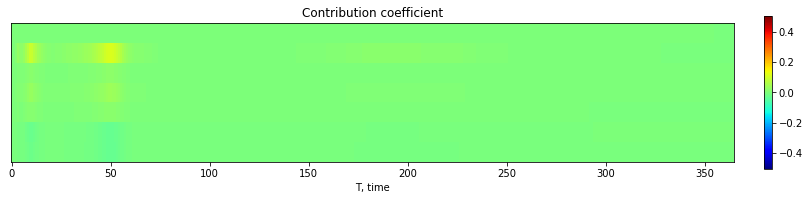

631


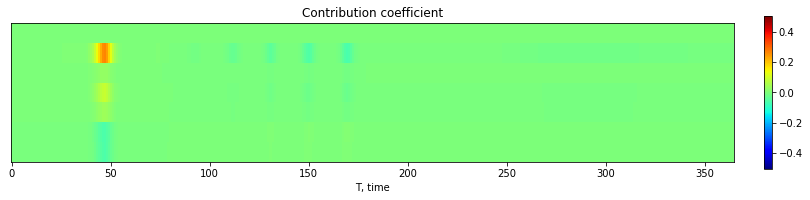

635


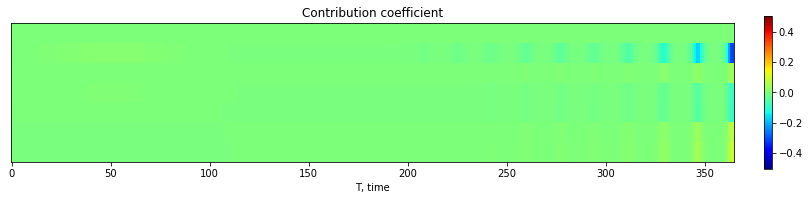

649


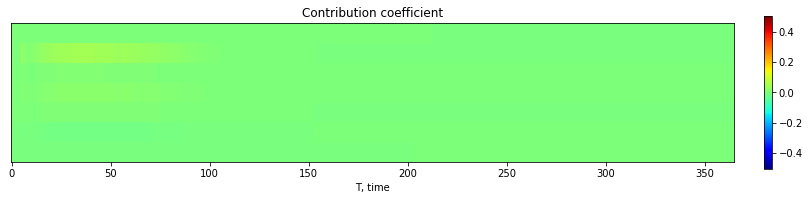

671


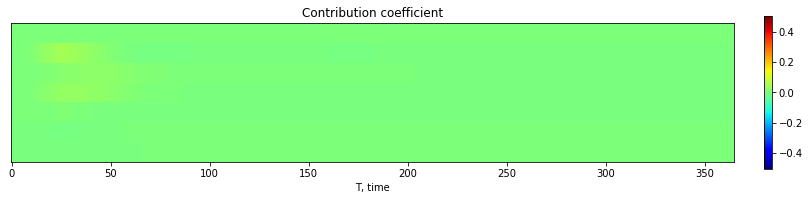

688


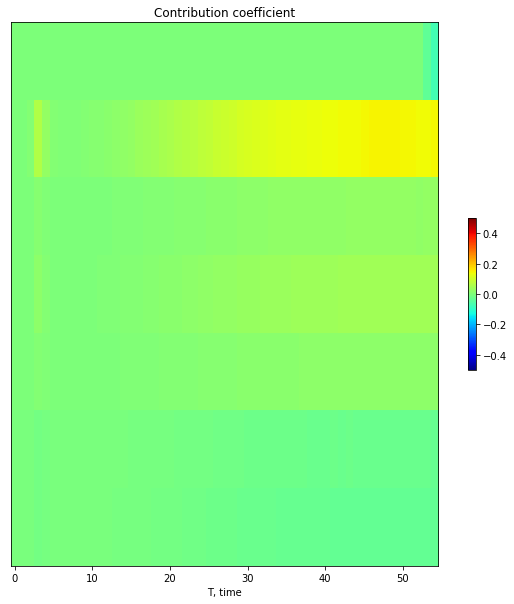

719


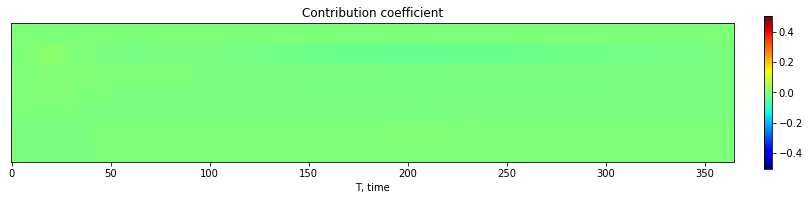

739


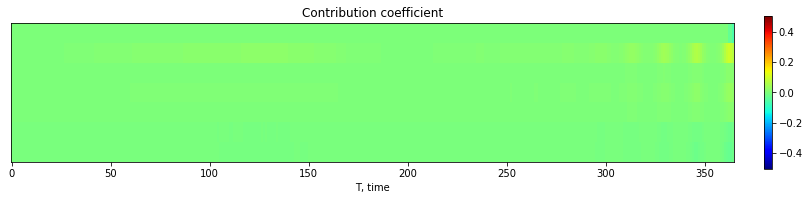

750


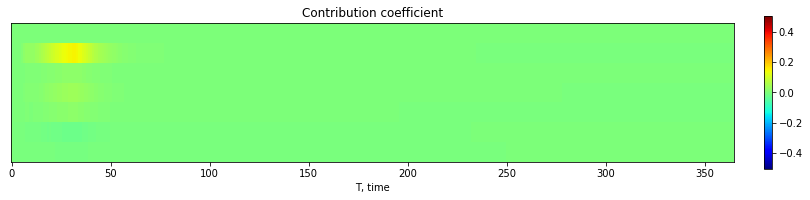

769


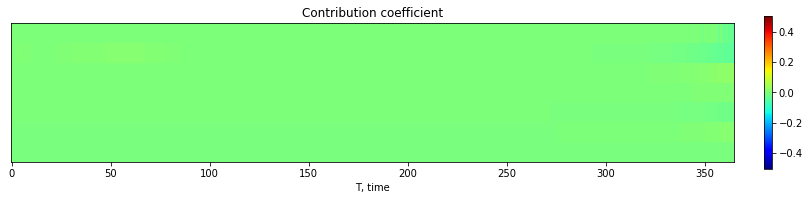

781


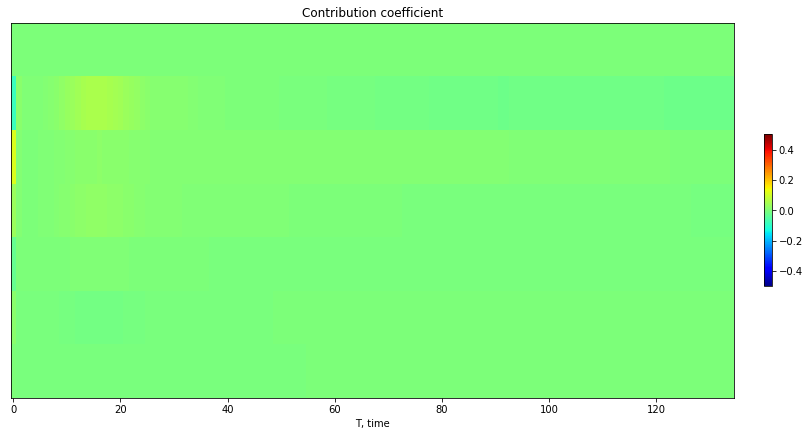

783


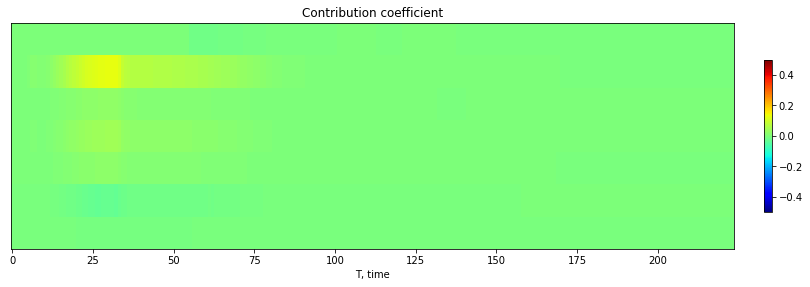

789


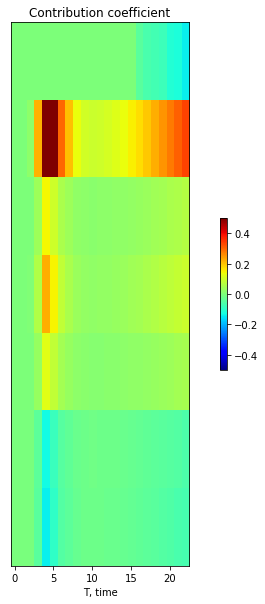

793


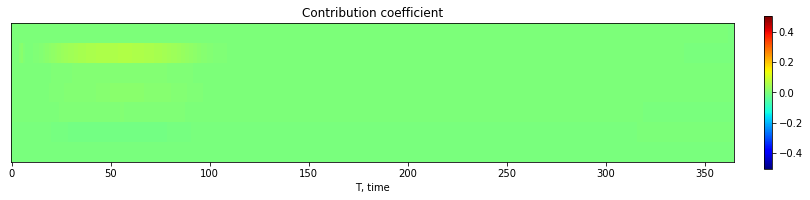

803


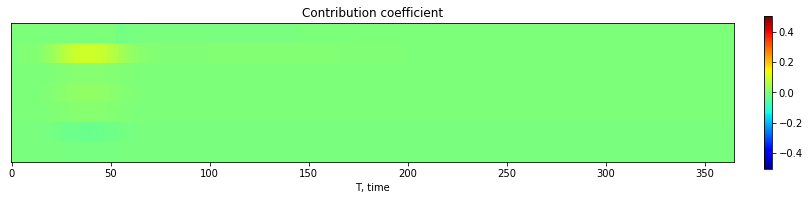

873


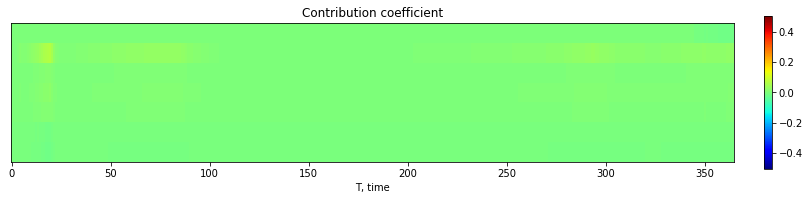

901


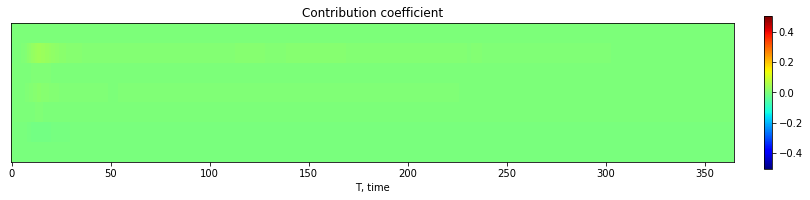

903


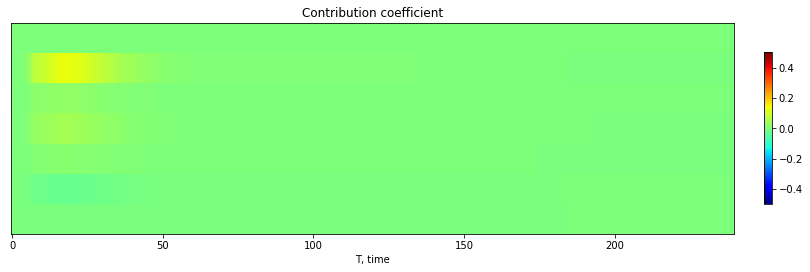

905


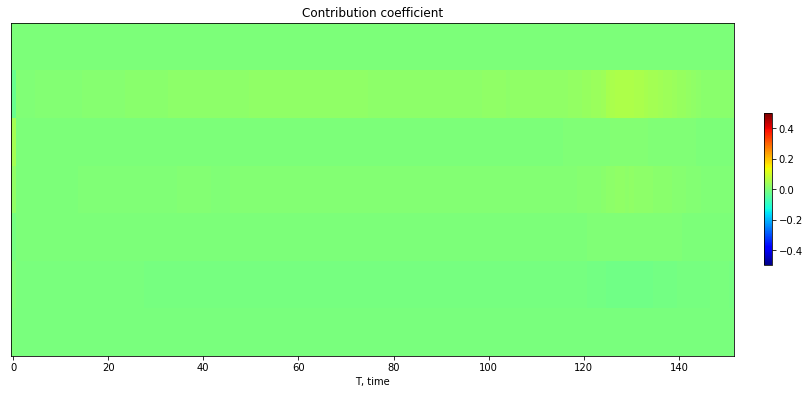

908


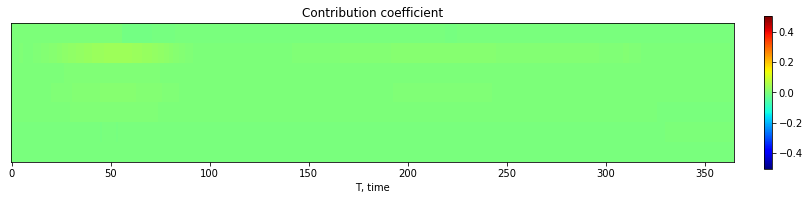

910


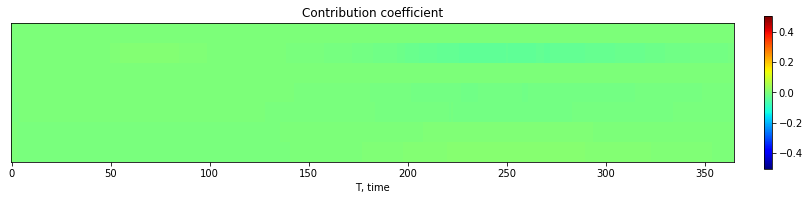

930


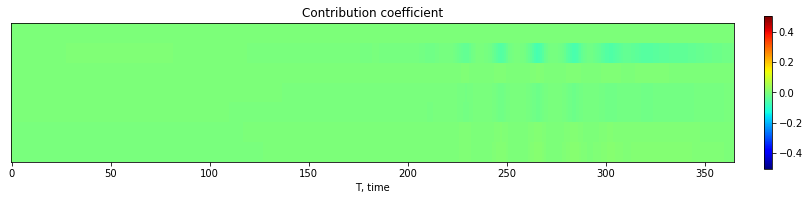

933


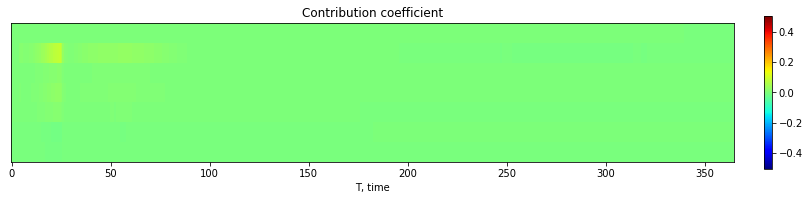

935


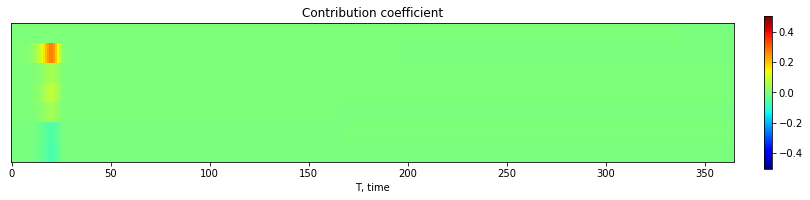

939


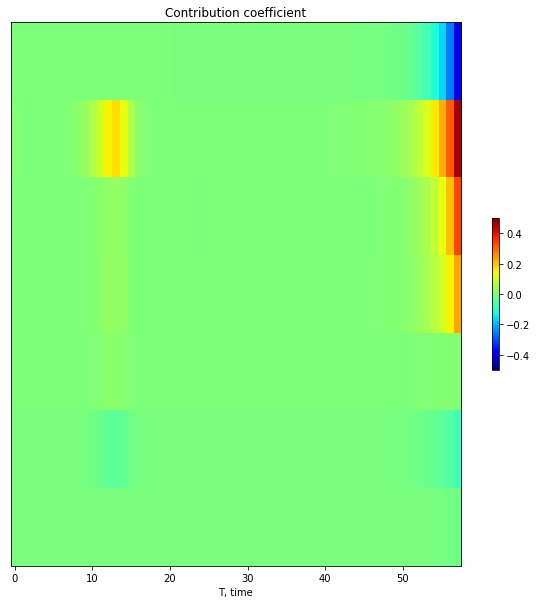

955


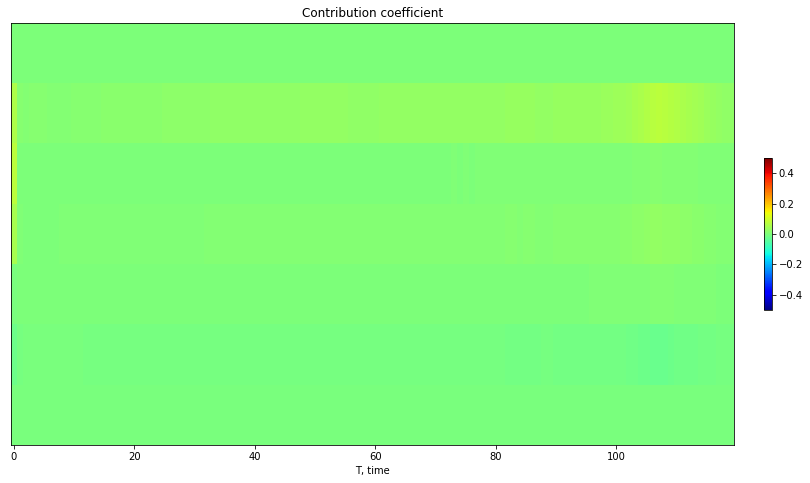

960


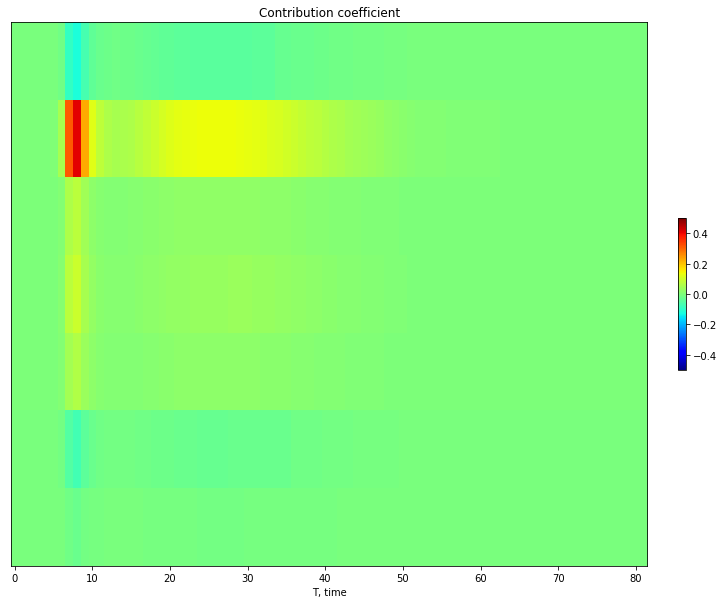

975


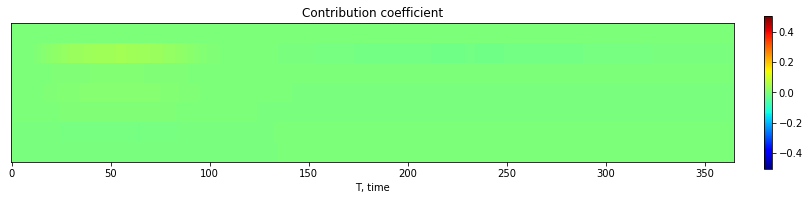

983


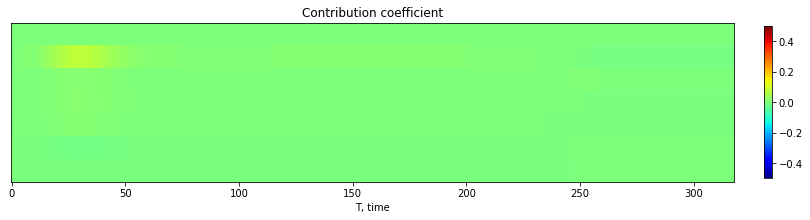

987


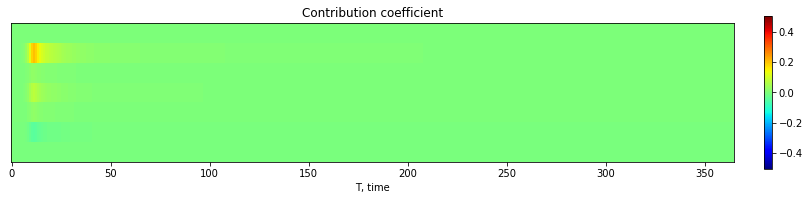

991


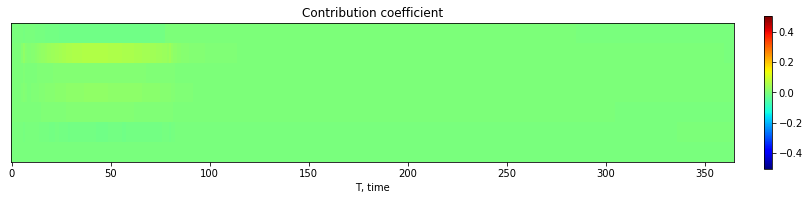

1011


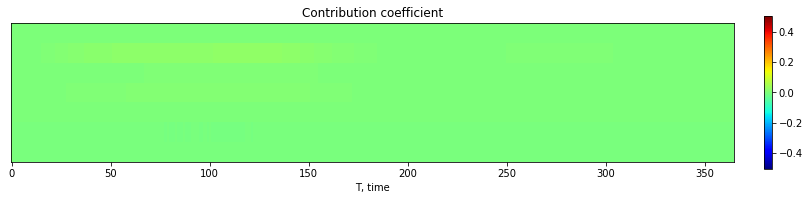

1047


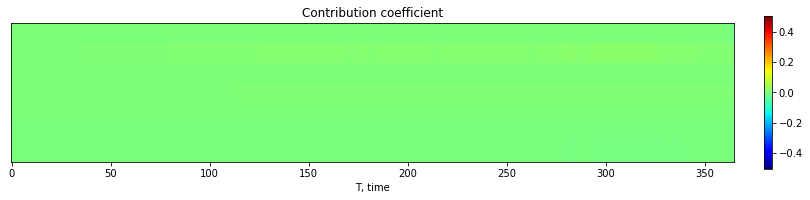

1083


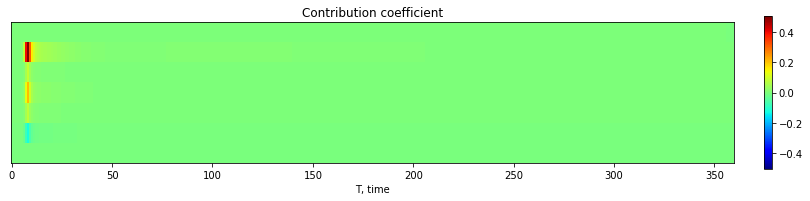

1088


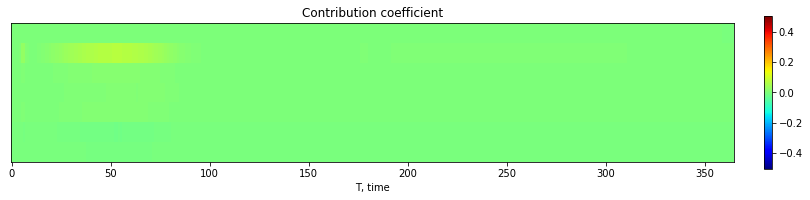

1094


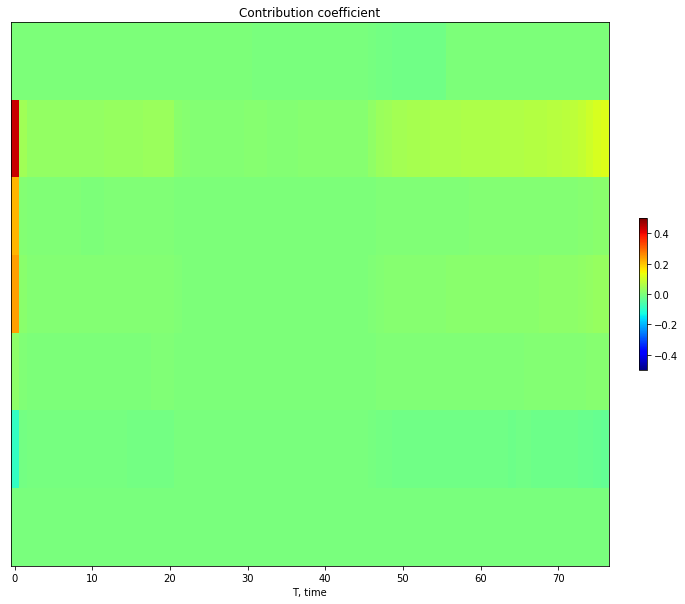

1111


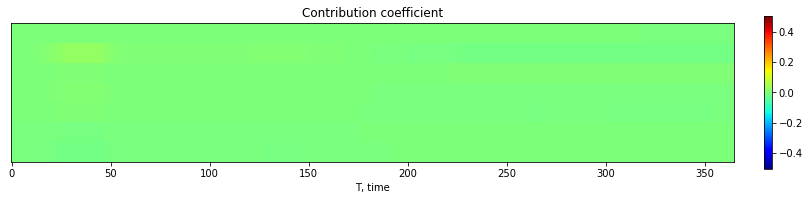

1118


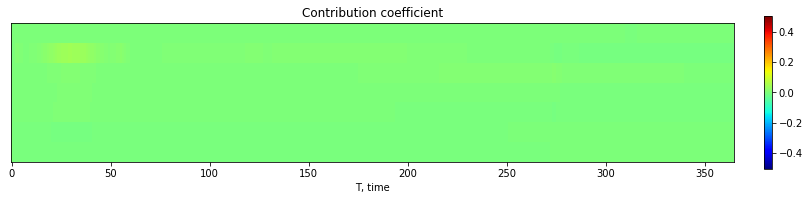

1140


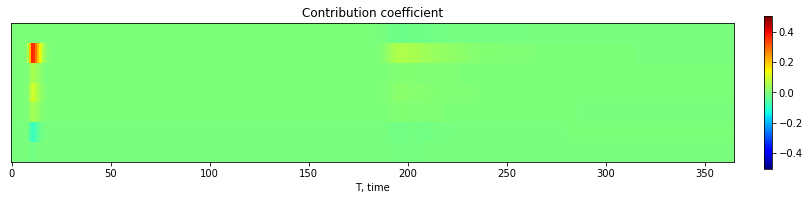

1156


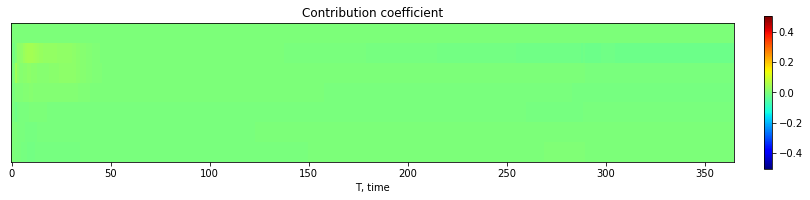

1167


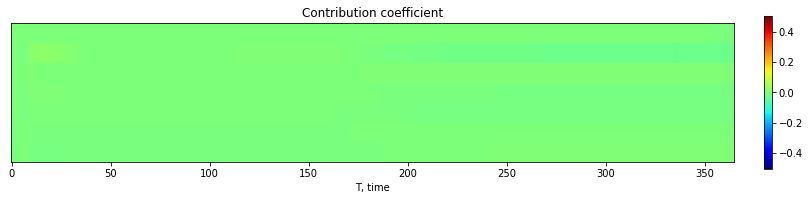

1169


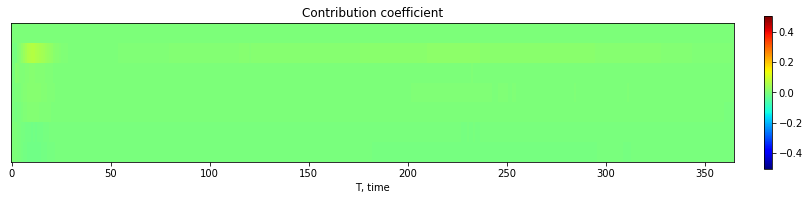

1176


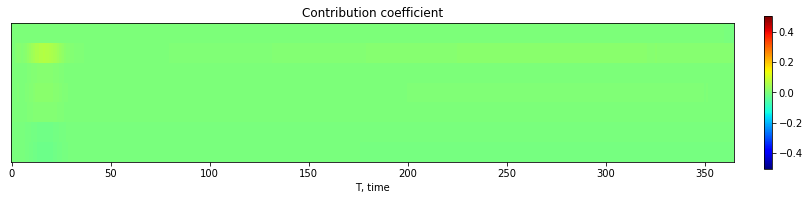

1178


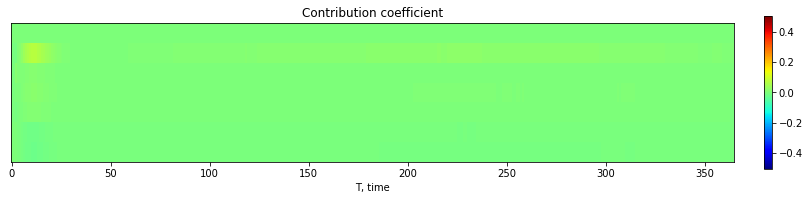

1190


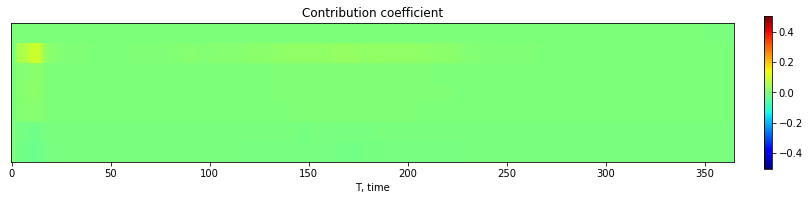

1196


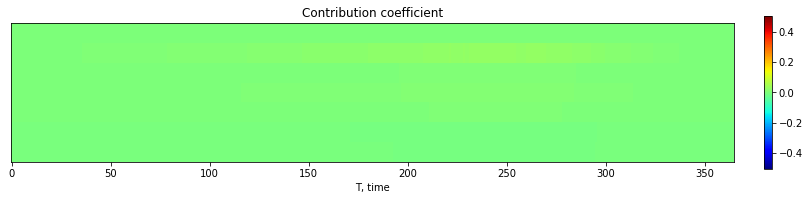

1201


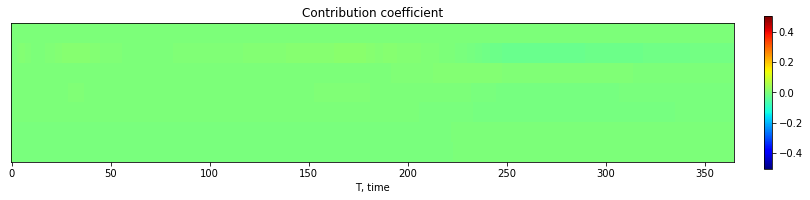

1207


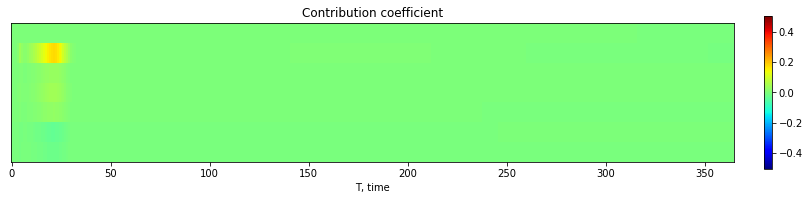

1213


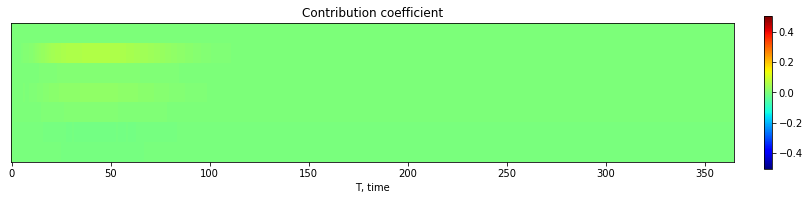

1236


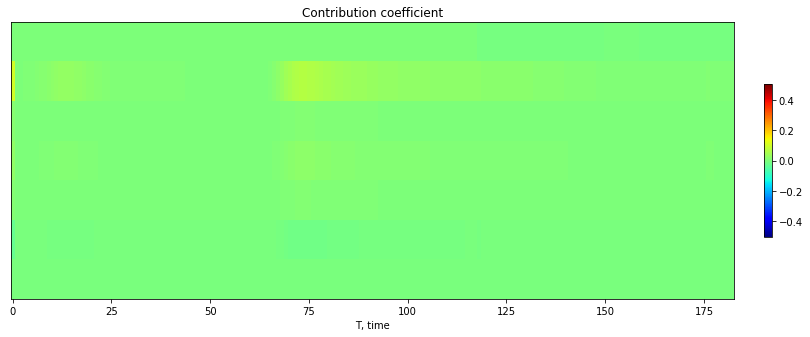

1262


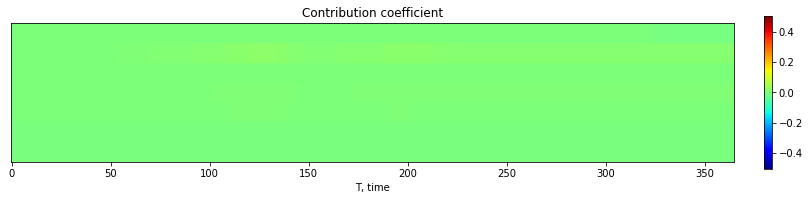

1282


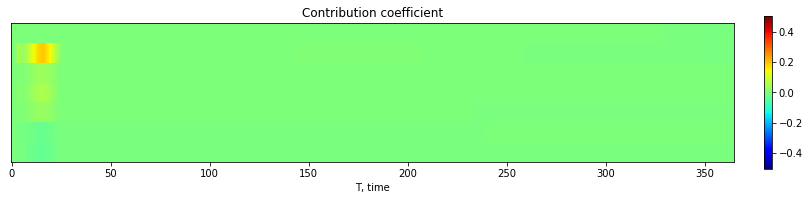

1295


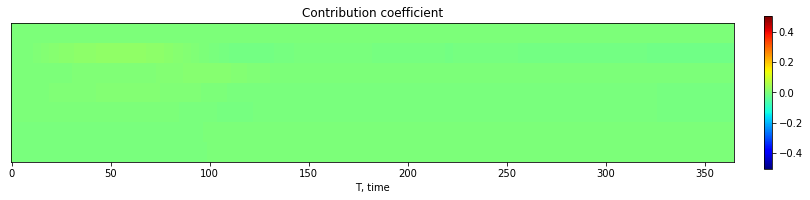

1319


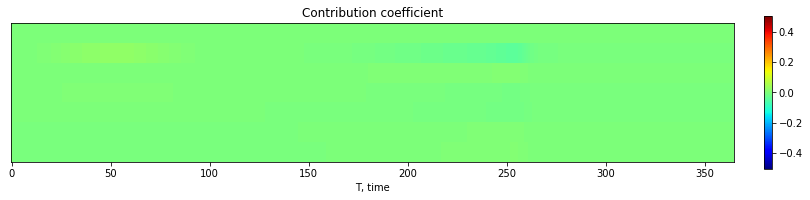

1328


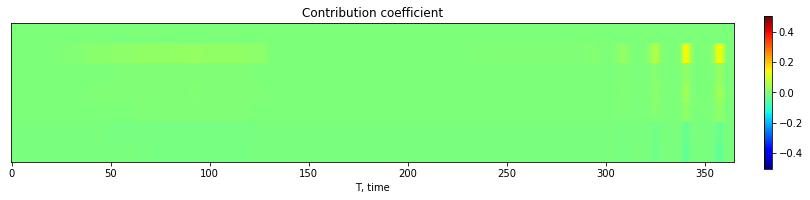

1329


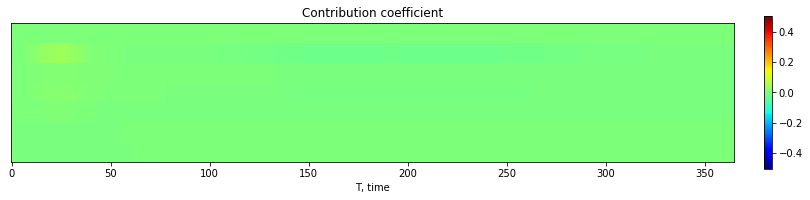

1332


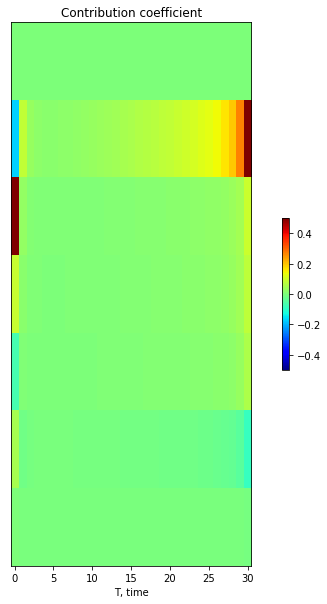

1334


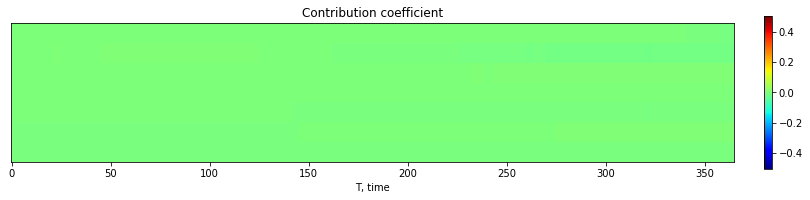

1339


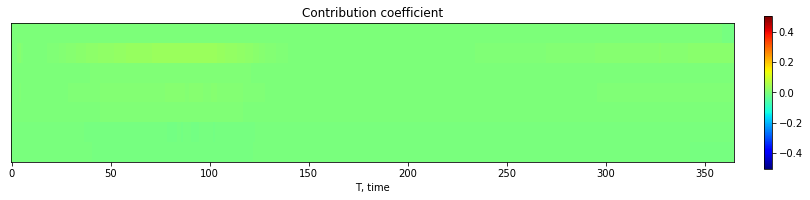

1402


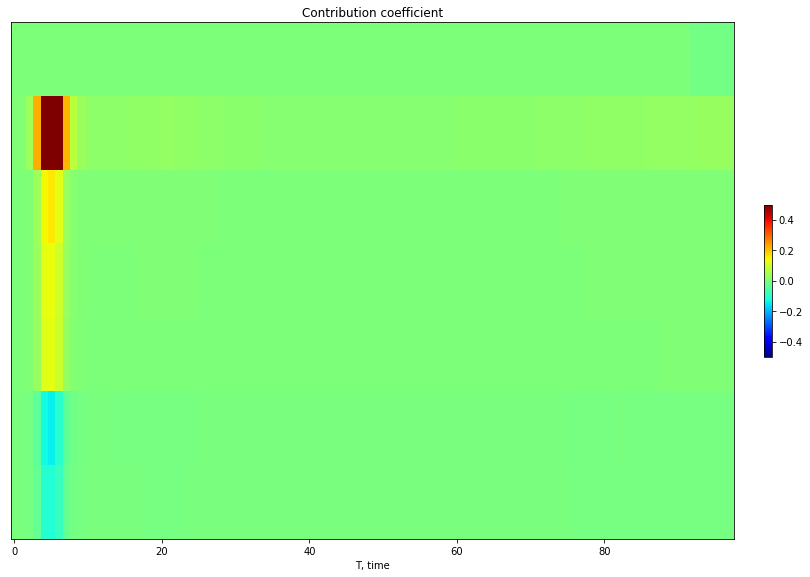

1411


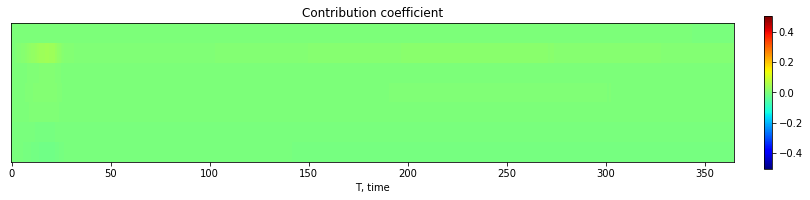

1441


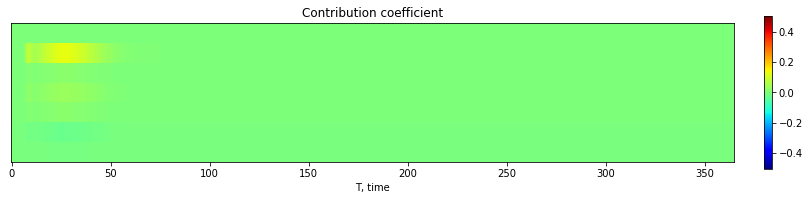

1448


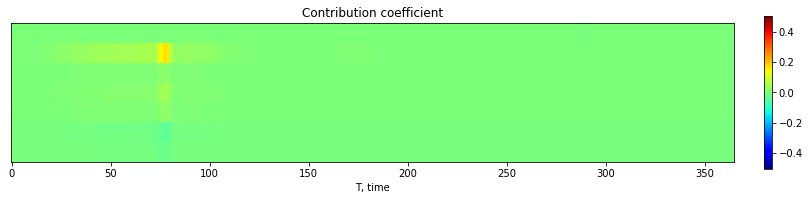

1453


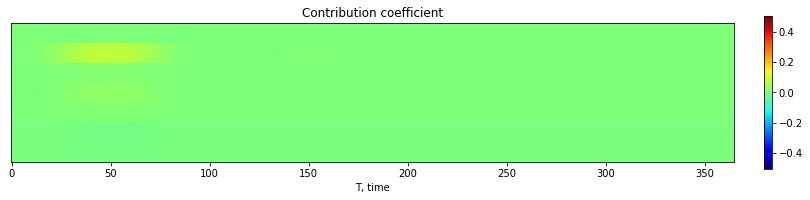

1459


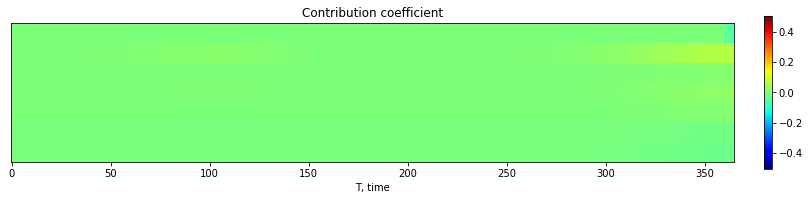

1460


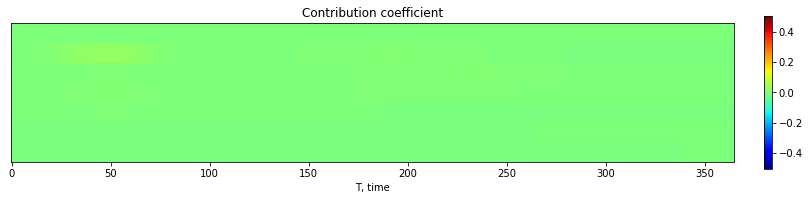

1485


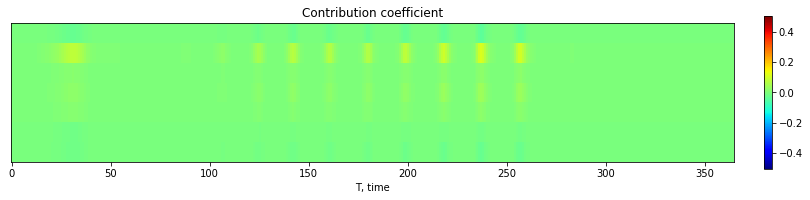

1486


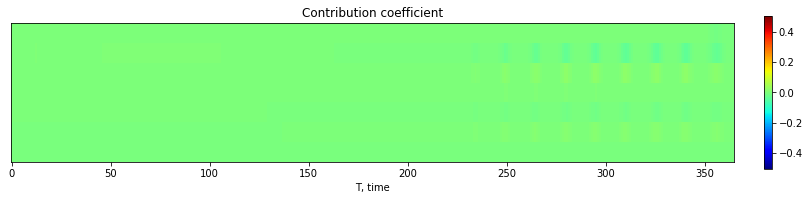

1496


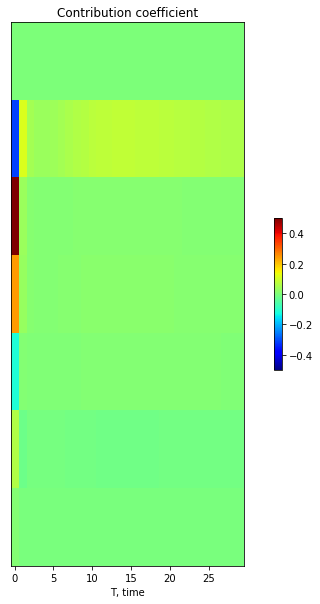

1501


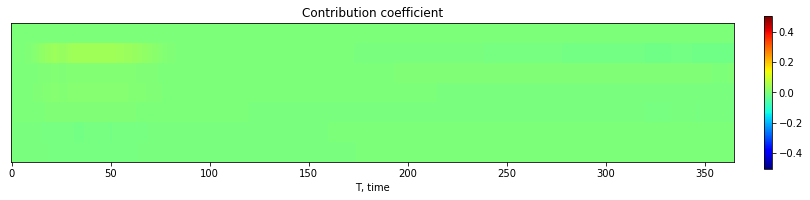

1517


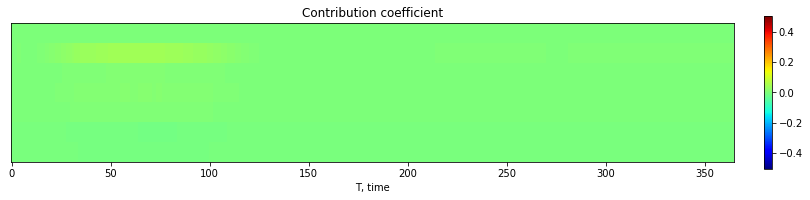

1519


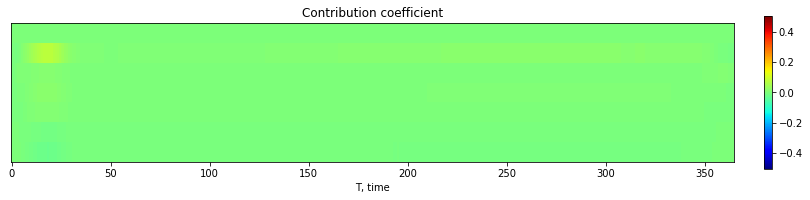

1549


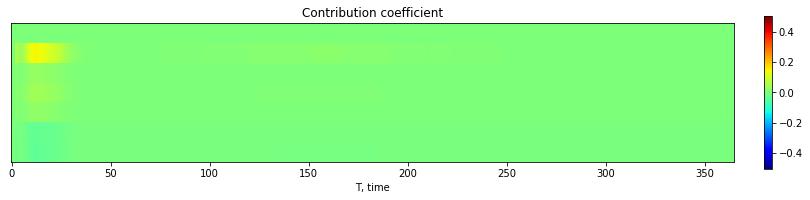

1555


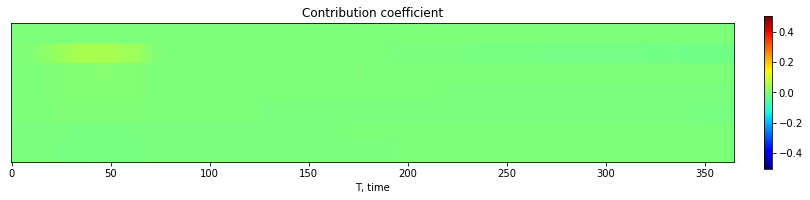

1567


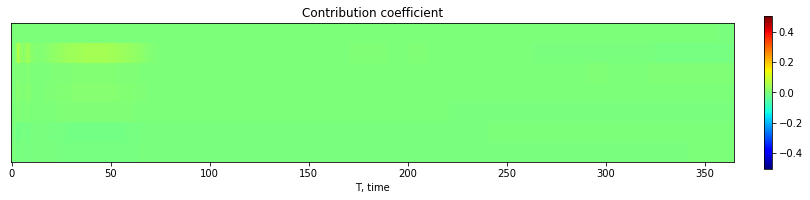

1568


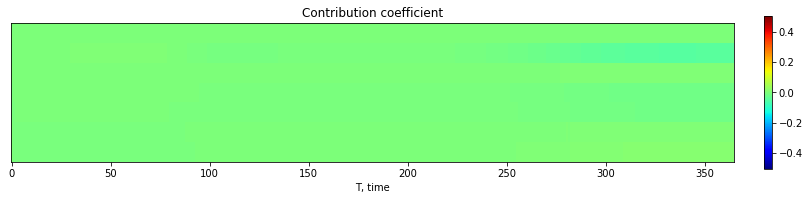

1572


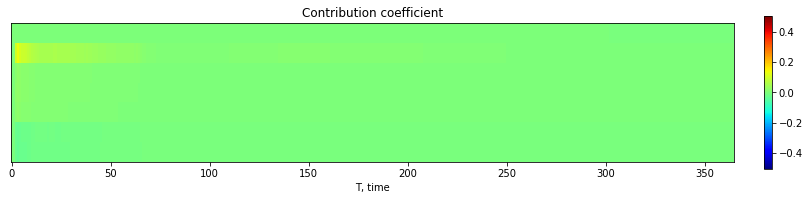

1582


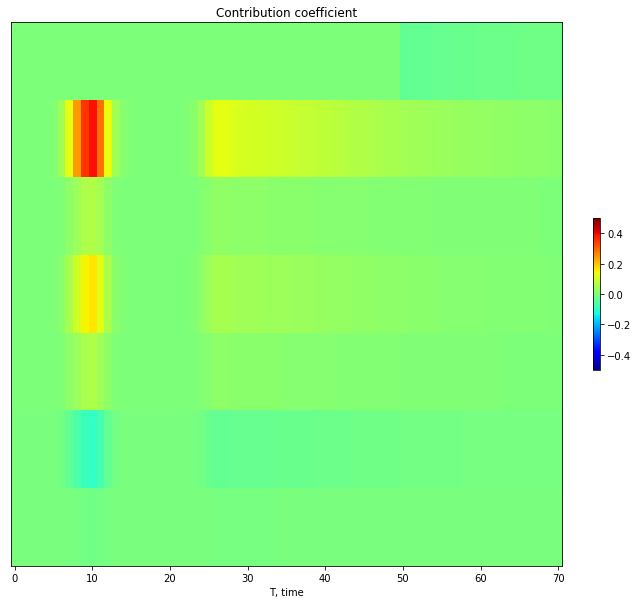

1588


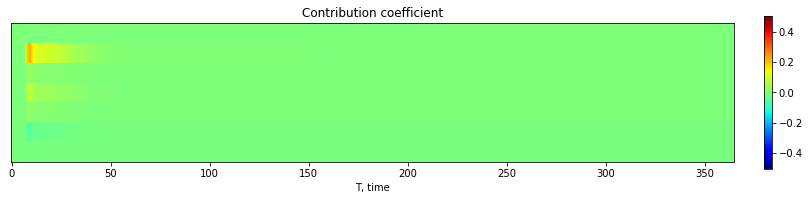

1594


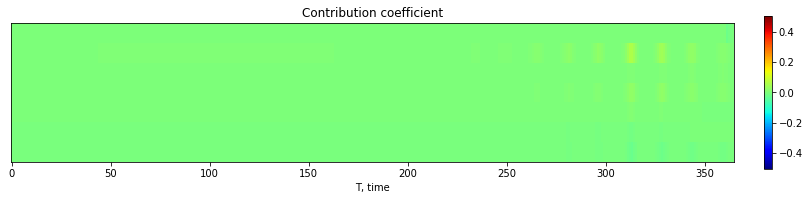

1628


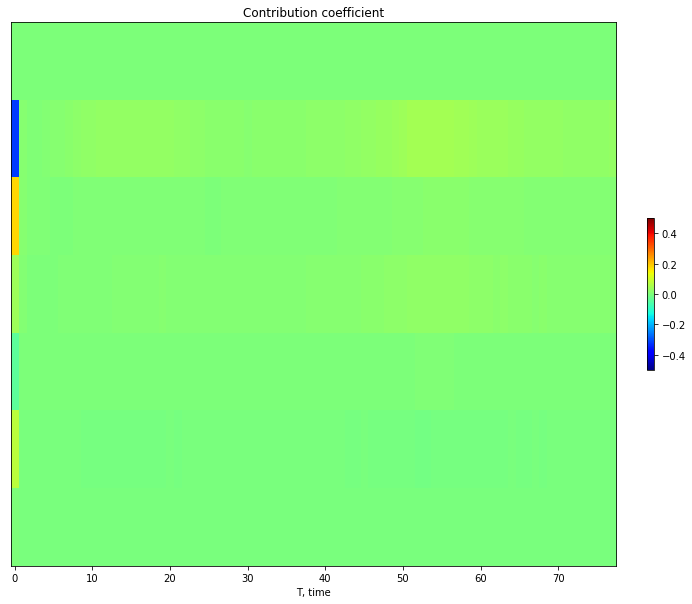

1641


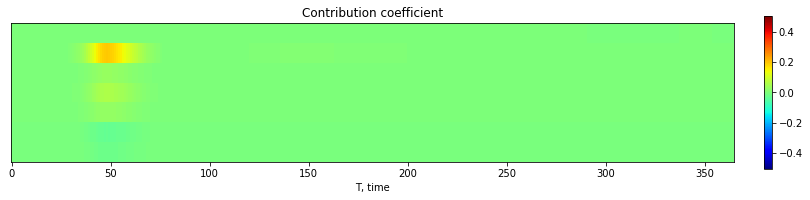

1643


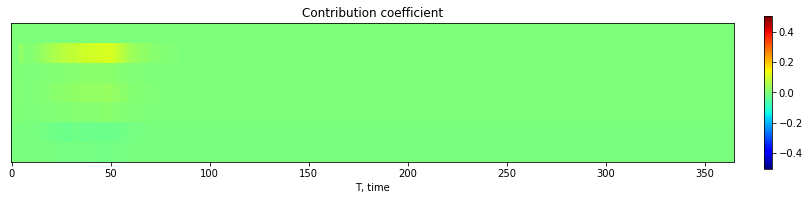

1657


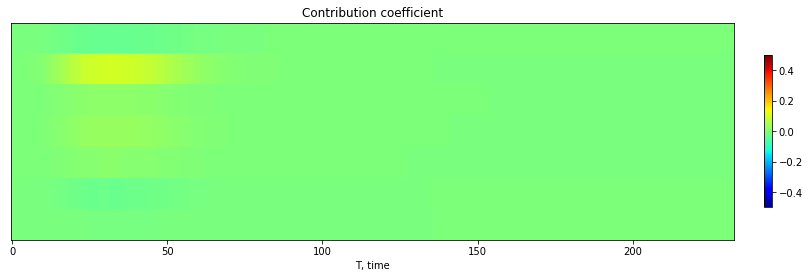

1679


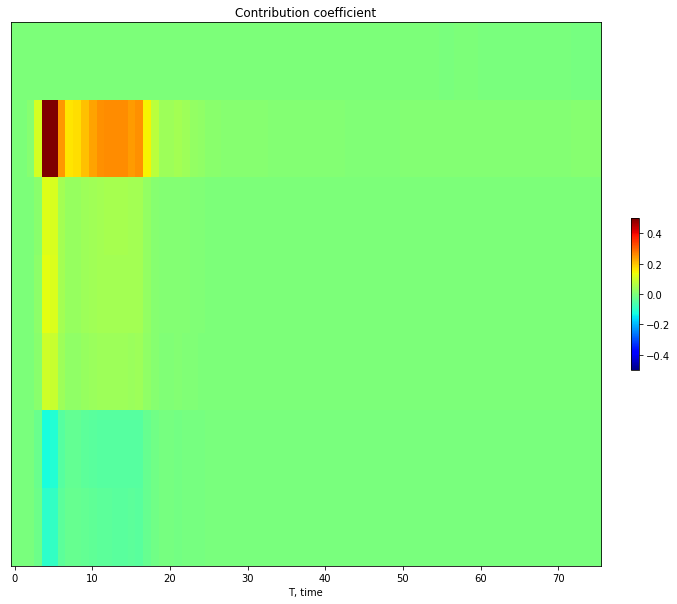

1709


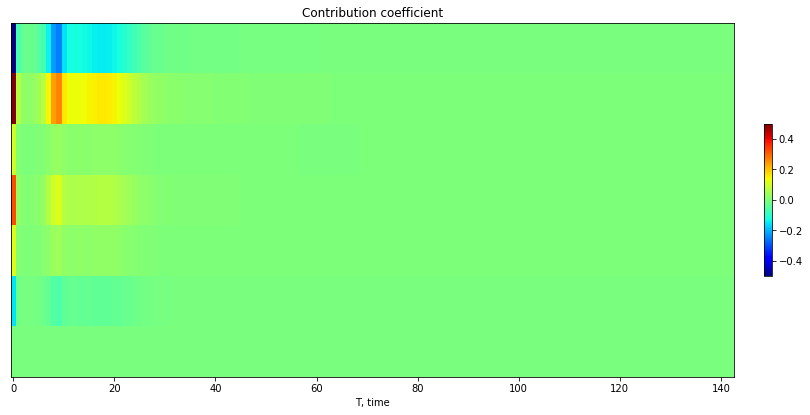

1736


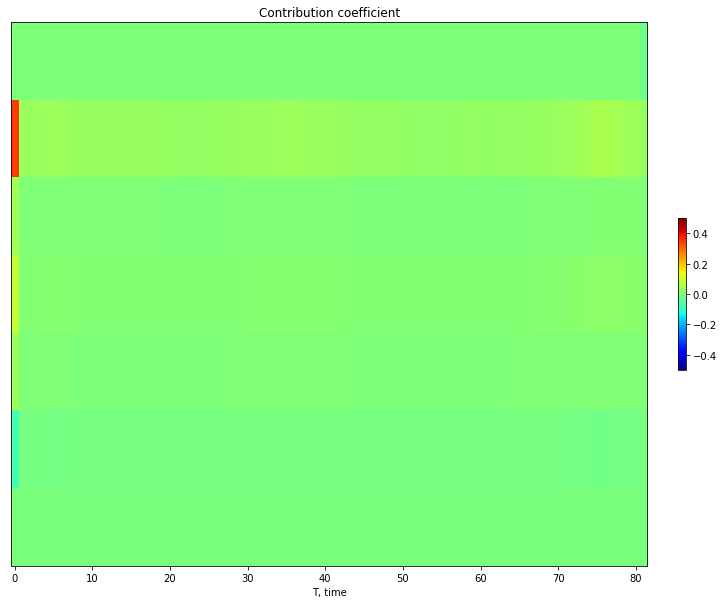

1765


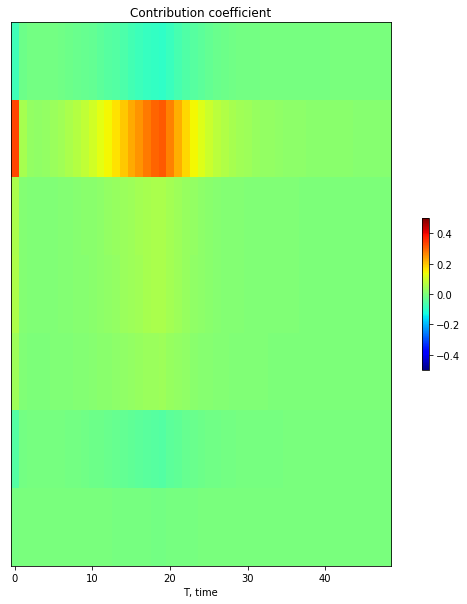

1768


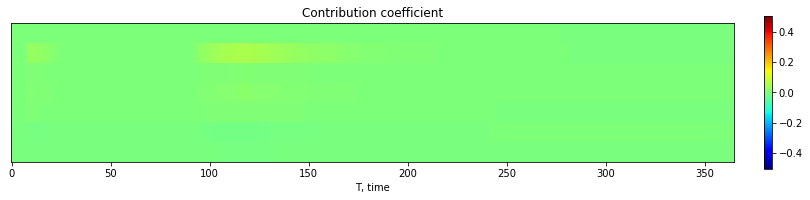

1771


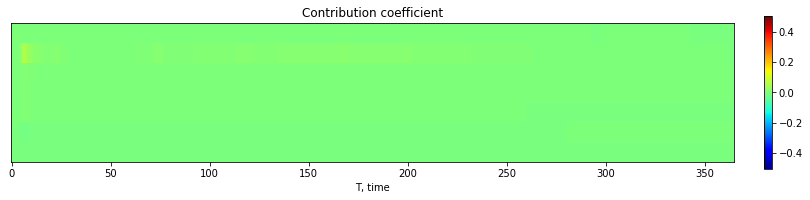

1778


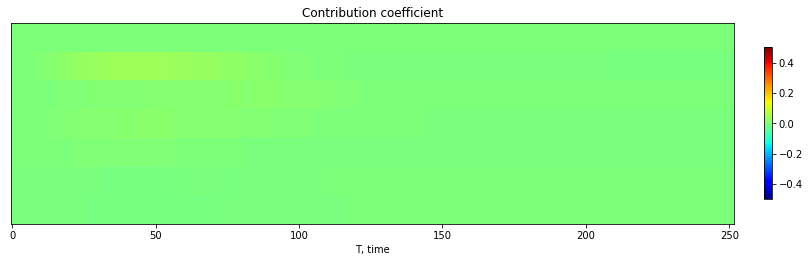

1780


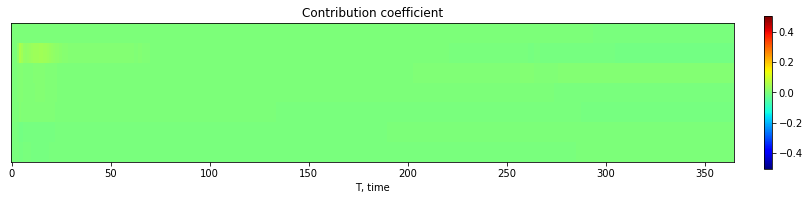

1790


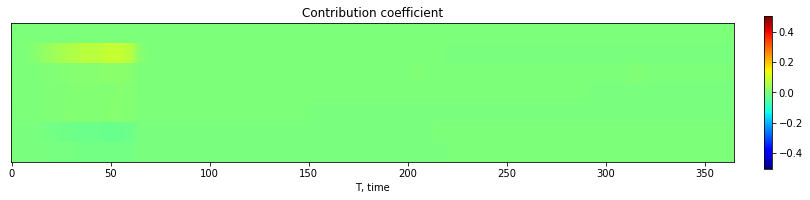

1801


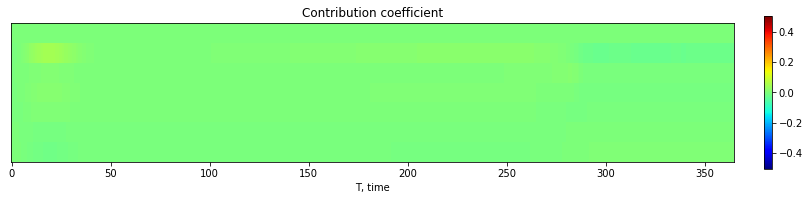

1810


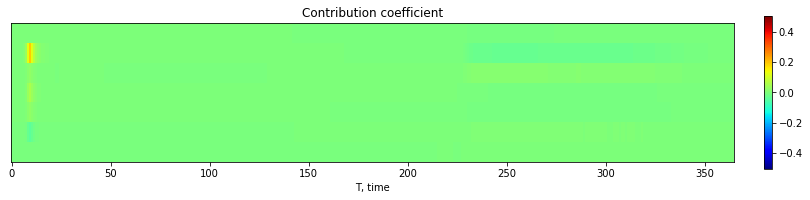

1827


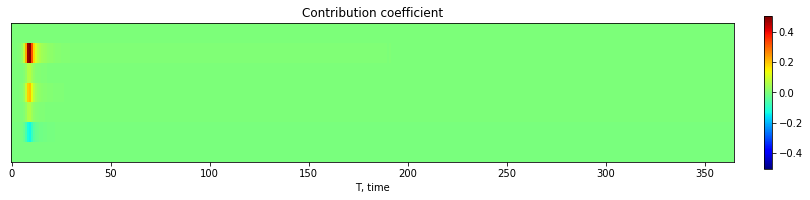

1836


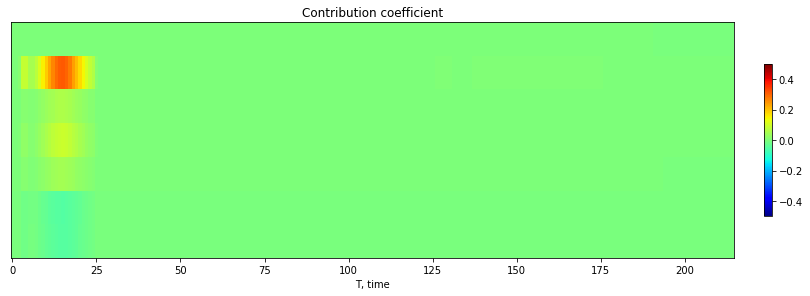

1839


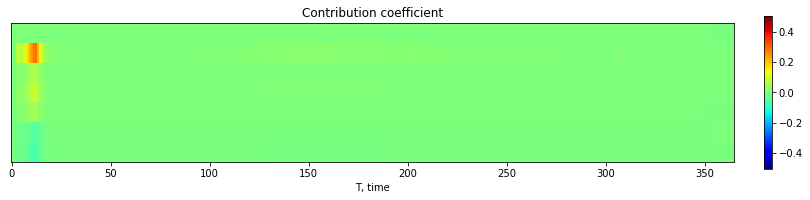

1848


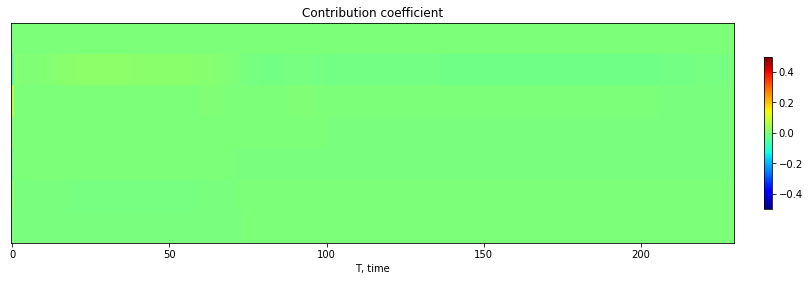

1885


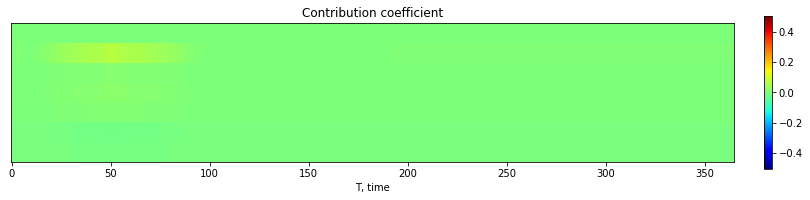

1888


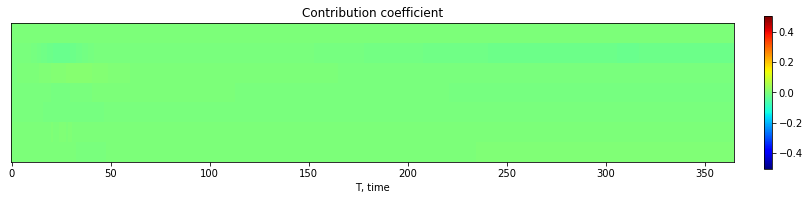

1909


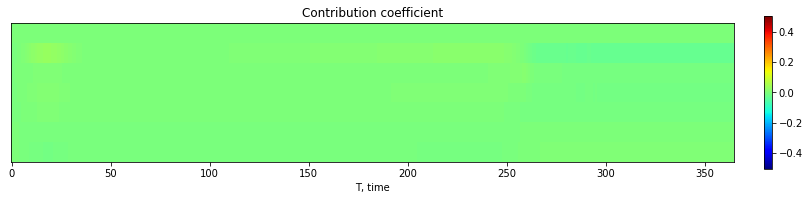

1931


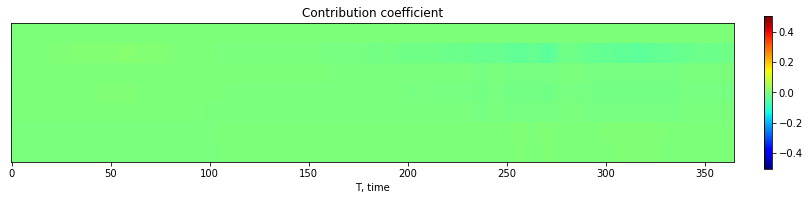

1938


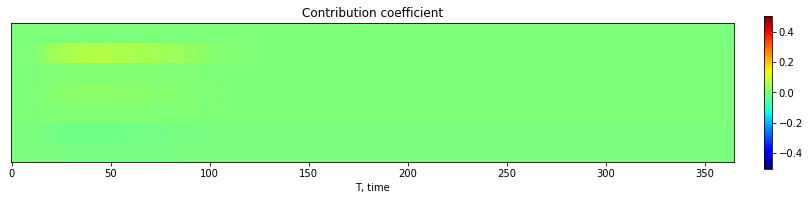

1940


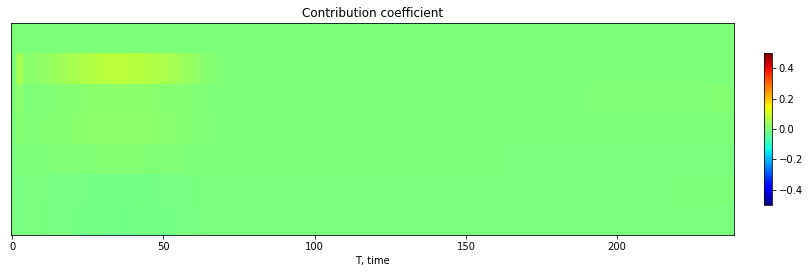

1980


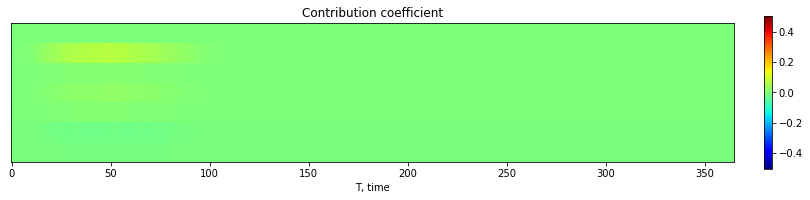

1981


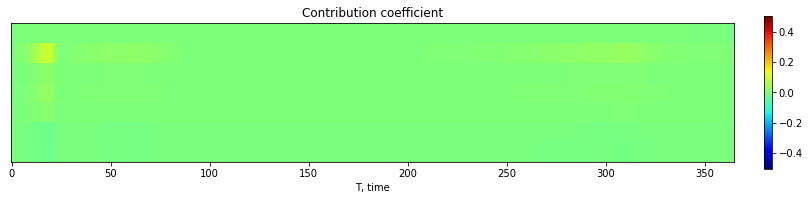

1983


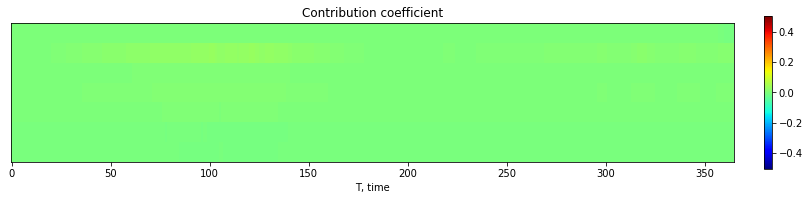

1995


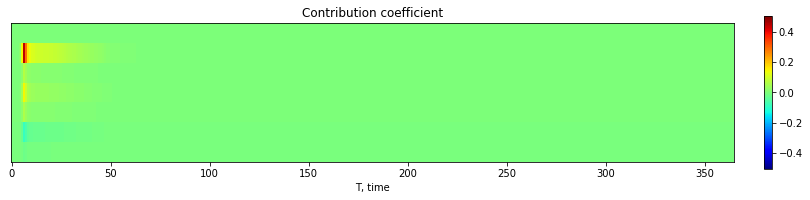

2079


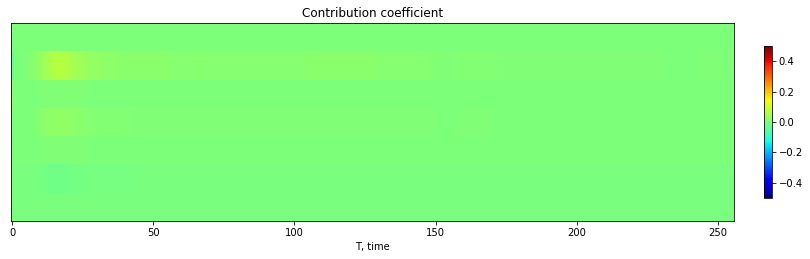

2083


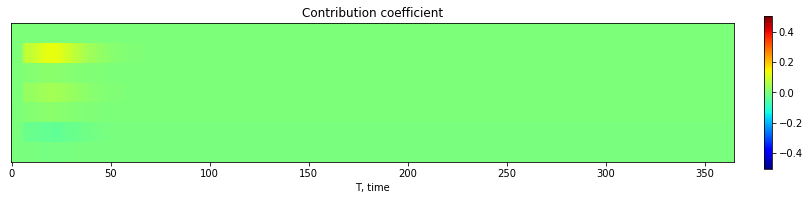

2123


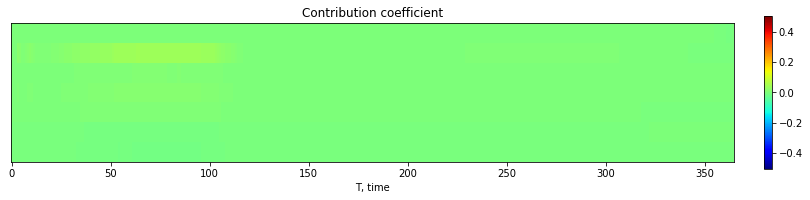

2129


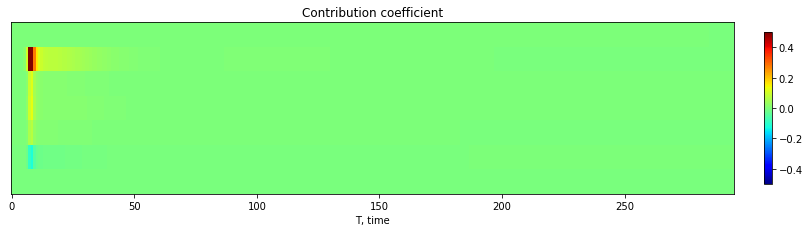

2144


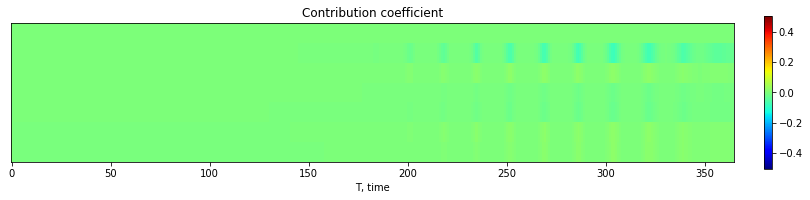

2156


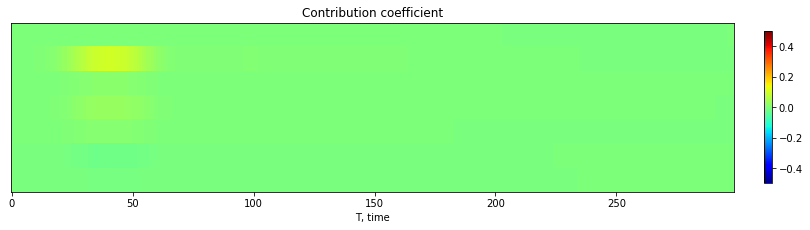

2159


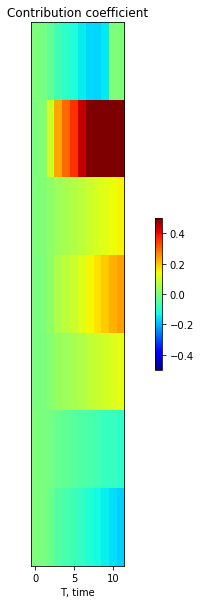

2167


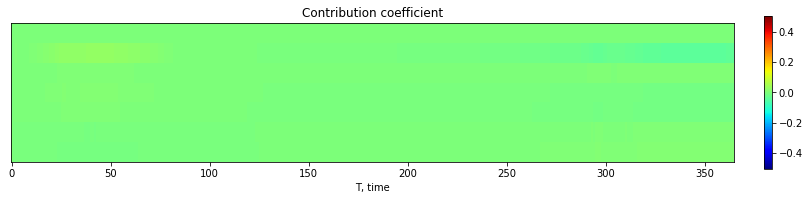

2168


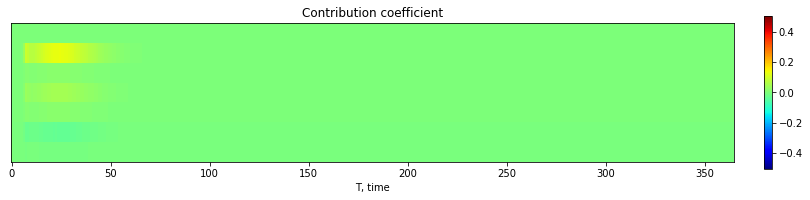

2171


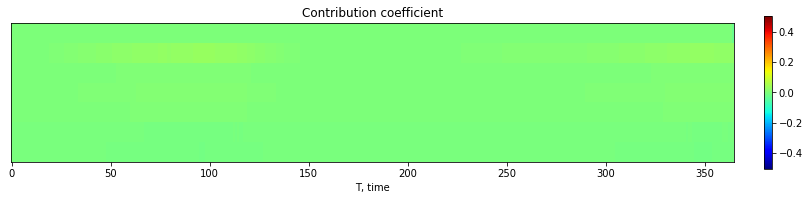

2179


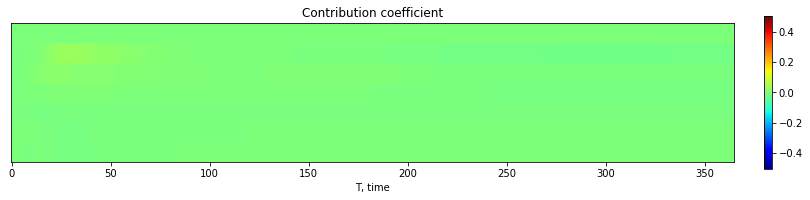

2199


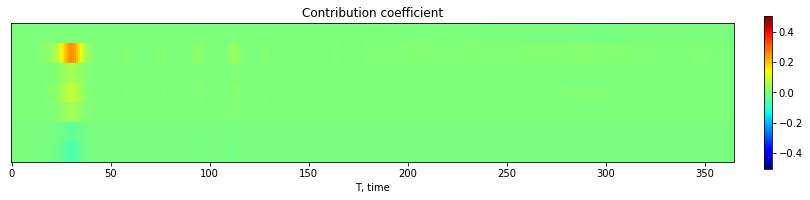

2209


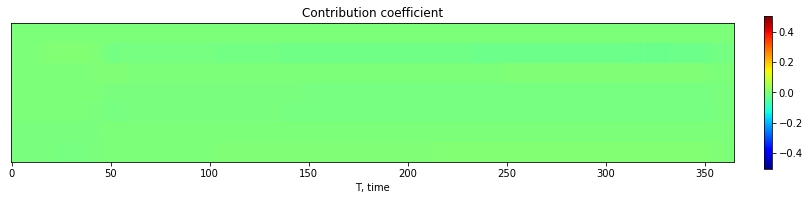

2217


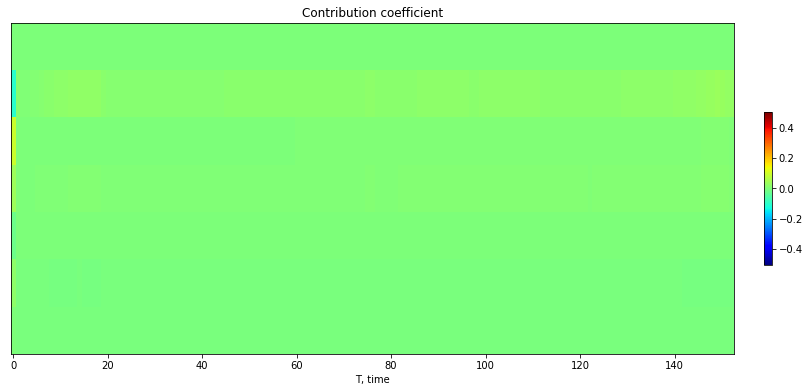

2222


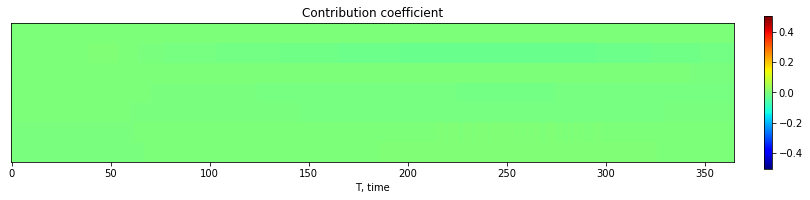

2225


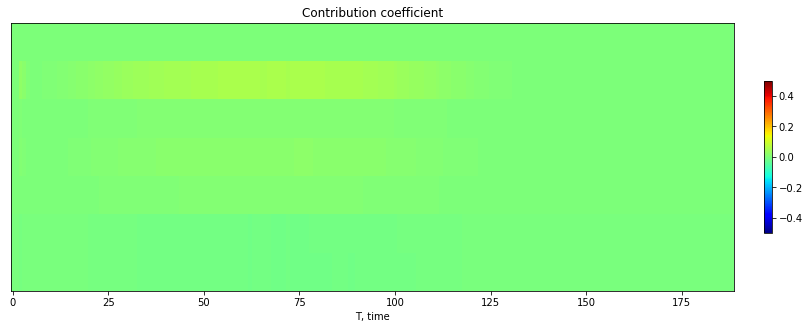

2233


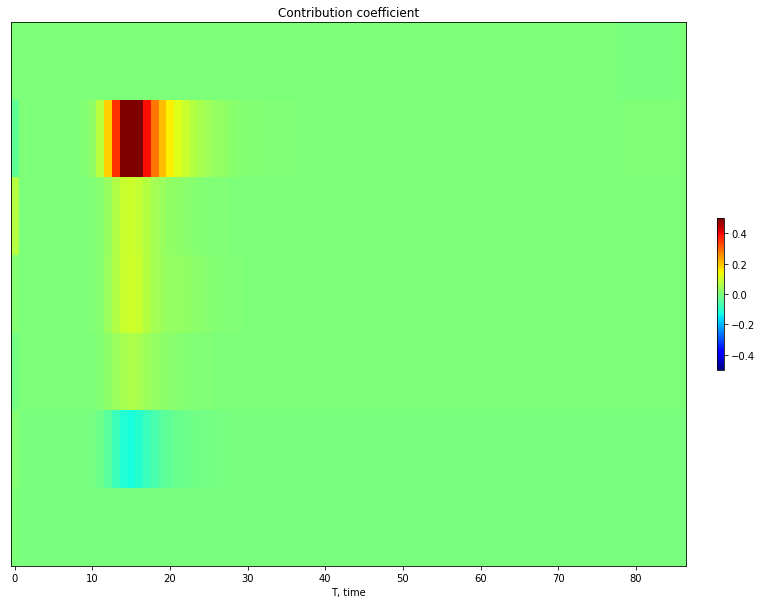

2257


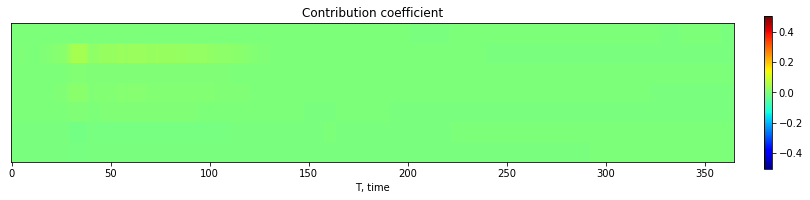

2271


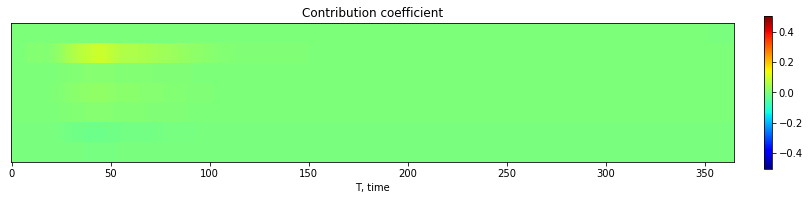

2295


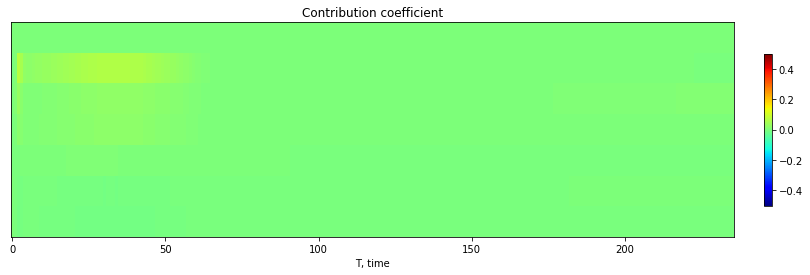

2343


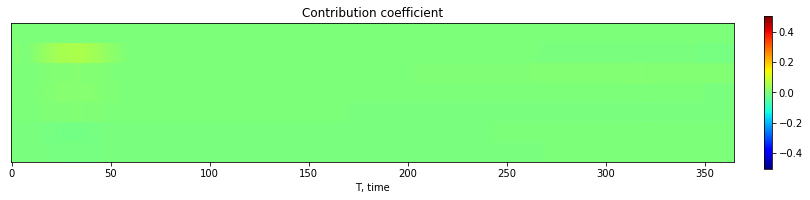

2345


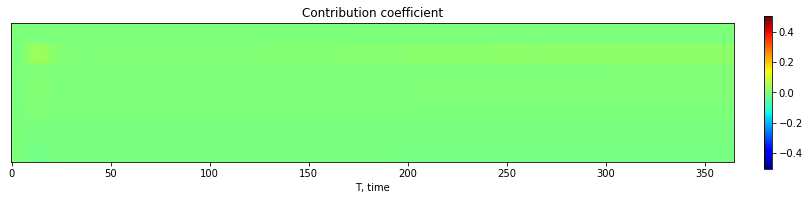

2350


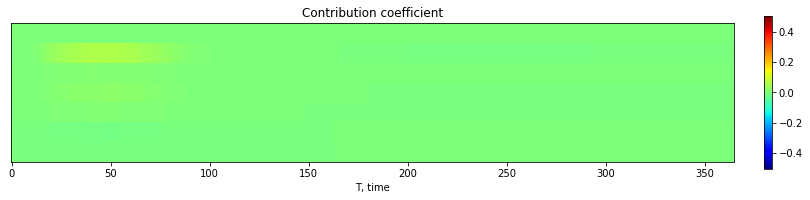

2371


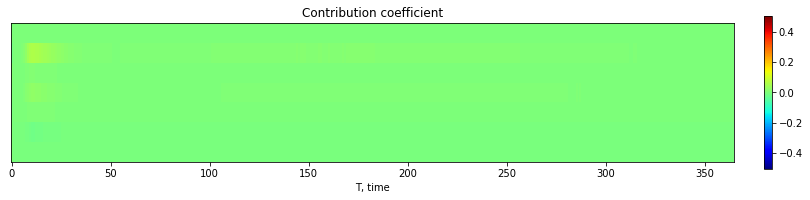

2386


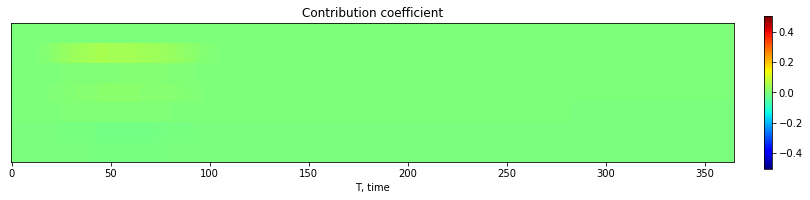

2397


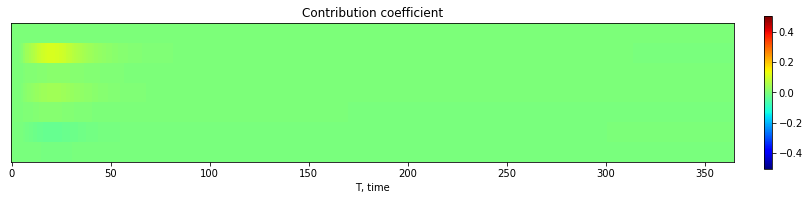

2426


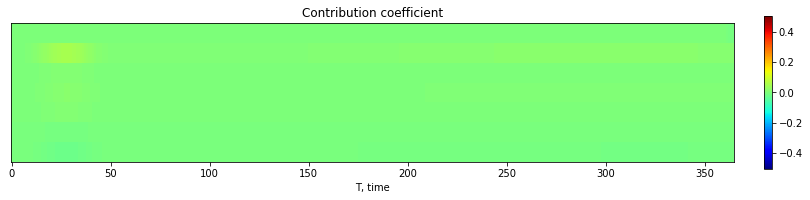

2440


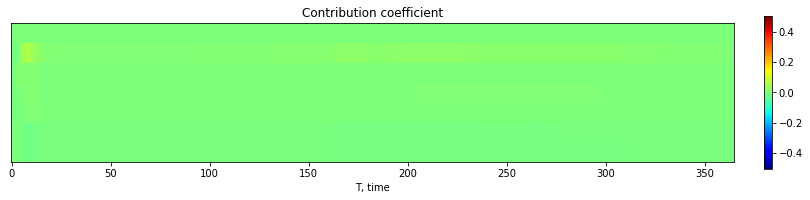

2443


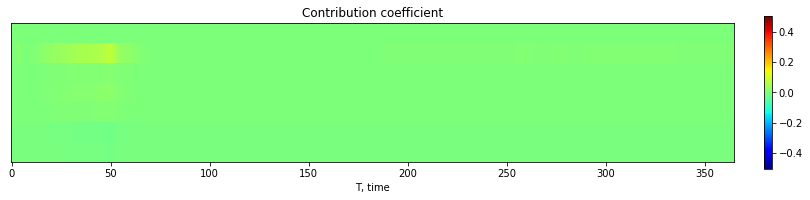

2447


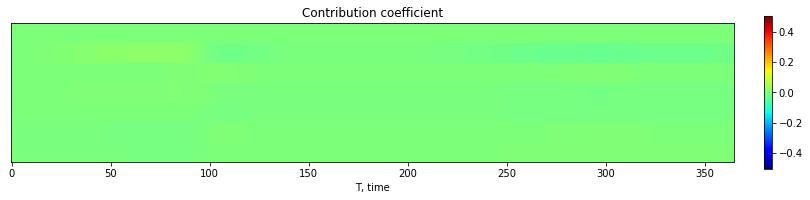

2470


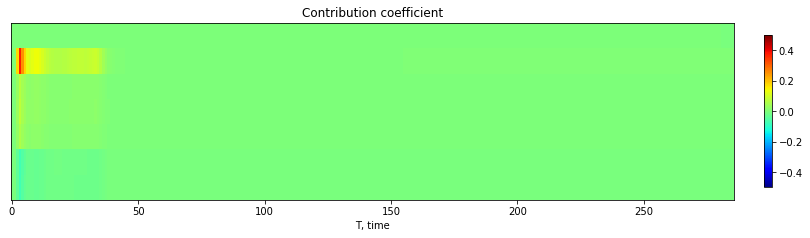

2471


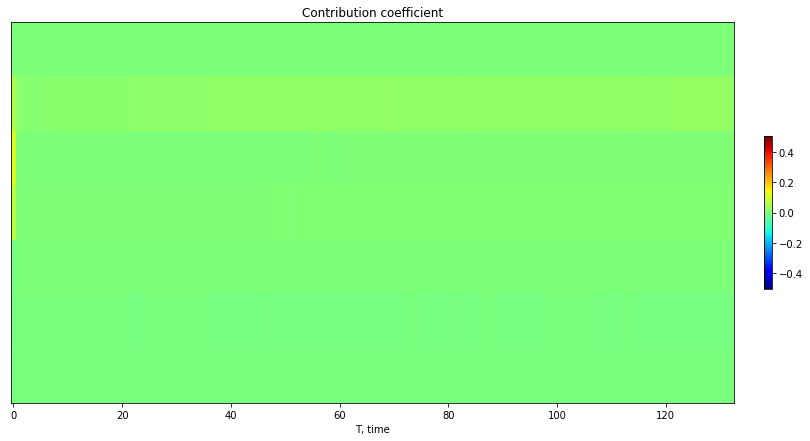

2481


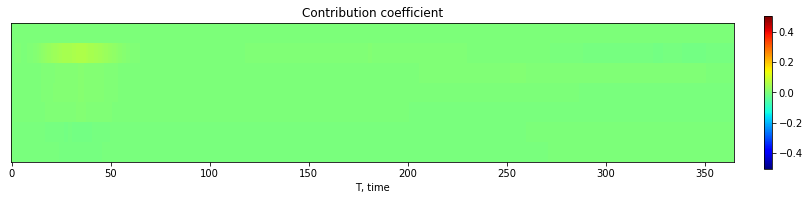

2501


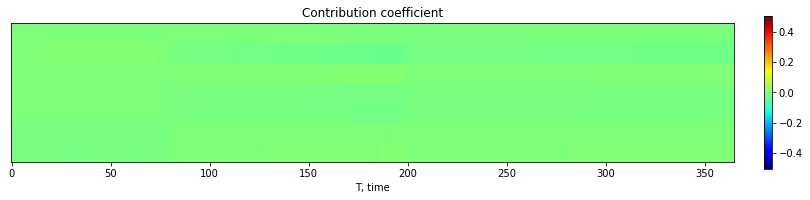

2511


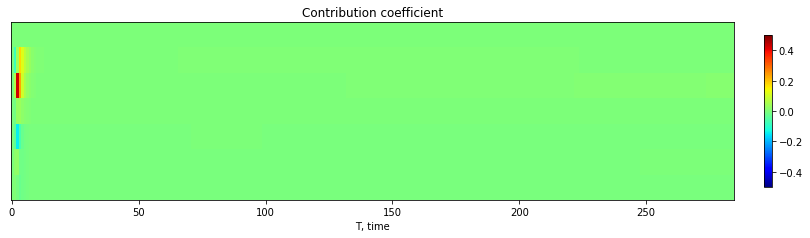

2523


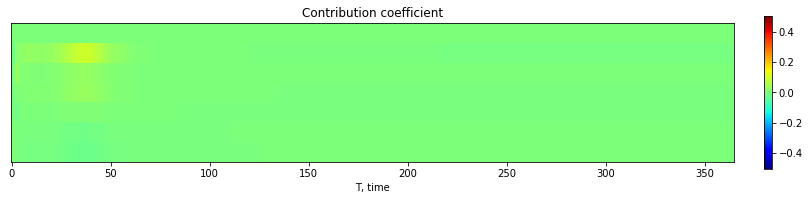

2524


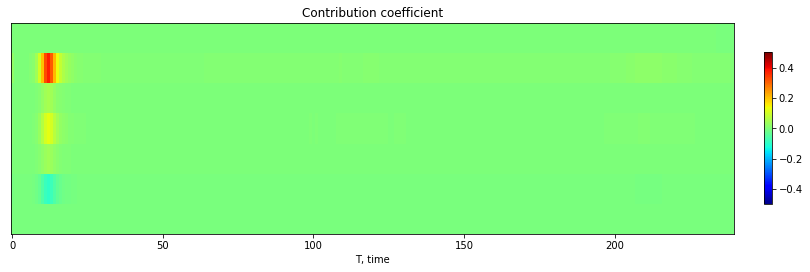

2525


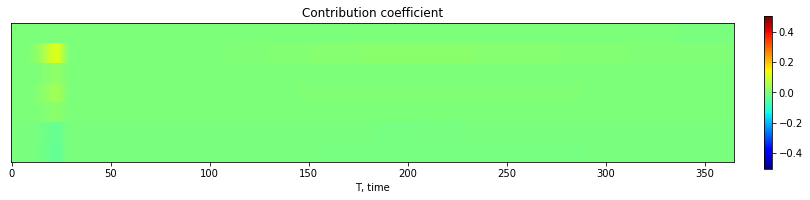

2537


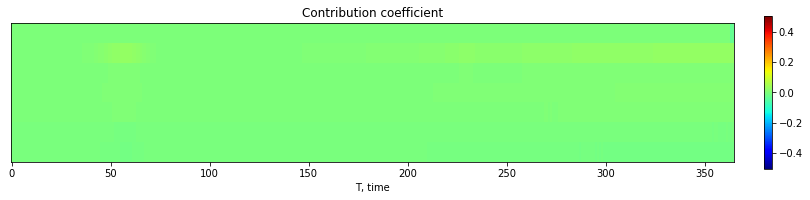

2560


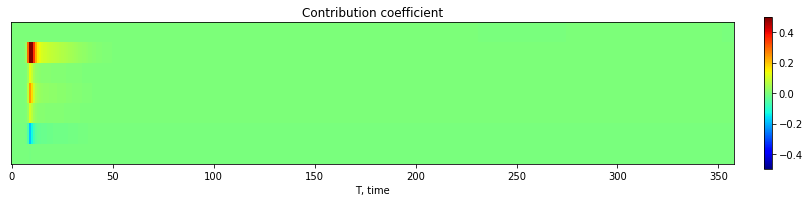

2577


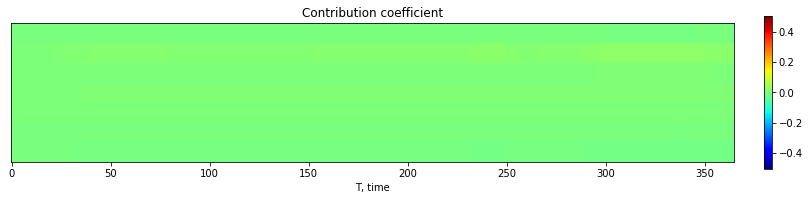

2580


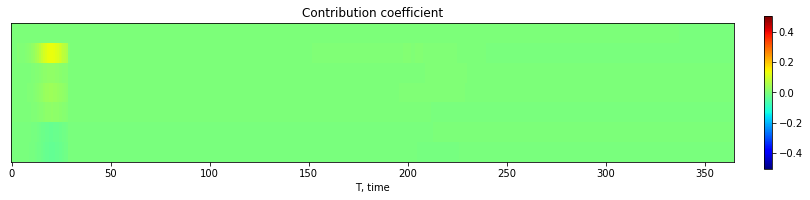

2602


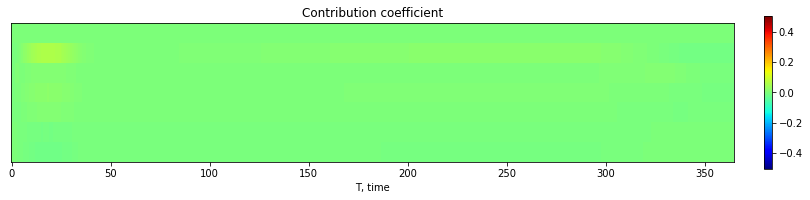

2607


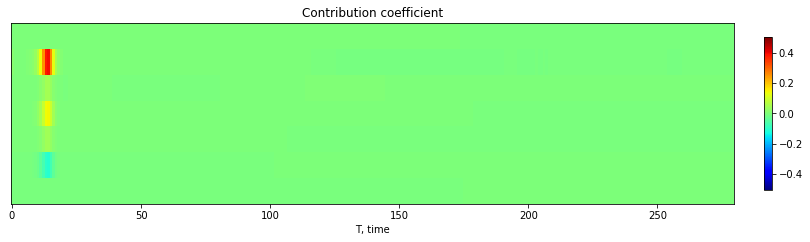

2615


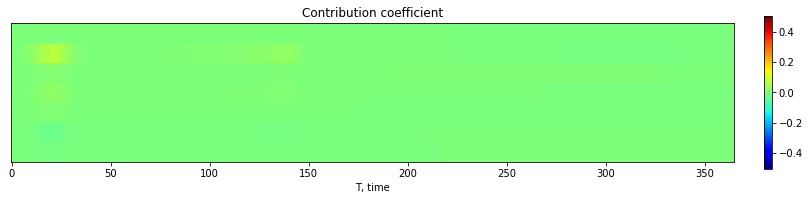

2622


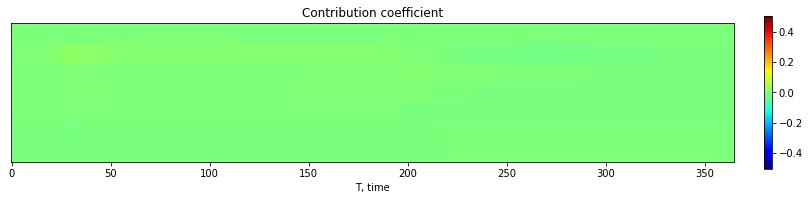

2628


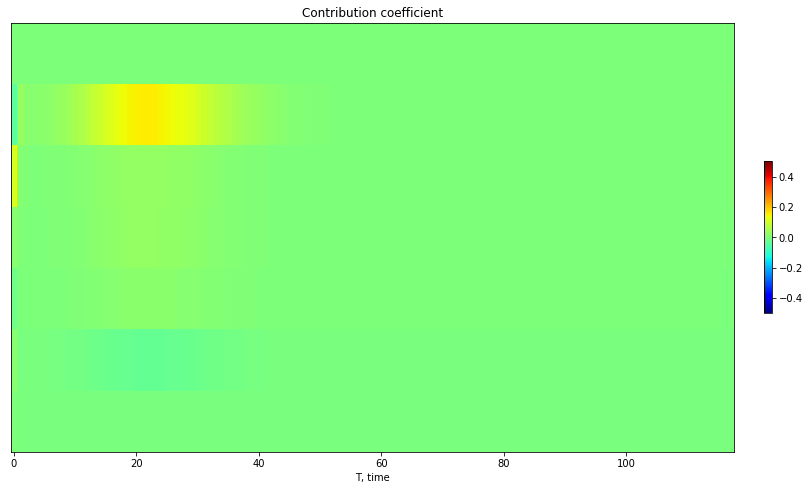

2651


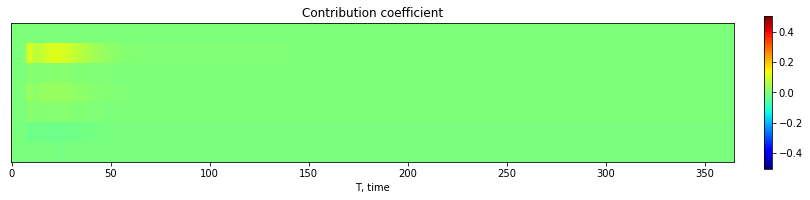

2667


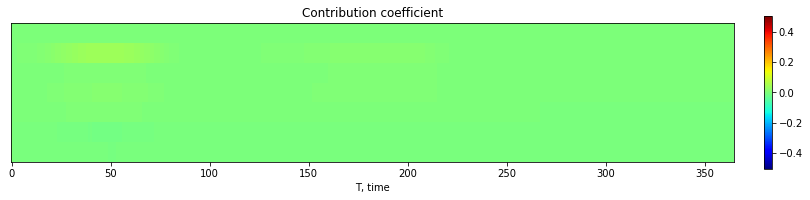

2691


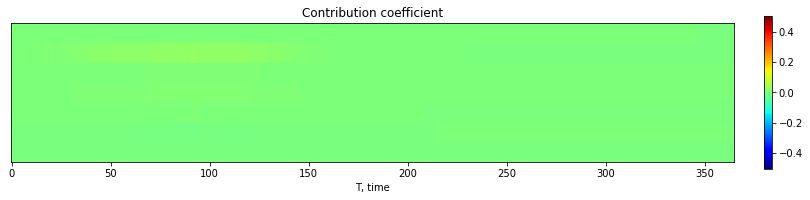

2697


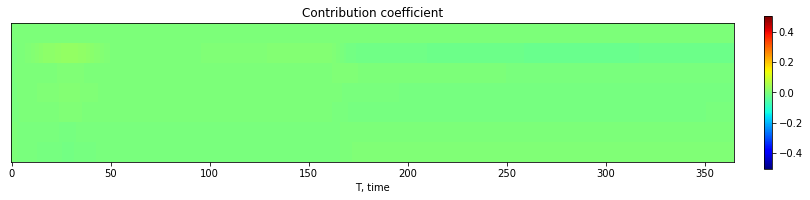

2698


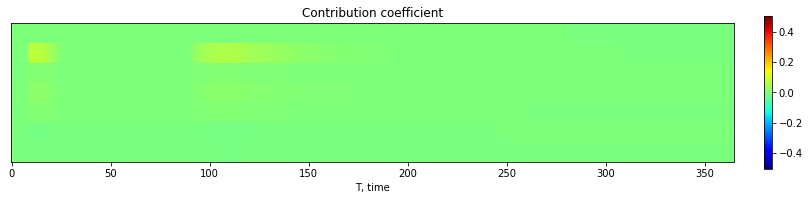

2711


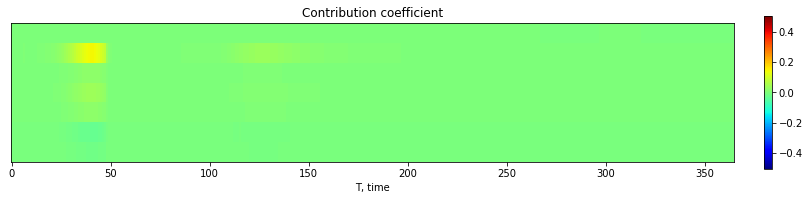

2722


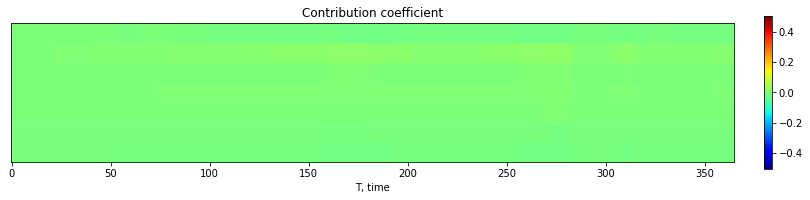

2735


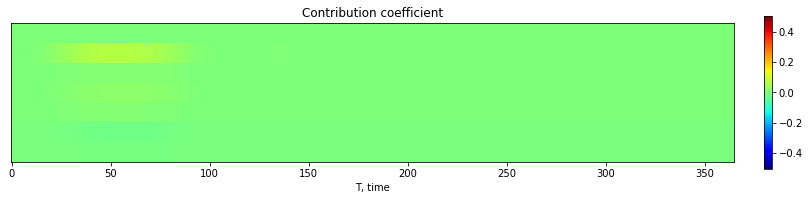

2745


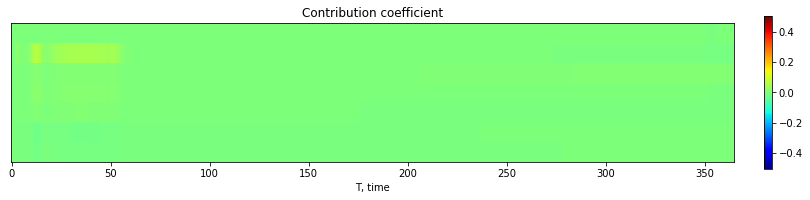

2758


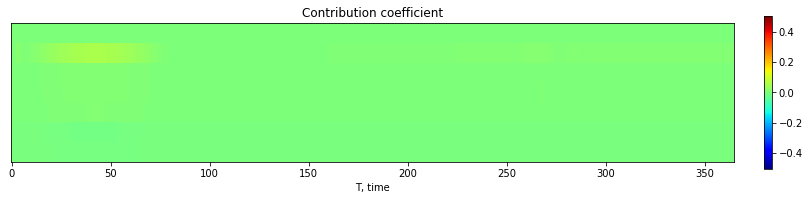

2773


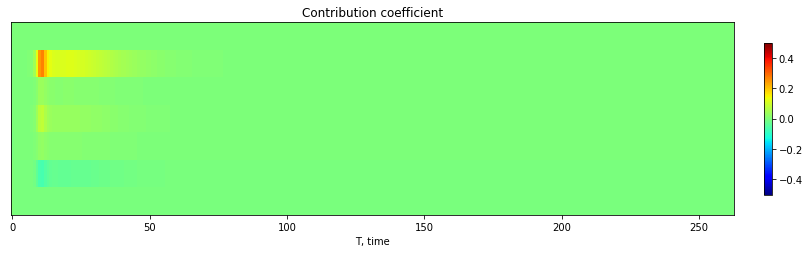

2783


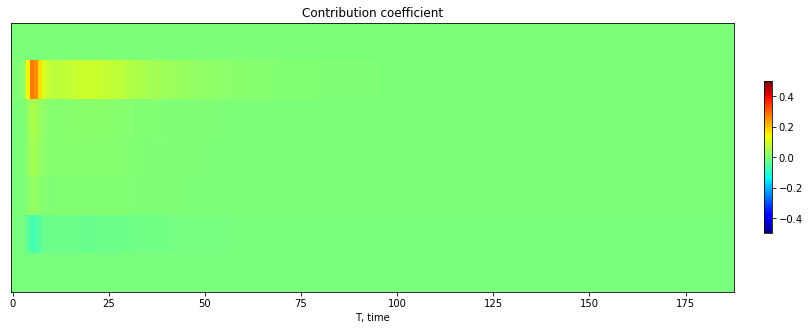

2802


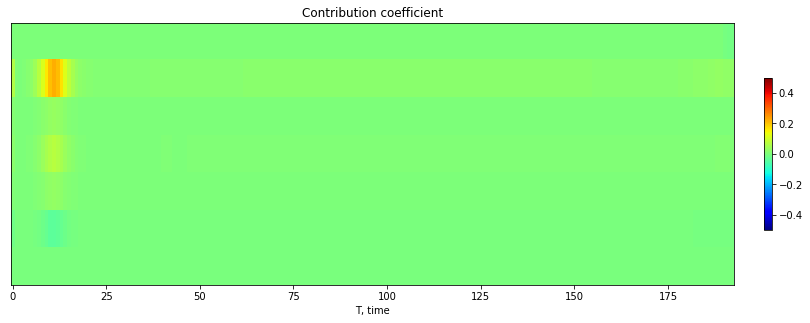

2803


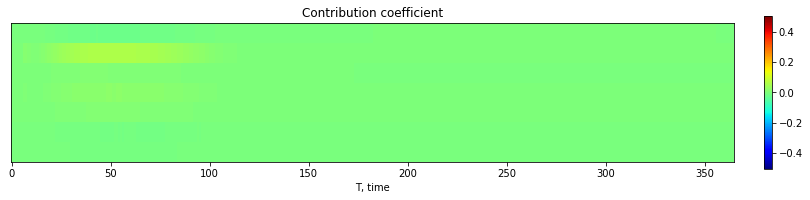

2827


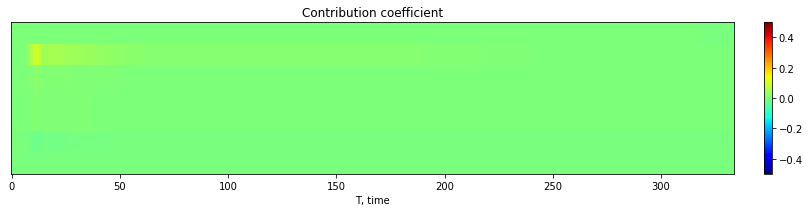

2830


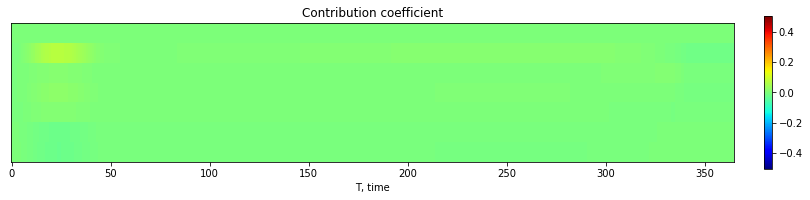

2832


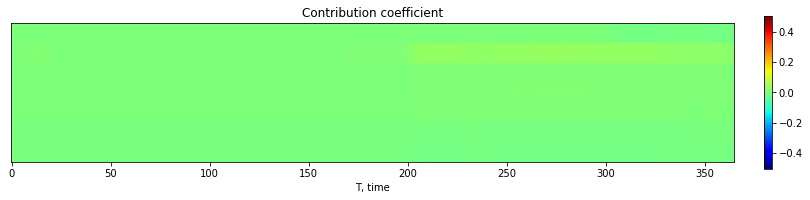

2842


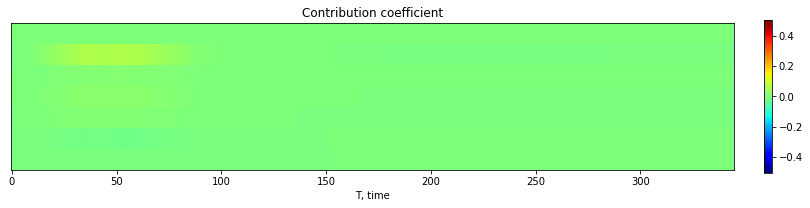

2845


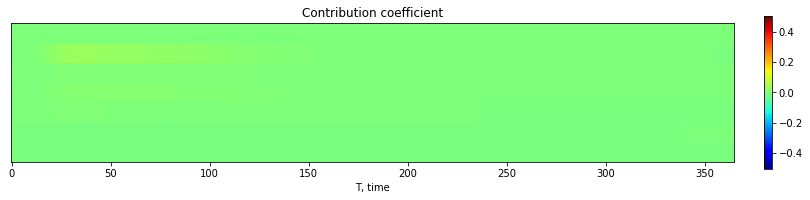

2877


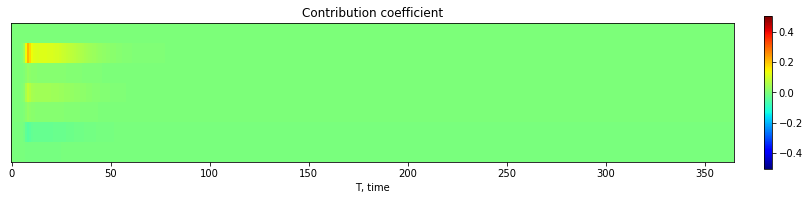

2882


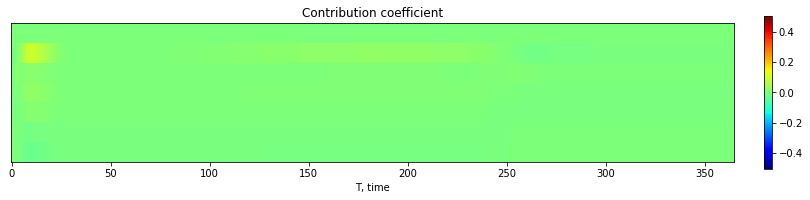

2911


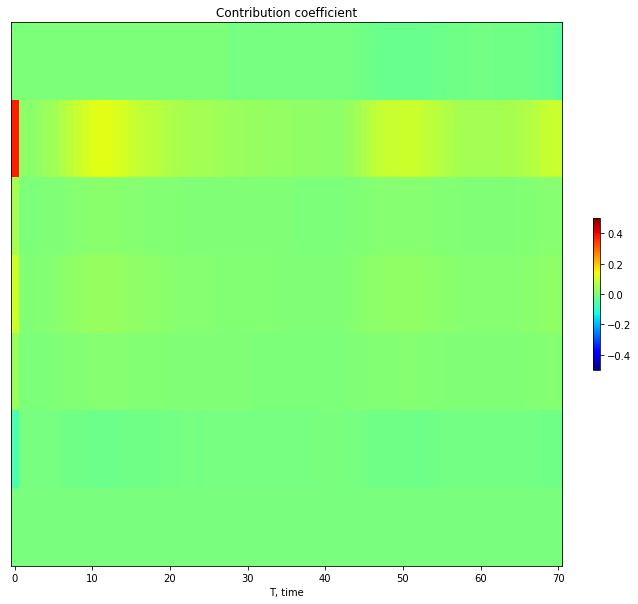

2922


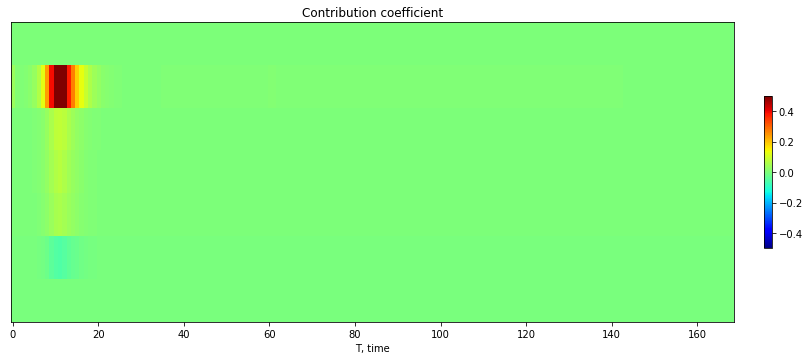

2931


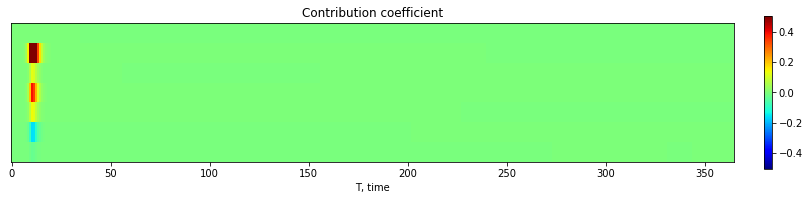

2969


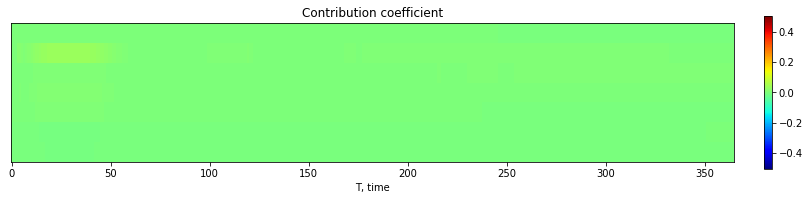

2971


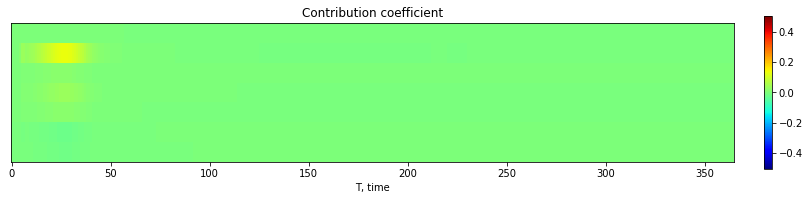

2984


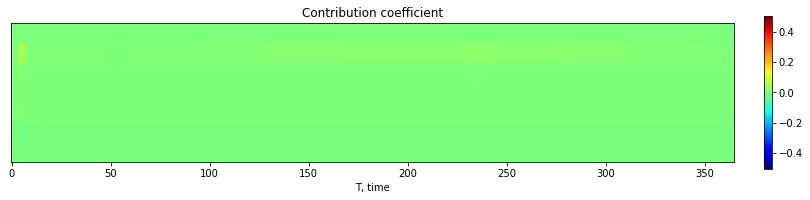

2985


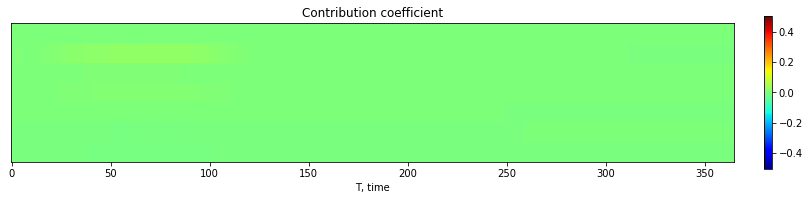

3000


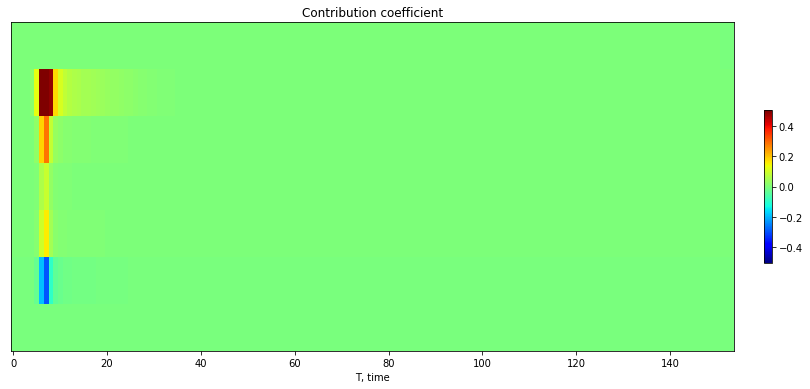

3029


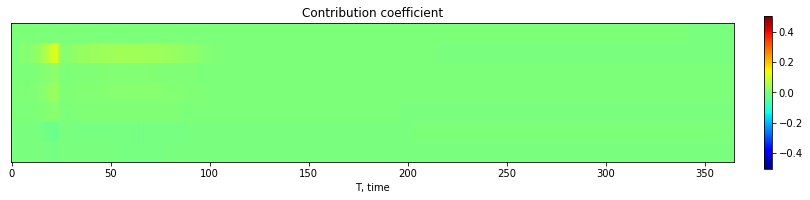

3040


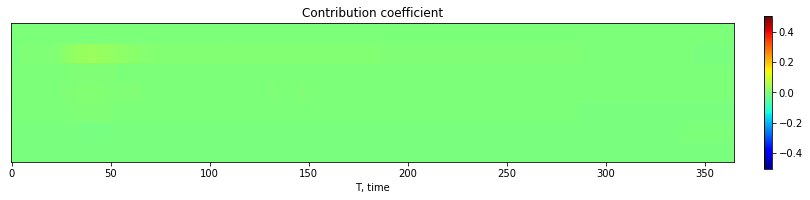

3087


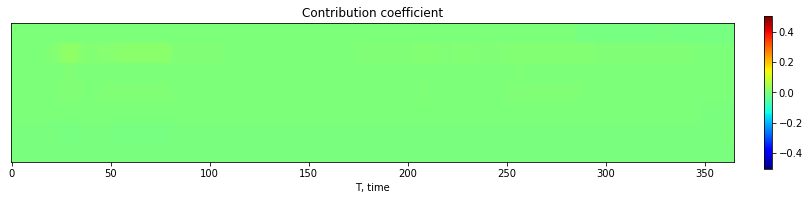

3101


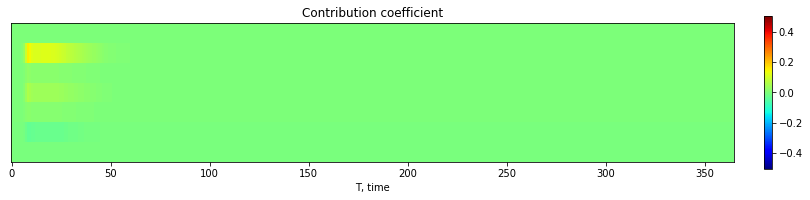

3106


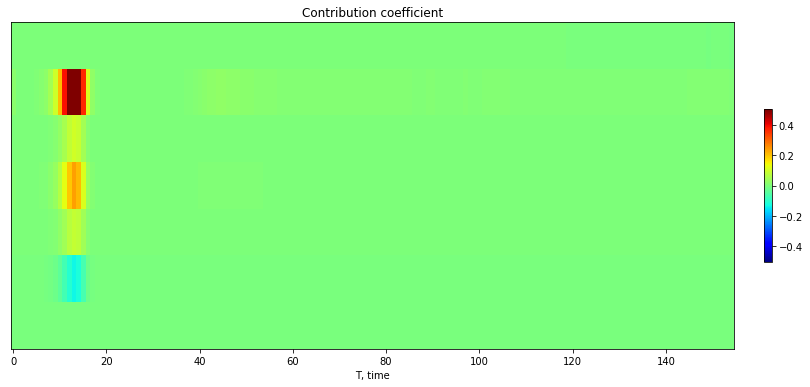

3119


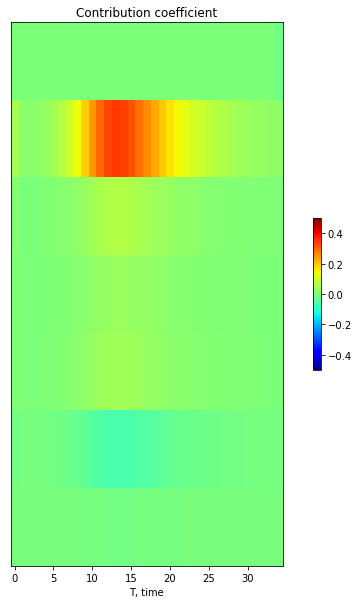

3139


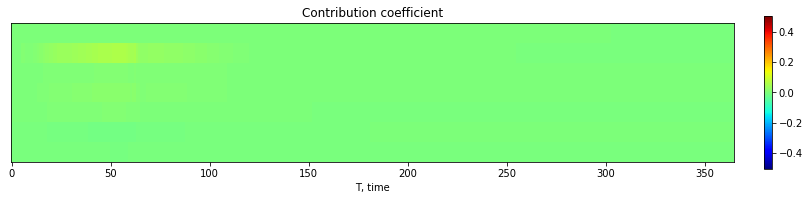

3140


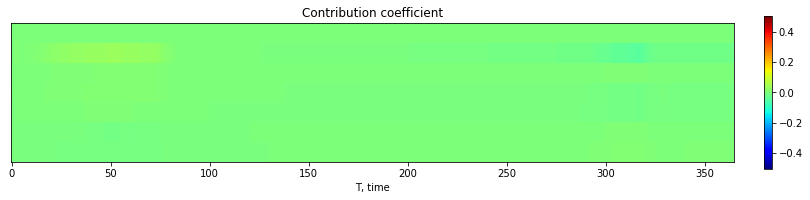

3155


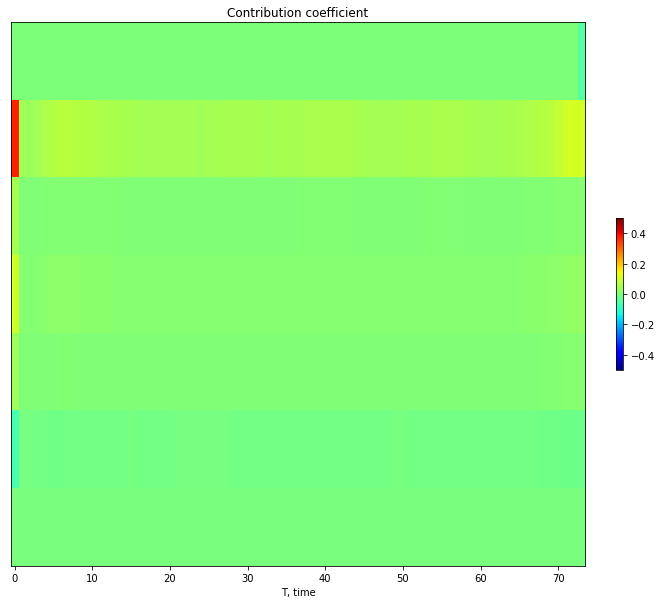

3190


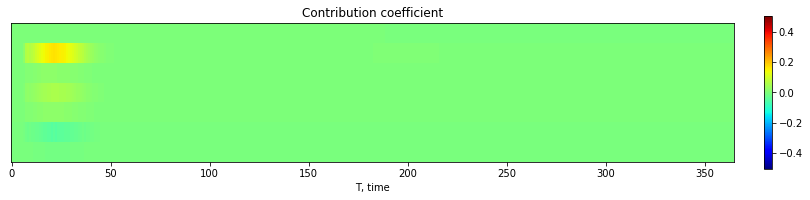

3245


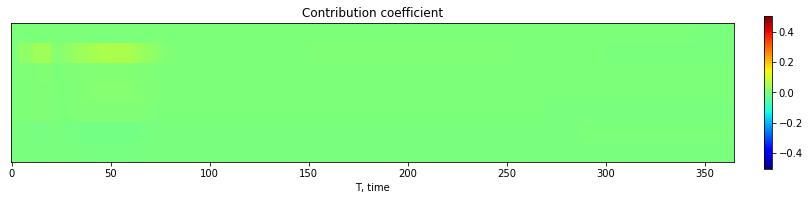

3254


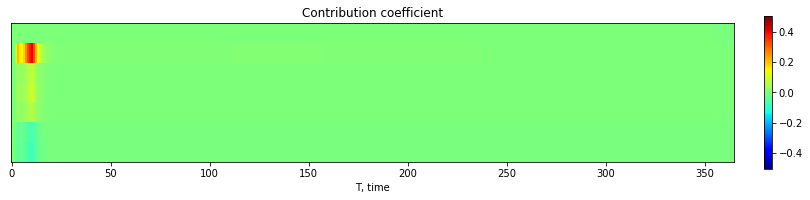

3264


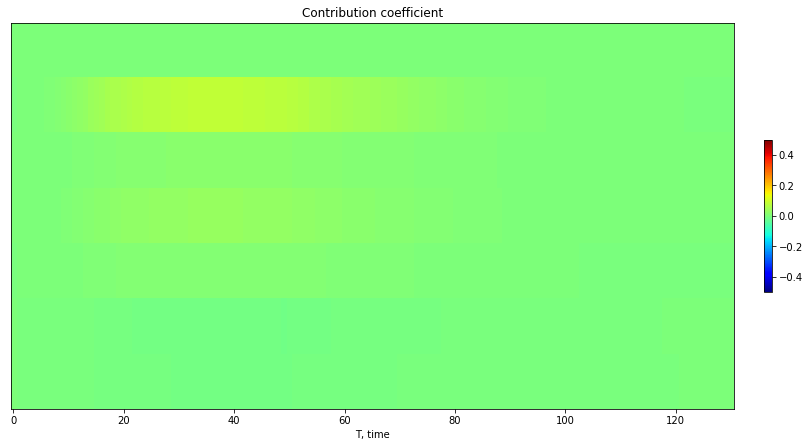

3265


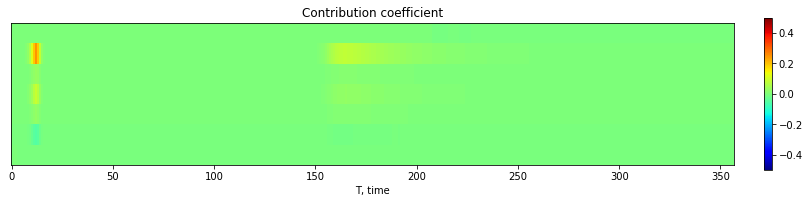

3277


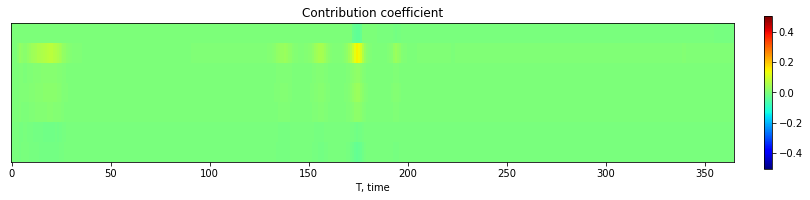

3281


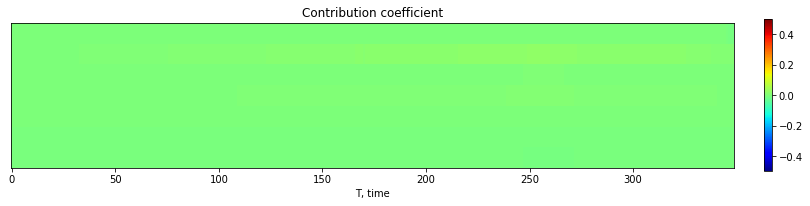

3291


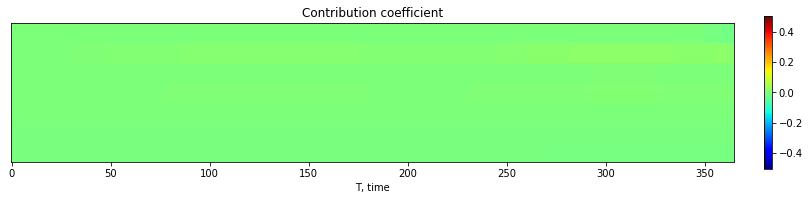

3298


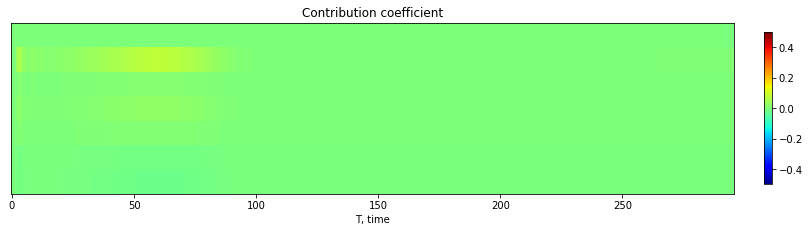

3311


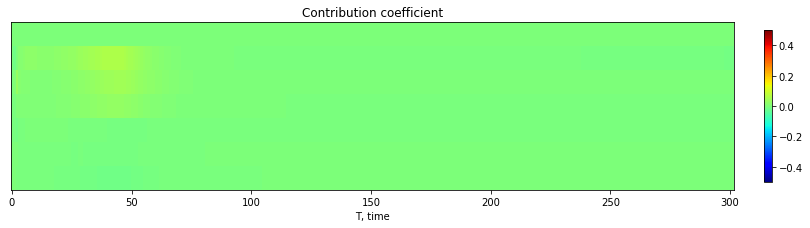

3315


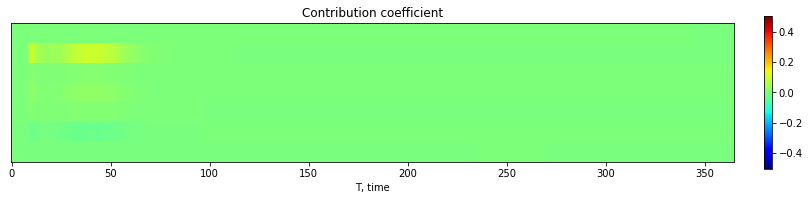

3328


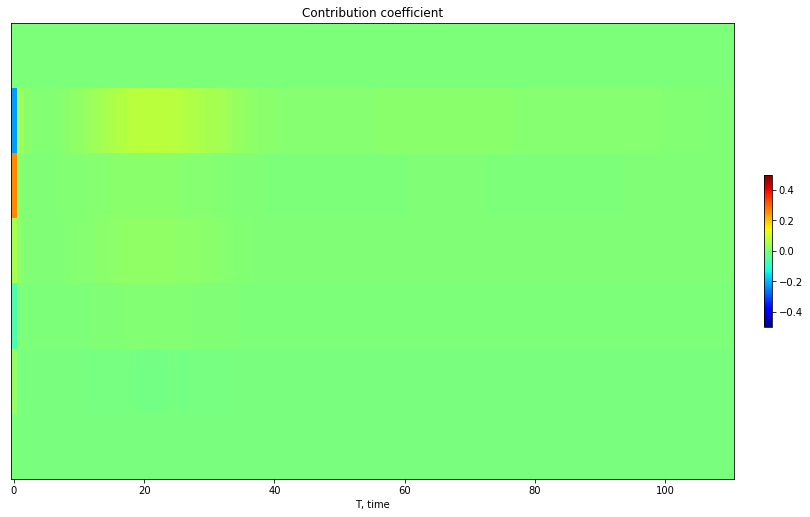

3339


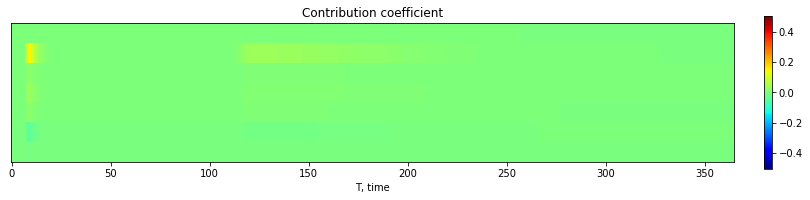

3342


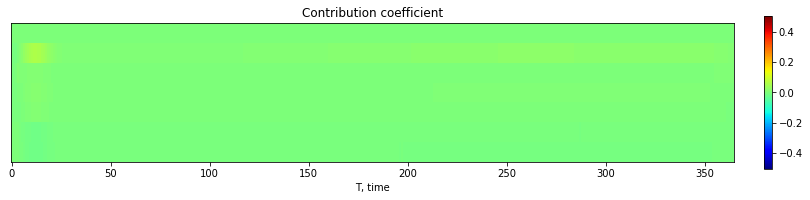

3347


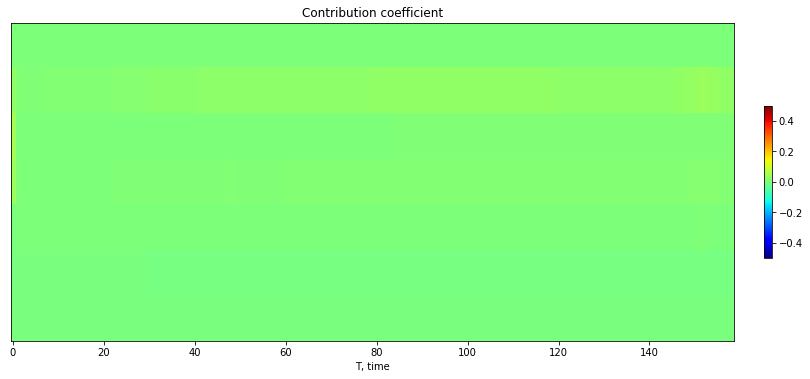

3365


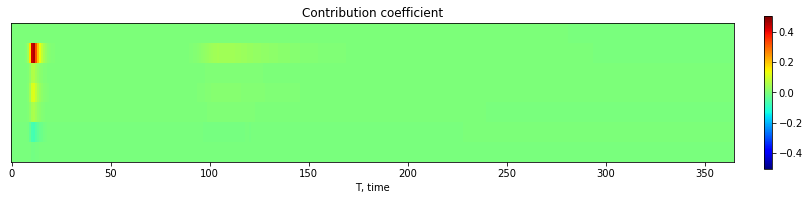

3381


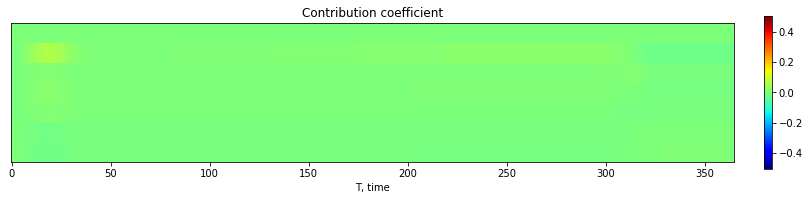

3382


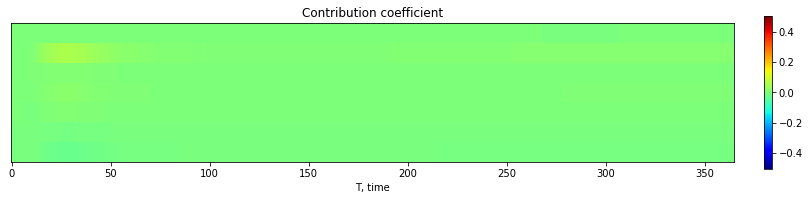

3402


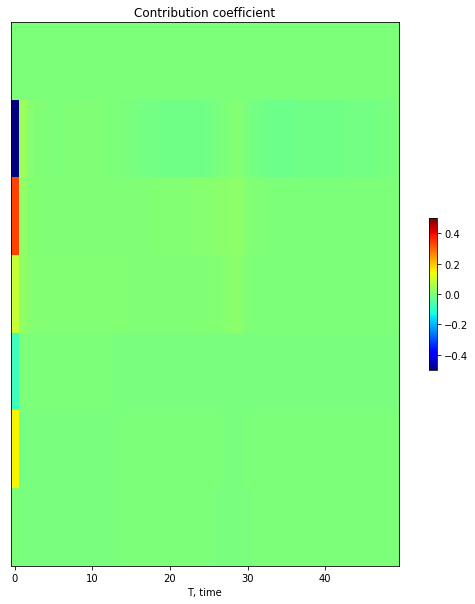

3420


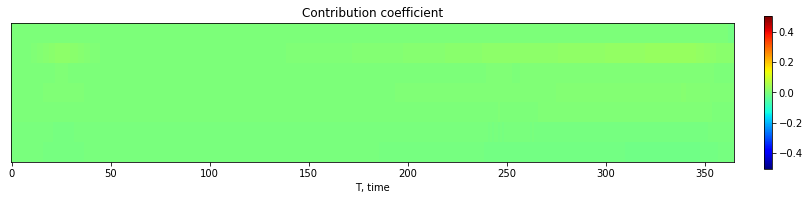

3444


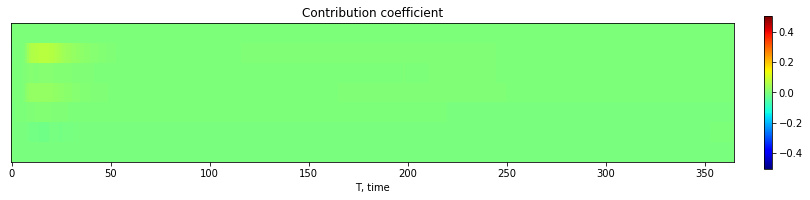

3454


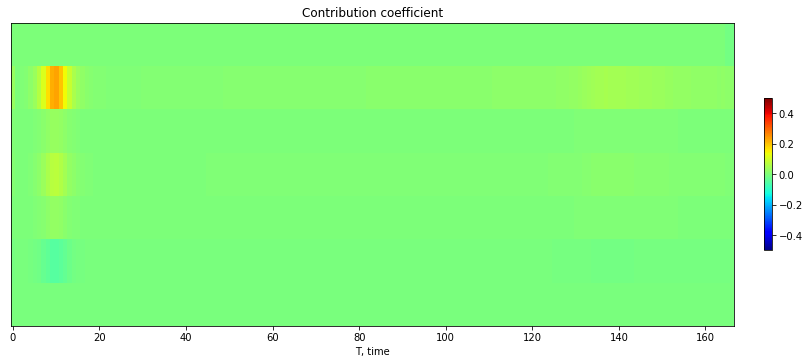

3458


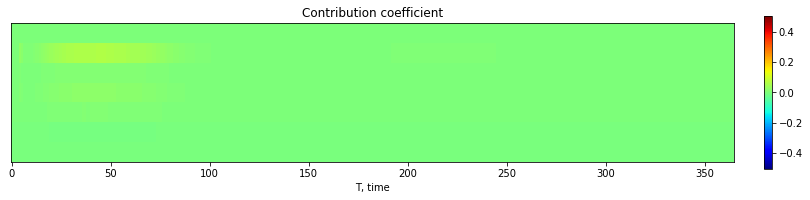

3459


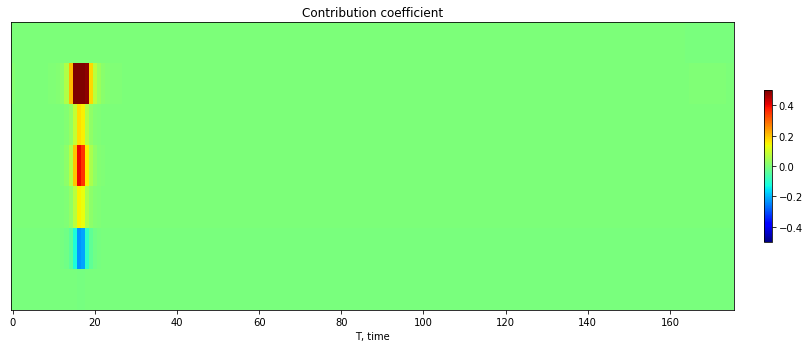

3464


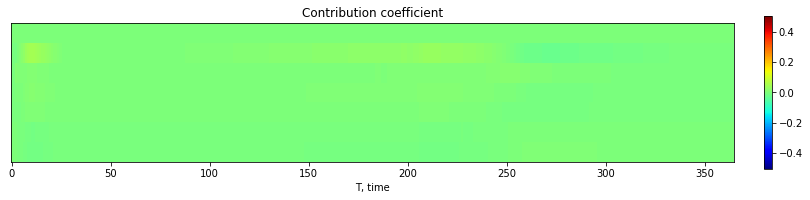

3497


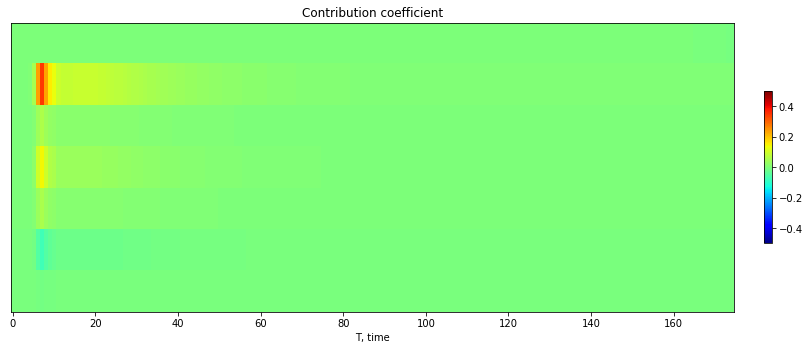

3498


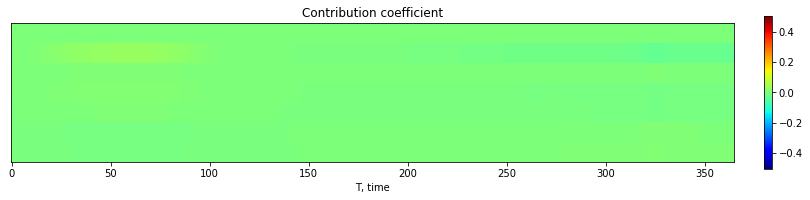

3511


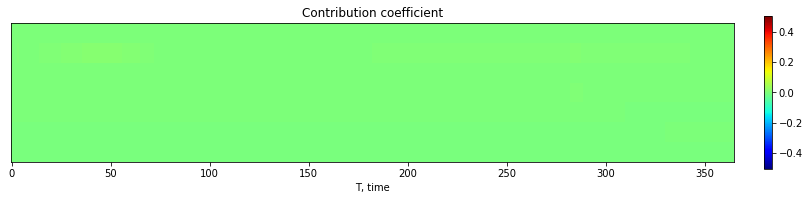

3521


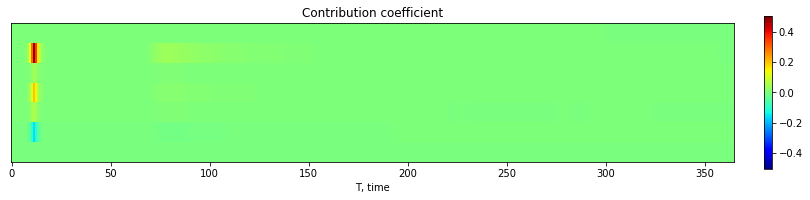

3525


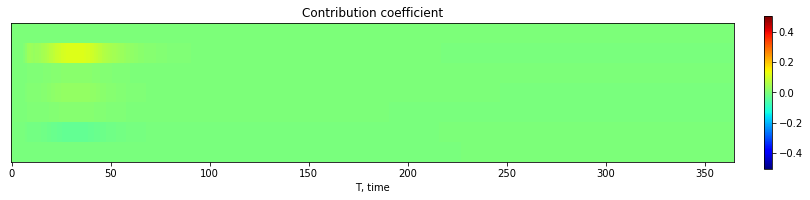

3527


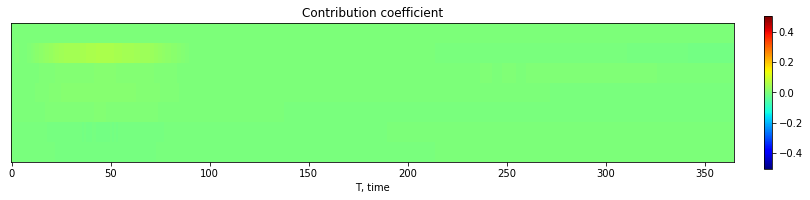

3528


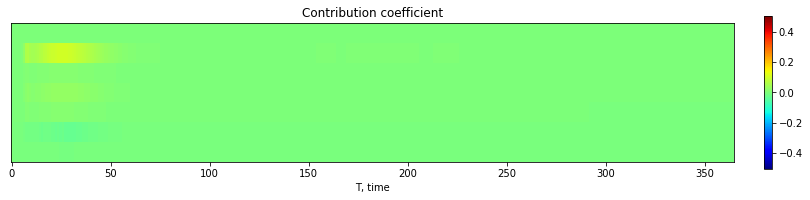

3529


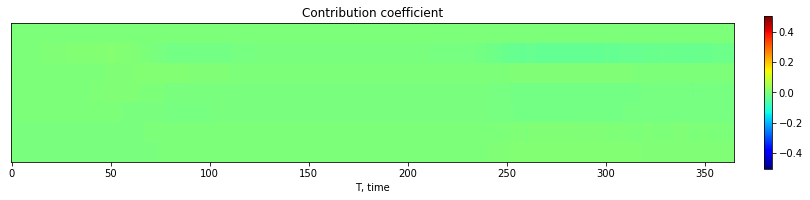

3540


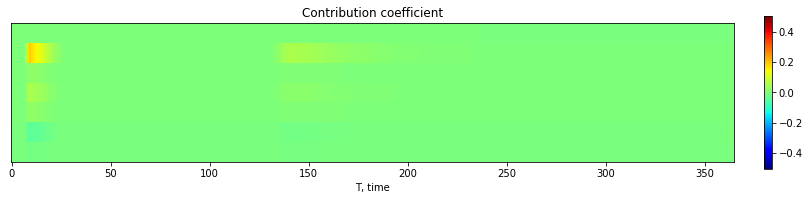

In [152]:
for i, (c, t, n) in enumerate(zip(*raw.values())):
    if n[-1] - ord('0'):
        print(i)
        show(t, 10)

In [1305]:
positive = []
negative = []
for c,t,n in (zip(*raw.values())):
    if t.shape[0] != 365:
        continue
    if n[-1] - ord('0'):
        negative.append(t)
    else:
        positive.append(t)
        
positive = np.array(positive)
negative = np.array(negative)

In [1306]:
len(positive), len(negative)

(3269, 183)

In [1568]:
p = np.mean(positive, axis=0)
n = np.mean(negative, axis=0)

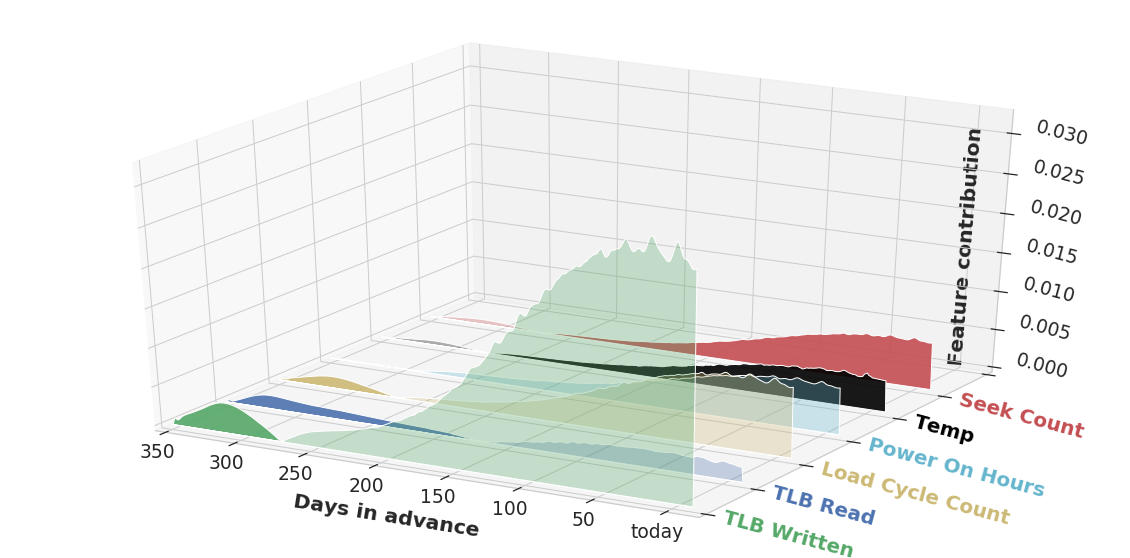

In [1570]:
plotmat(p)

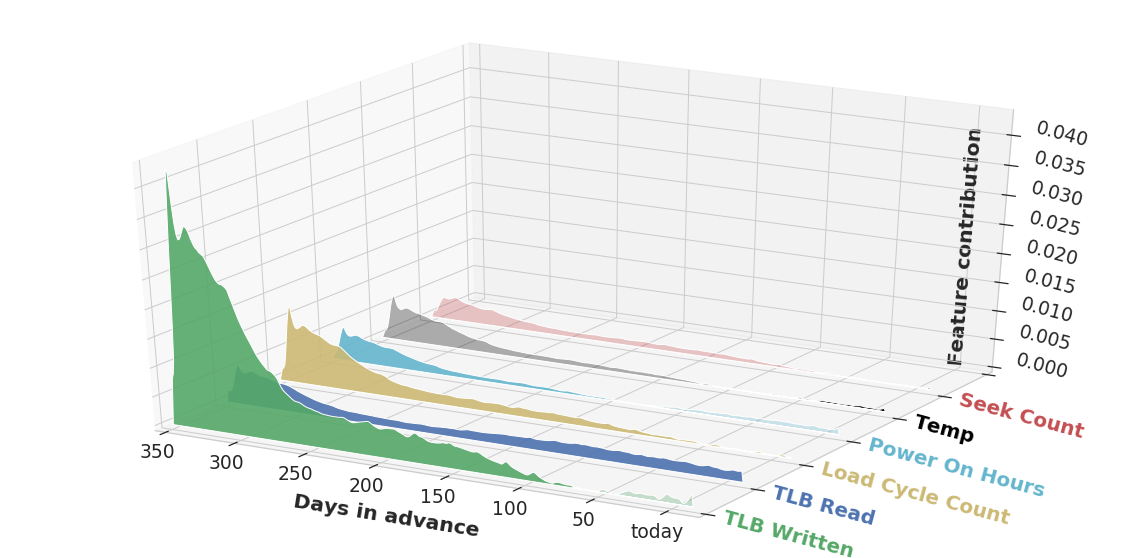

In [1569]:
plotmat(n)

In [143]:
idx = 20

In [144]:
t = raw["total_contribution"][idx]
c = raw["coefficients"][idx]
x = t / c

In [145]:
def show(x, asp):
    figure = plt.figure(figsize=(30,10))
    ax_coeff = plt.subplot(1, 2, 1, title='Contribution coefficient')
    plt.xlabel('T, time')
    plt.yticks([])
    im = plt.imshow(x.T, cmap='jet', vmin=-0.5, vmax=0.5)
    ax_coeff.set_aspect(asp)
    plt.colorbar(im,fraction=0.01, pad=0.04)
    plt.show()

IndexError: list index out of range

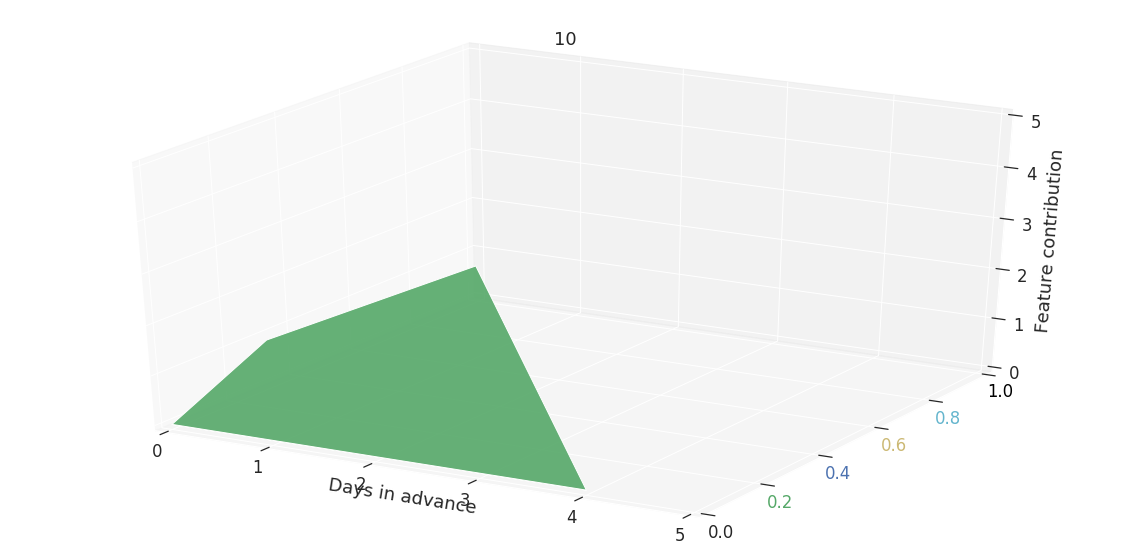

In [1311]:
plotmat(x, 10)

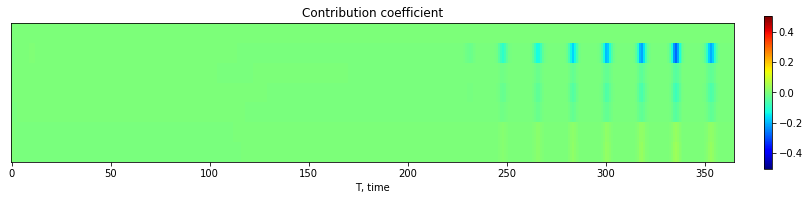

In [147]:
show(t, 10)

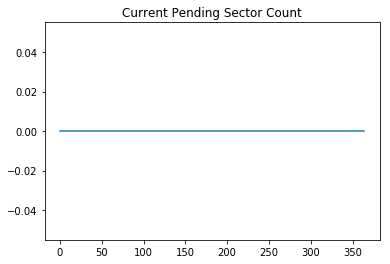

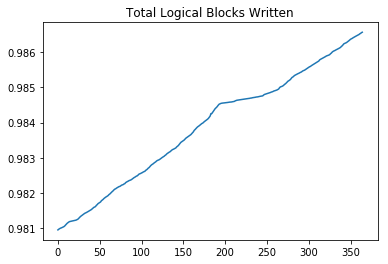

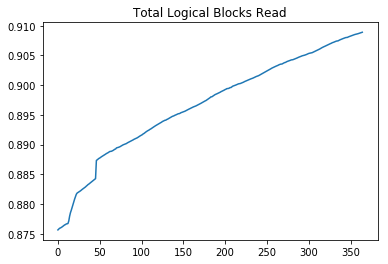

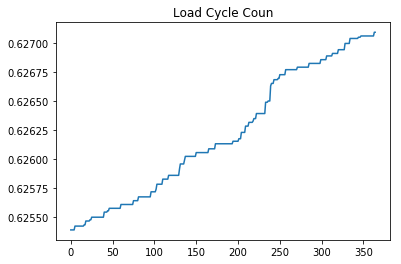

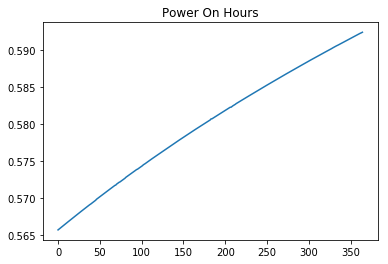

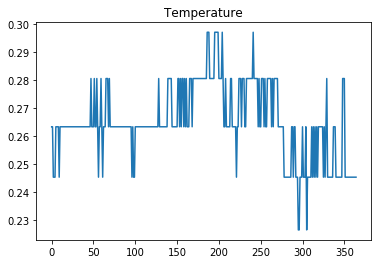

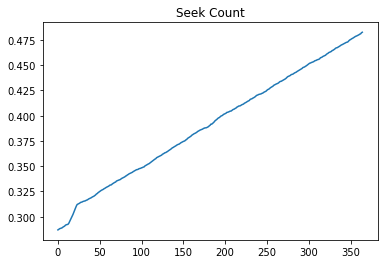

In [148]:
labels =[
                    "Current Pending Sector Count",
                    "Total Logical Blocks Written",
                    "Total Logical Blocks Read",
                    "Load Cycle Coun",
                    "Power On Hours",
                    "Temperature",
                    "Seek Count"
                ]

for i in range(x.shape[1]):
    plt.title(labels[i])
    plt.plot(x[:, i])
    plt.show()

In [57]:
def get_metric(mat_A,  mat_B):
    def _distance_it(m):
        d = np.copy(m)

        for i in range(1, m.shape[0]):
            d[i,0] += d[i-1, 0]
            for j in range(1, m.shape[1]):
                d[i,j] += min([d[i-1, j], d[i, j-1], d[i-1, j-1]])

        return d[-1,-1]
    
    distances = scipy.spatial.distance.cdist(mat_A, mat_B, metric='cosine')
        
    return _distance_it(distances) / (distances.size)

def get_mat(idx):
    return raw["total_contribution"][idx]

In [410]:
get_metric(get_mat(134), get_mat(146))

0.00015674340446758962

In [ ]:
N = len(raw["names"])
dist_mat = np.zeros((N, N))
for i in range(N):
    for j in range(i+1, N):
        dist_mat[i][j] = get_metric(get_mat(i), get_mat(j))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


In [523]:
dist_mat_dic = {"dists": T}

In [524]:
pickle.dump(dist_mat_dic, open("raw_dist.pkl", "wb"))

In [422]:
dist_mat[1000]

array([0., 0., 0., ..., 0., 0., 0.])

In [424]:
%timeit get_metric(get_mat(10), get_mat(100))

130 ms ± 3.68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [432]:
from fastdtw import fastdtw

x = np.array([[1,1], [2,2], [3,3], [4,4], [5,5]])
y = np.array([[2,2], [3,3], [4,4]])
x.shape, y.shape

((5, 2), (3, 2))

In [459]:
%timeit dist, _ = fastdtw(get_mat(10), get_mat(100), dist=scipy.spatial.distance.cosine)

219 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [457]:
get_metric(get_mat(10), get_mat(100))

17.556749451898327

In [474]:
dist_mat[897]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       1.06547199e-04, 1.56024595e-05, 7.53375331e-05])

In [ ]:
import multiprocessing

N = len(raw["names"])

def computedtw(i):
    d = np.zeros(N)
    for j in range(i+1, N):
        d[j] = get_metric(get_mat(i), get_mat(j))
    print(i)
    return d
    
pool_size = 14

pool = multiprocessing.Pool(pool_size)
start = 909
end = N
result = pool.map(computedtw, range(start,end))
dist_mat[start:end] = result

1533
1485
1389
1437
1341
1293
1245
1197
1101
1149
1005
1246
1053
957
909
1534
1486
1438
1390
1342
1294
1198
1247
1150
1102
1006
1054
958
910
1535
1487
1391
1439
1343
1295
1248
1199
1151
1103
1055
1007
959
911
1536
1488
960
1440
1392
1344
1296
1249
1200
1152
1104
1056
1537
1008
1489
912
1441
1393
1345
961
1297
1250
1201
1538
1153
1057
1105
1490
1009
1442
1394
1346
913
1298
962
1539
1251
1202
1491
1154
1058
1106
1443
1010
1395
1347
914
1299
1540
963
1252
1492
1203
1444
1155
1059
1396
1107
1348
1011
1541
1300
915
1493
1253
1204
1445
964
1156
1397
1060
1349
1108
1542
1012
1301
1494
1446
1254
916
1205
965
1398
1157
1061
1350
1543
1109
1013
1495
1302
1496
1447
1255
917
1399
1206
1158
1544
1351
966
1062
1110
1497
1303
1014
1448
1256
1400
1207
1545
918
1352
1159
967
1498
1063
1111
1449
1304
1015
1401
1257
1546
1402
1208
1353
919
1160
1499
1450
1305
1064
1112
968
1016
1547
1258
1403
1209
1354
1500
1161
1451
920
1306
1065
1113
1548
969
1017
1259
1404
1210
1355
1501
1162
1452
1307
921
1549
1066
1

In [514]:
dist_mat

array([[0.00000000e+00, 3.57588299e-05, 3.17418195e-05, ...,
        4.48221209e-05, 1.71821377e-04, 3.34785292e-05],
       [0.00000000e+00, 0.00000000e+00, 1.49325636e-06, ...,
        3.72282615e-06, 1.02221618e-04, 2.55288209e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.30115442e-06, 9.48425362e-05, 1.12428189e-06],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.08468600e-04, 8.01315925e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.90436402e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [517]:
T = np.copy(dist_mat)

In [518]:
T = T + T.T

In [520]:
np.alltrue(T[0] - dist_mat[0] == 0)

True

In [609]:
np.argmax(np.random.choice(groups, 5))

2

In [69]:
from sklearn.cluster import DBSCAN

In [76]:
T = pickle.load(open("raw_data/dtw_raw.pkl", "rb"))['dists']
assert np.alltrue (T == T.T)

In [110]:
clustering = DBSCAN(eps=0.000015, min_samples=20, metric="precomputed").fit(T)

In [111]:
np.unique(clustering.labels_, return_counts=True)

(array([-1,  0,  1]), array([ 111, 3423,   32]))

In [112]:
np.unique(clustering.labels_)

array([-1,  0,  1])

In [113]:
lbl = {}
for i in np.unique(clustering.labels_):
    lbl[i] = 0
for i,l in enumerate(clustering.labels_):
    if i in neg_idx:
        lbl[l] = lbl[l] + 1
        
szs = np.unique(clustering.labels_, return_counts=True)[1]
print(szs)
print(lbl)
dec_r = [l/s for l,s in zip(lbl.values(), szs)]

det = 0
fa = 0
for r,t in zip(dec_r, lbl.values()):
    if r > 0.5:
        det = det + t
    else:
        fa = fa + t
det / len(neg_idx), fa / (N - len(neg_idx)) 

NameError: name 'neg_idx' is not defined

(111,)
[0.00065] [0.00246]
(3423,)
[0.00002] [0.00009]
(32,)
[0.] [0.]


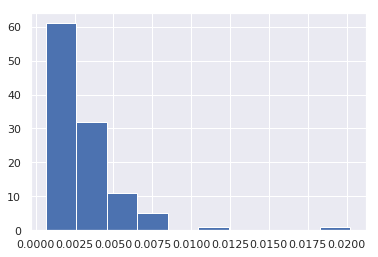

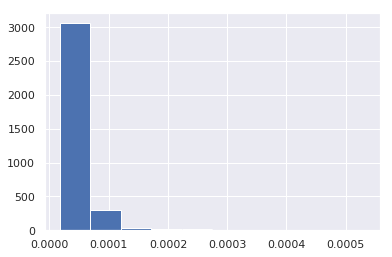

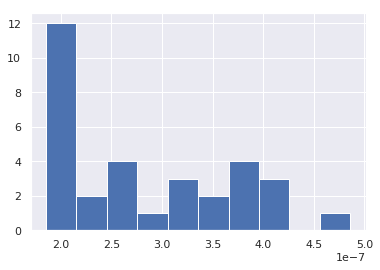

<Figure size 432x288 with 0 Axes>

In [114]:
N = T.shape[0]
sns.set()
centroids = []
for l in lbl:
    idx = np.where(clustering.labels_ == l)[0]
    Tf = np.array([T[i, idx] for i in idx])
#     Tfn = np.array([T[i, idx] for i in idx if i in neg_idx])
#     Tfp = np.array([T[i, idx] for i in idx if i not in neg_idx])
    
#     if Tfn.shape[0] > Tfp.shape[0]:
#         Tf = Tfn
#     else:
#         Tf = Tfp
    plt.hist(Tf.mean(axis=0))
    plt.figure()
    center = np.argmin(Tf.sum(axis=0))
    Tc = Tf[center]
    for i in range(N):
        if np.alltrue(T[i, idx] == Tc):
            print(Tc.shape)
            np.set_printoptions(suppress=True, precision=5)
            print(np.array([Tc.mean()]), np.array([3 * Tc.std()]))
            centroids.append(i)

In [115]:
centroids

[1885, 1298, 581]

In [116]:
m_c = [T[c][centroids] for c in centroids]

In [117]:
m_c

[array([0.     , 0.00148, 0.00148]),
 array([0.00148, 0.     , 0.00003]),
 array([0.00148, 0.00003, 0.     ])]

In [118]:
a = m_c[0][2]
b = m_c[1][2]
h = m_c[0][1]

cos = (-a**2 + b**2 + h**2) / (2 * h * b)
sin = np.sqrt(1 - cos**2)
cos

0.10281725570718132

In [119]:
c_loc = [
    [0, 0],
    [0, m_c[0][1]],
    [x, y]
]
c_loc

NameError: name 'y' is not defined

In [55]:
def plotmat(mat, title=''):
    
    sns.set(font_scale=1.7, style='whitegrid')
#     mat = np.abs(mat)
    fig = plt.figure(figsize=(20,10))
    ax = fig.gca(projection='3d', facecolor='white')

    labelsf =[      "TLB Written",
                    "TLB Read",
                    "Load Cycle Count",
                    "Power On Hours",
                    "Temp",
                    "Seek Count",
        ]
    
    def cc(arg, pos=True):
        if pos: alpha = 0.9
        else: alpha = 0.3
        return mcolors.to_rgba(arg, alpha=alpha)

    xs = np.arange(0, mat.shape[0])
    verts = []
    k = mat.shape[1] -1
    zs = np.arange(0, k)
    for z in zs:
        ys = np.copy(mat[:, z+1])
        ys[0] = 0
        ys[-1] = 0
        
        ypos = np.copy(ys)
        ypos[ypos < 0] = 0
        yneg = np.copy(ys)
        yneg[yneg > 0] = 0 
        
        verts.append(list(zip(xs, np.abs(ypos))))
        verts.append(list(zip(xs, np.abs(yneg))))
        
    zs = np.repeat(zs, 2)

    poly = PolyCollection(verts, facecolors=[ cc('g'), cc('g', False), cc('b'), cc('b', False),
                                             cc('y'), cc('y', False), cc('c'), cc('c', False), 
                                             cc('black'), cc('black', False), cc('r'), cc('r', False)])
    ax.add_collection3d(poly, zs=zs, zdir='y')
    
    
    ax.set_title(title)
    ax.set_xlabel('Days in advance', weight='bold')
    ax.set_xlim3d(0, mat.shape[0])
    ax.set_ylim3d(0, k)
#     ax.set_yticklabels(labels)
    ax.set_zlabel('Feature contribution', weight='bold')
    ax.set_zlim3d(0, np.abs(mat).max())
    

    for i,c in enumerate(['g', 'b', 'y', 'c', 'black', 'r']):
        ax.get_yticklabels()[i].set_color(c)
    
    fig.canvas.draw()
    
    ax.set_yticklabels(labelsf,rotation=-15,
                   verticalalignment='baseline',
                   fontweight='bold',
                   horizontalalignment='left')
    
    ax.set_zticklabels([item.get_text() for item in ax.get_zticklabels()],rotation=-15,
                   verticalalignment='baseline',
                   horizontalalignment='left')

    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[0] = 'today'
    labels = ['', *labels[:-1]]
    ax.set_xticklabels(labels[::-1])
    
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
    ax.zaxis.labelpad=-40
    ax.xaxis.labelpad=25
    

    
    plt.show()

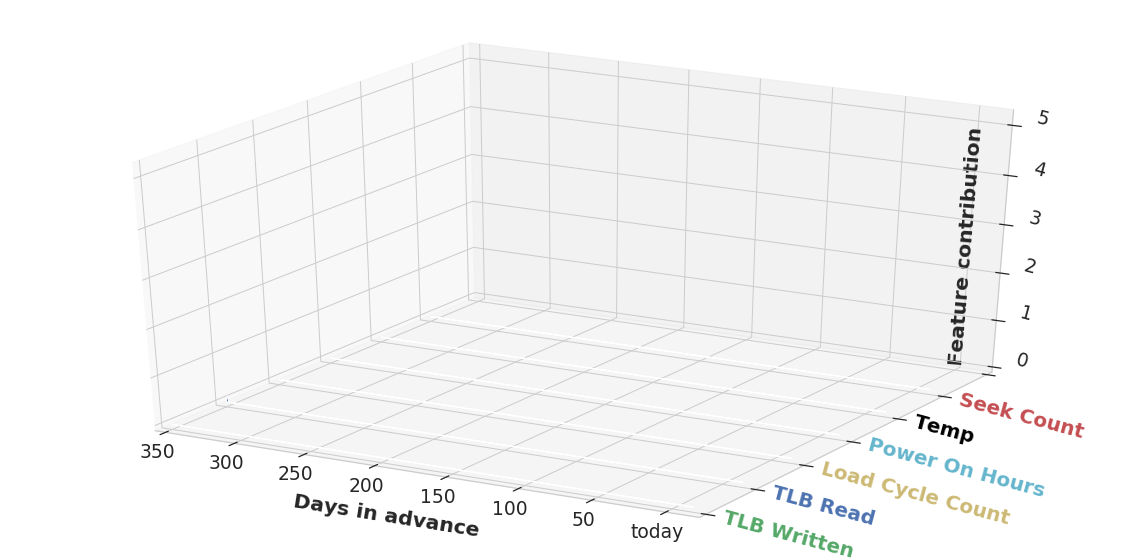

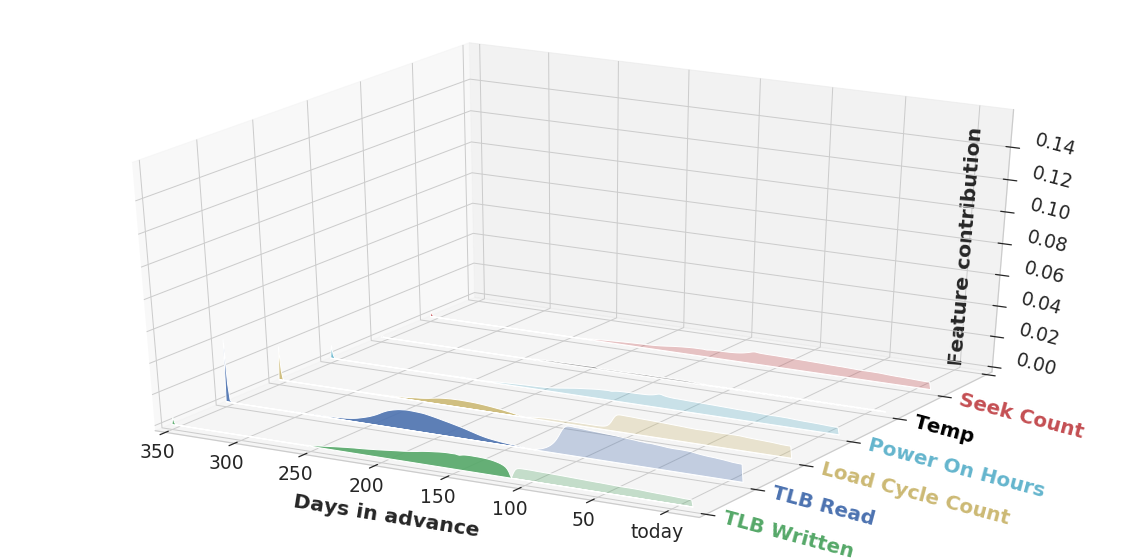

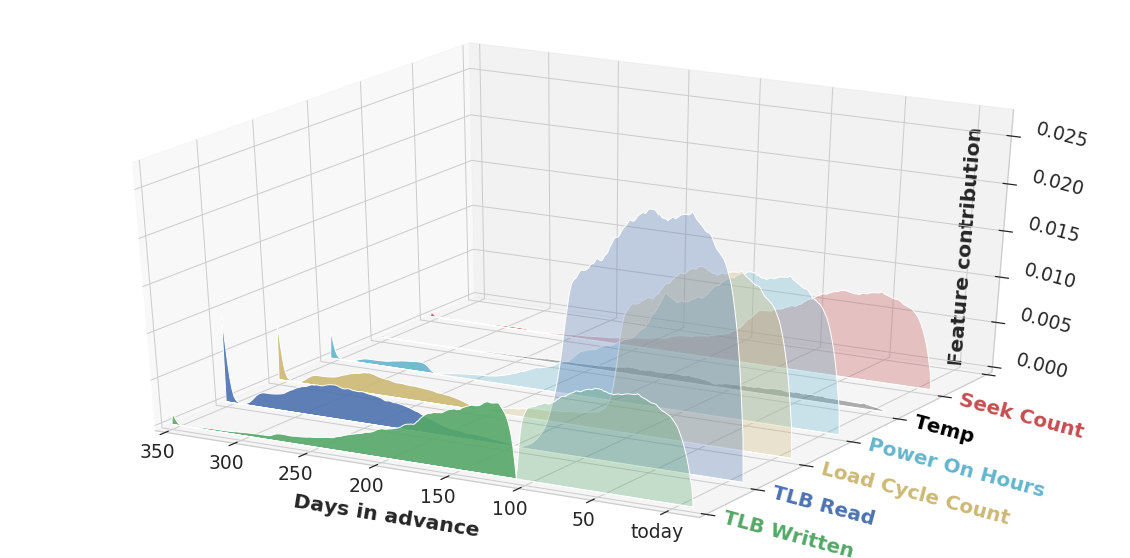

In [120]:
for c in centroids:
    plotmat(get_mat(c), title='')

In [1374]:
clustering.get_params()

{'algorithm': 'auto',
 'eps': 4.5e-05,
 'leaf_size': 30,
 'metric': 'precomputed',
 'metric_params': None,
 'min_samples': 30,
 'n_jobs': None,
 'p': None}

In [758]:
clustering.fit_predict(T, T[:2])

array([0, 0, 0, ..., 0, 0, 0])

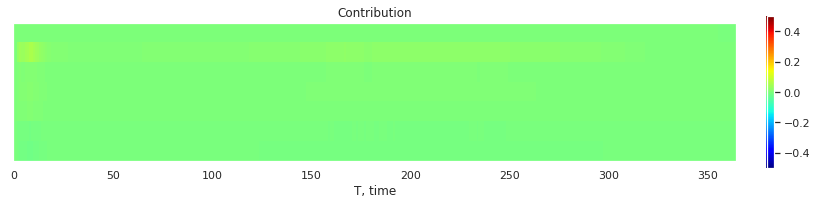

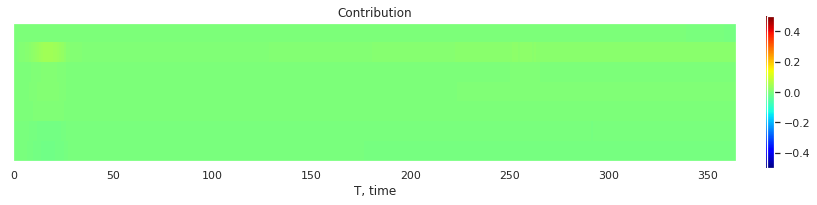

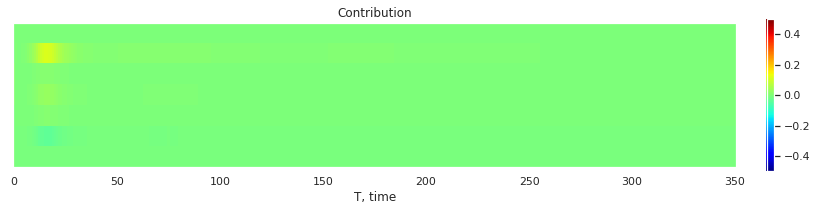

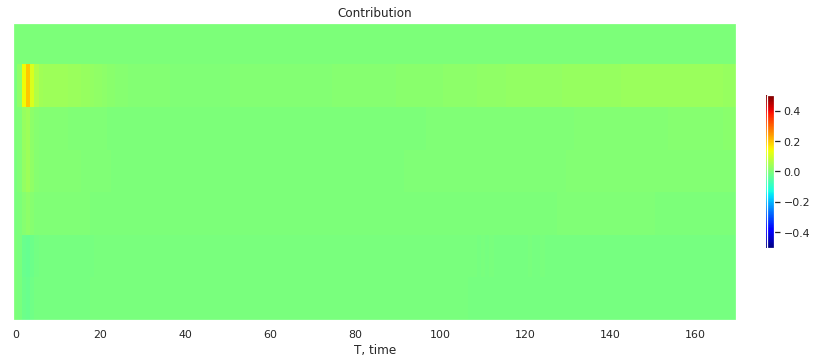

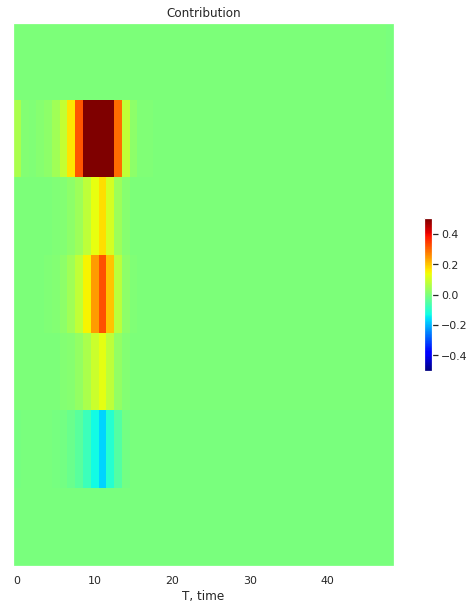

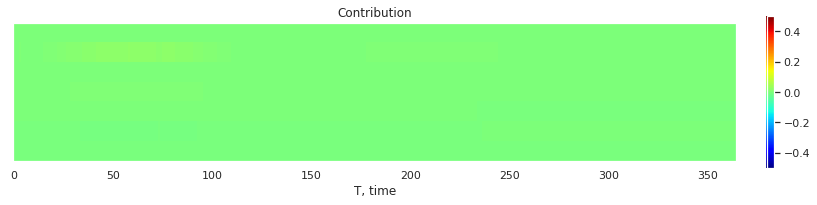

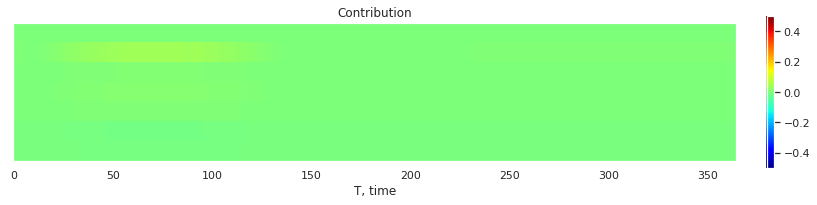

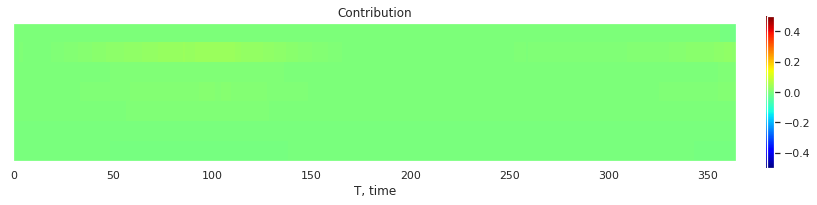

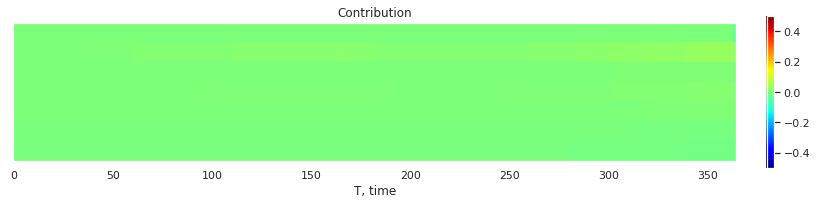

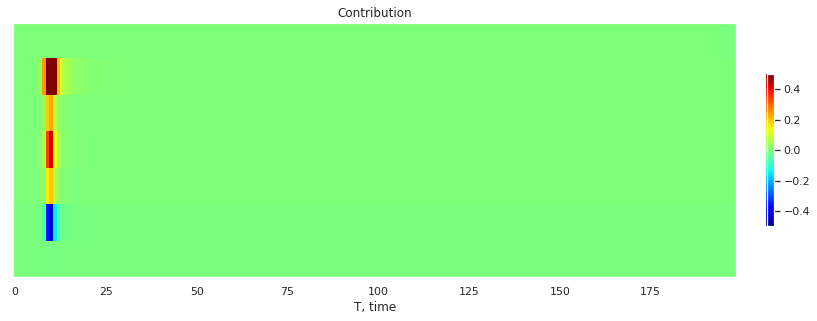

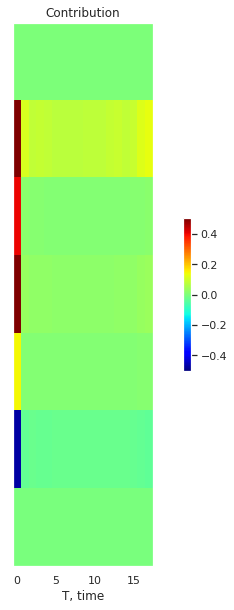

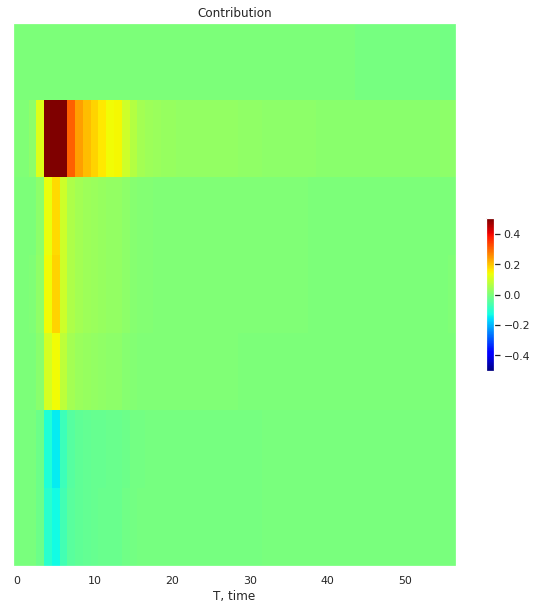

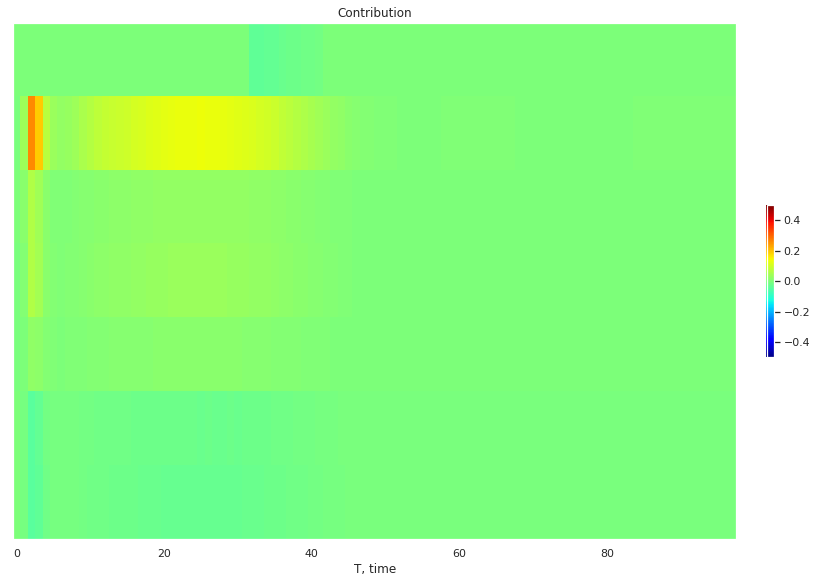

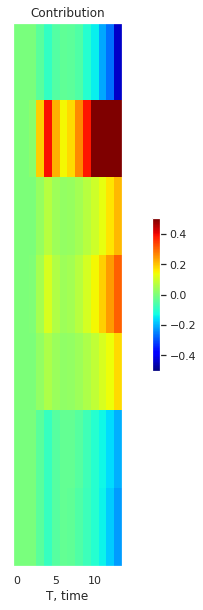

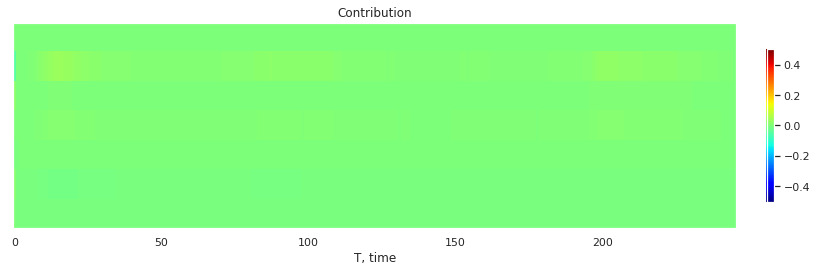

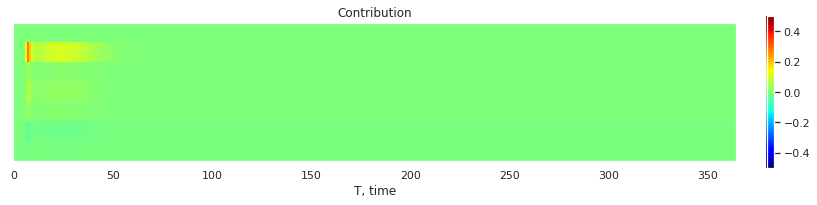

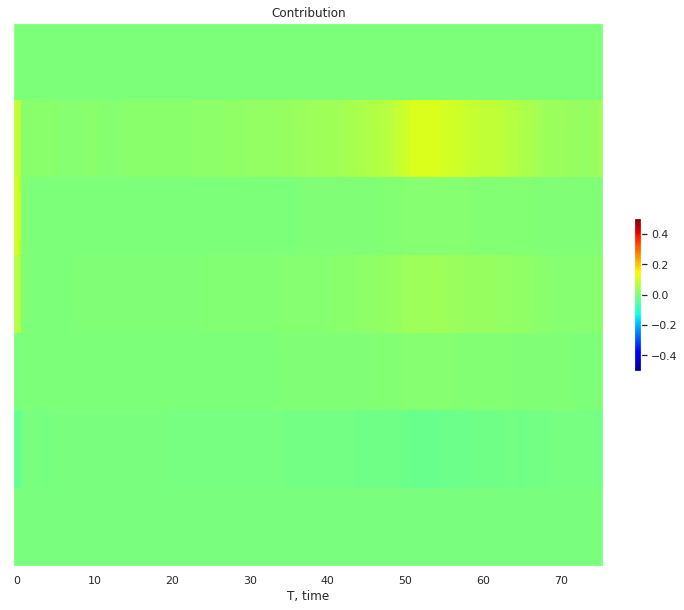

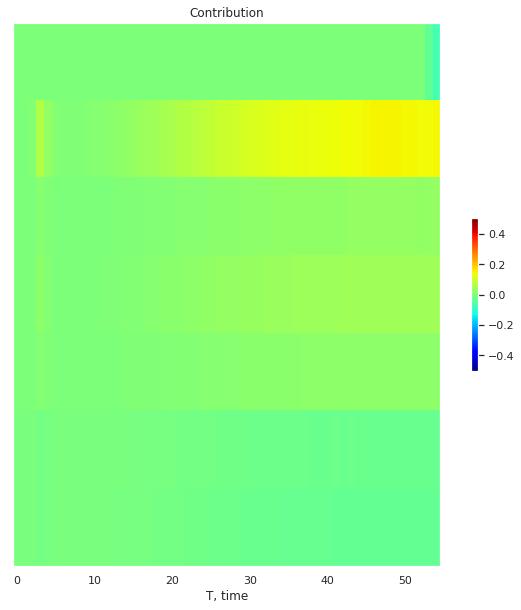

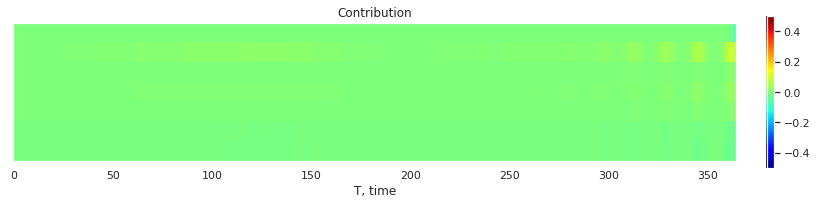

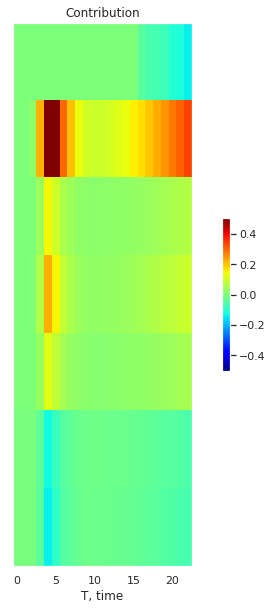

In [694]:
for i in np.where(clustering.labels_ == 1)[0][:20]:
    show(get_mat(i), 10)

In [670]:
Tneg = np.array([T[n, neg_idx] for n in neg_idx])

In [671]:
Tneg.shape

(265, 265)

In [686]:
clustering_neg = DBSCAN(eps=0.00004, min_samples=20, metric="precomputed").fit(Tneg)
np.unique(clustering_neg.labels_, return_counts=True)

(array([-1,  0,  1]), array([ 91, 129,  45]))

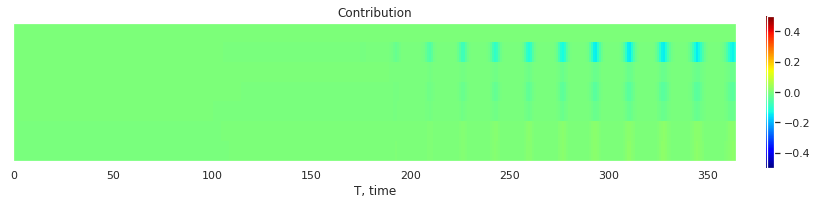

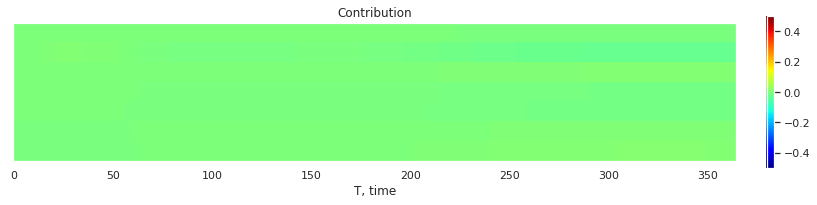

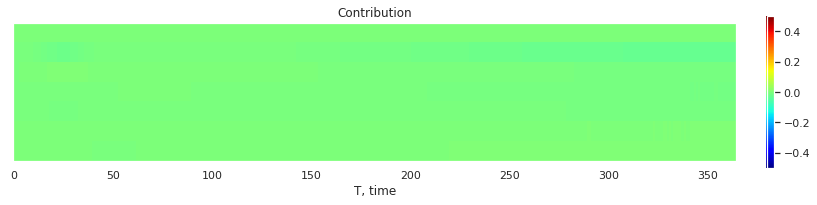

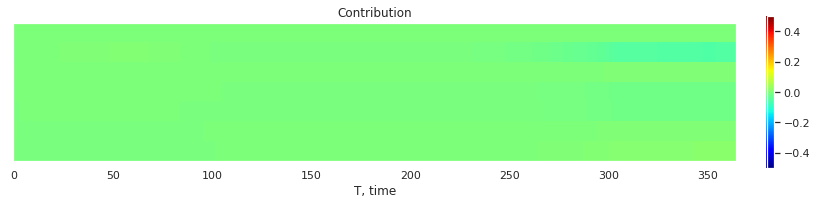

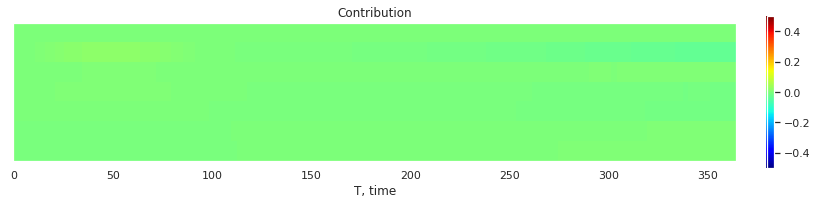

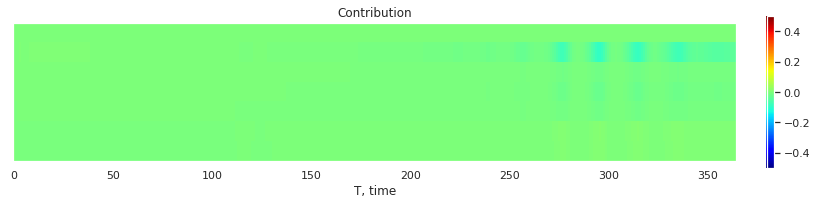

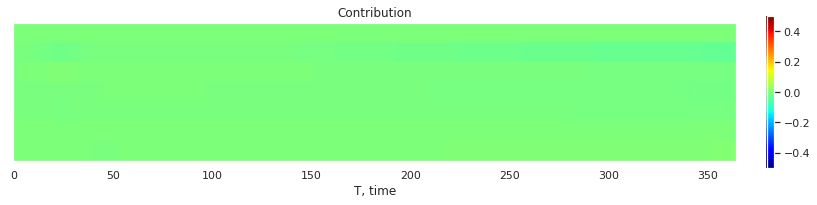

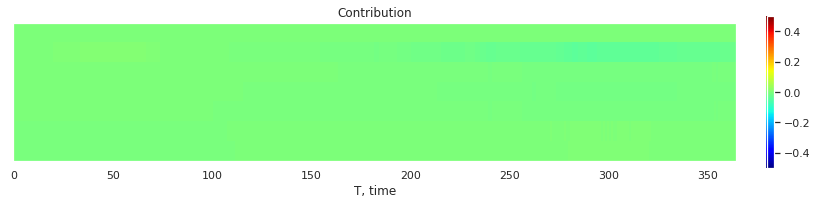

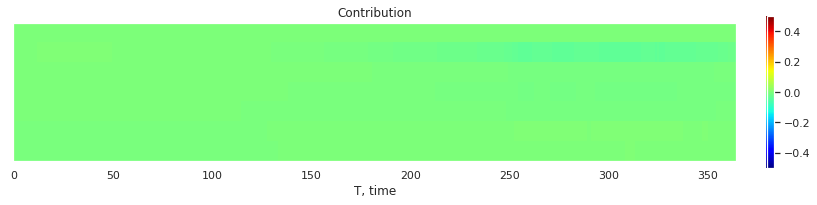

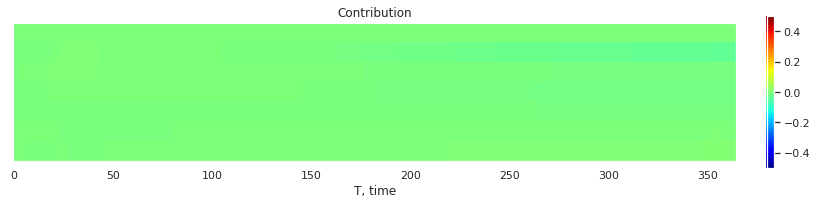

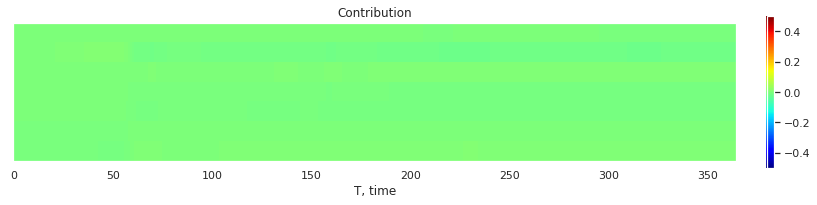

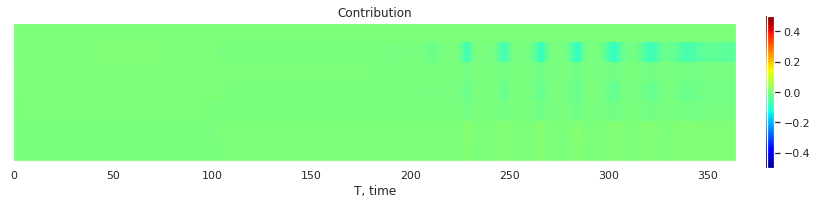

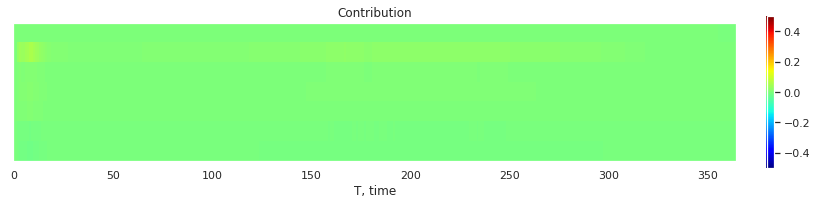

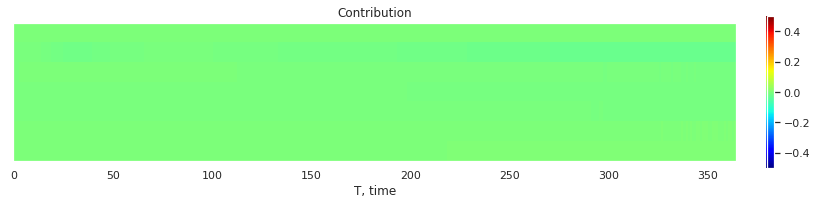

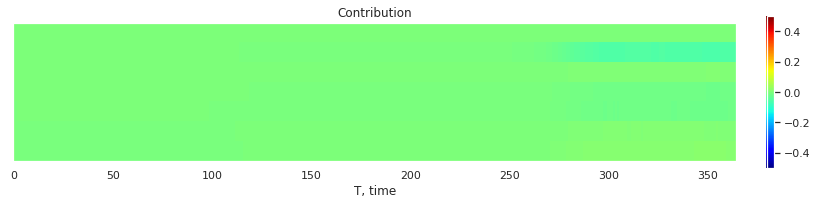

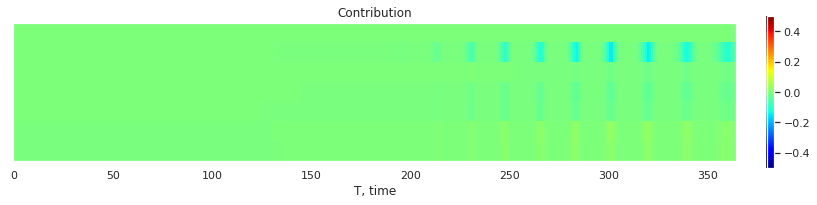

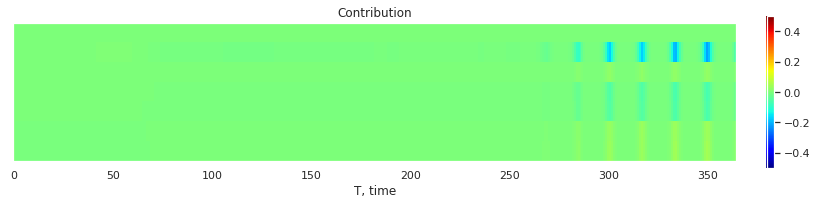

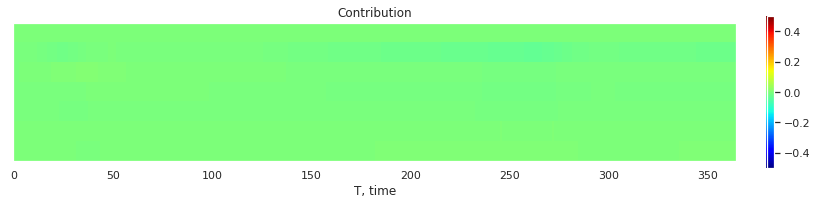

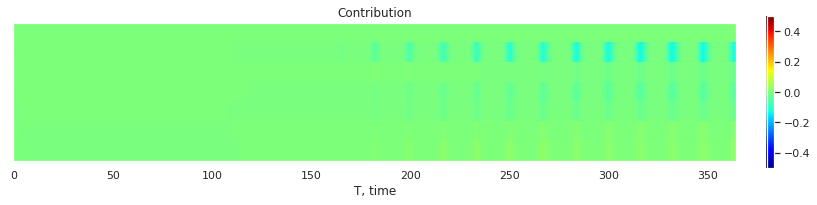

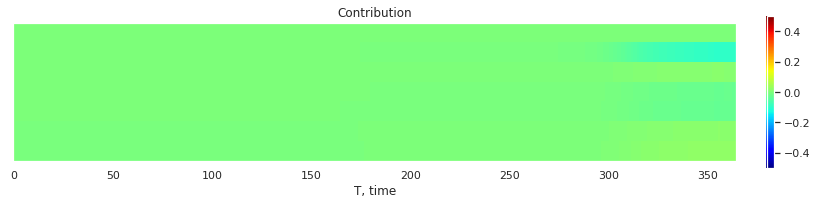

In [691]:
for i in np.where(clustering_neg.labels_ == -1)[0][:20]:
    show(get_mat(i), 10)

In [813]:
T.max(axis=1).min()

0.004618369716851586

In [534]:
T.min(axis=1).max()

0.0

In [535]:
Tp = np.copy(T)
Tp[Tp == 0] = 100

In [623]:
Tp.min(axis=1).max()

0.00038673538127489694

In [577]:
np.where(T[0] < thr)[0].shape

(1829,)

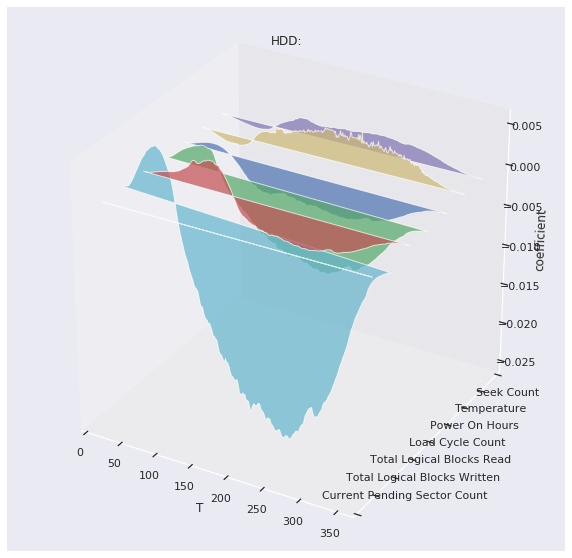

b'HDD:85:0'

In [604]:
plot3d(get_mat(13), mags=False)
raw['names'][13]

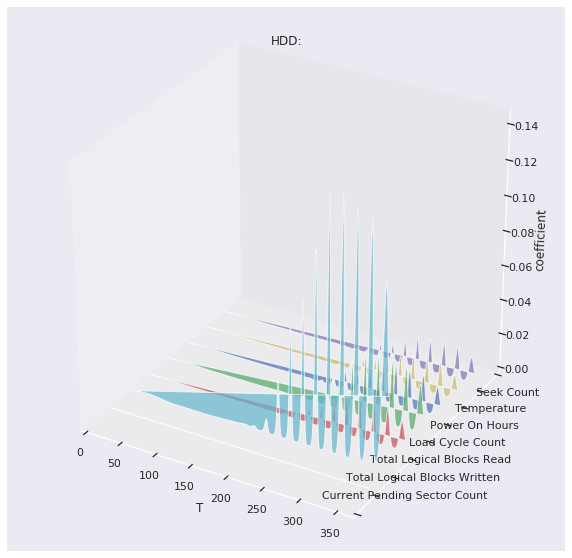

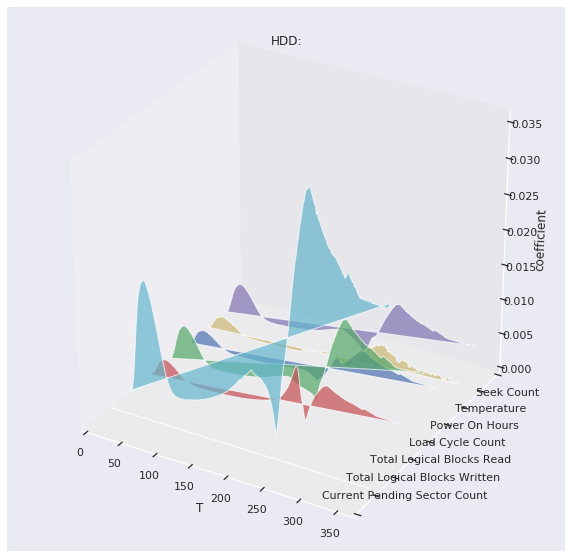

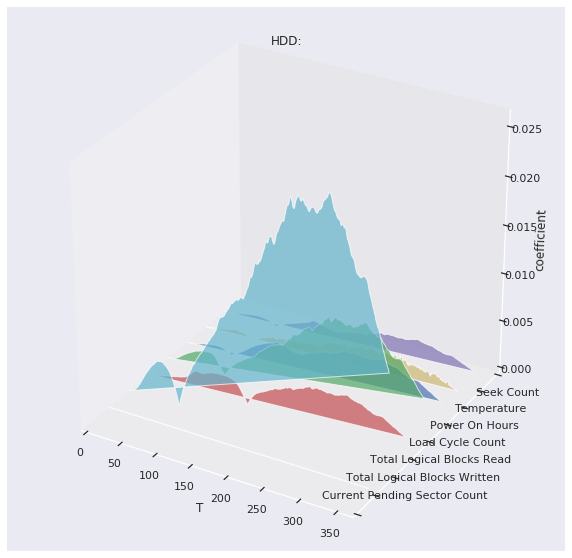

In [594]:
plot3d(get_mat(0))
plot3d(get_mat(33))
plot3d(get_mat(452))

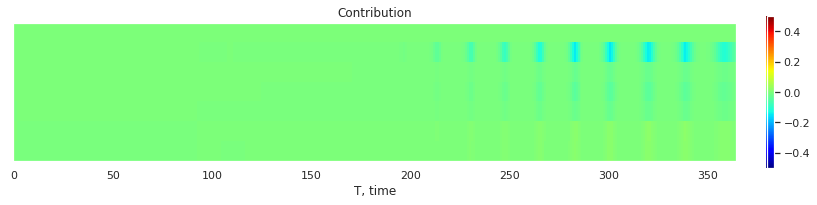

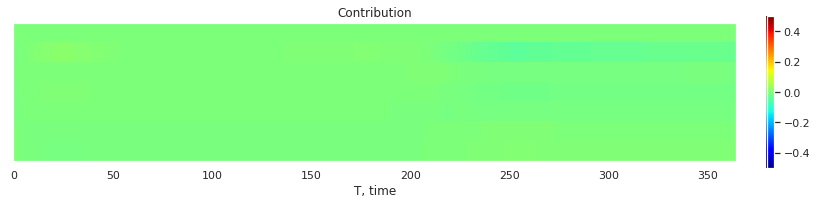

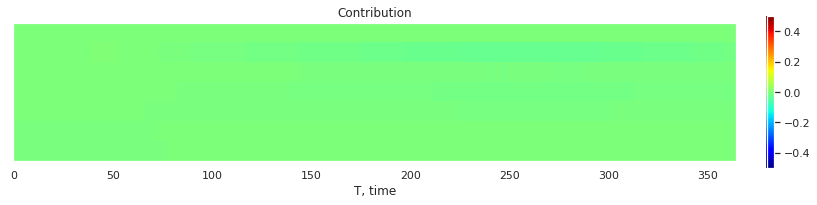

In [588]:
show(get_mat(0), 10)
show(get_mat(33), 10)
show(get_mat(452), 10)

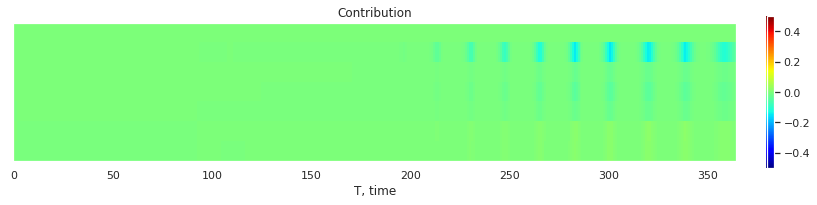

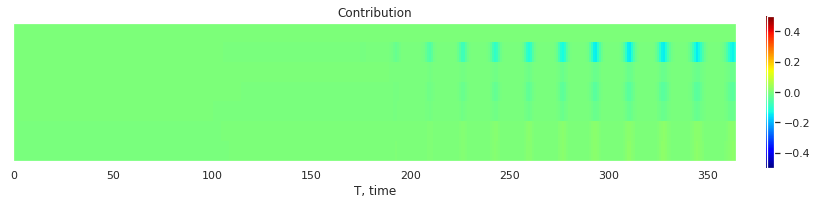

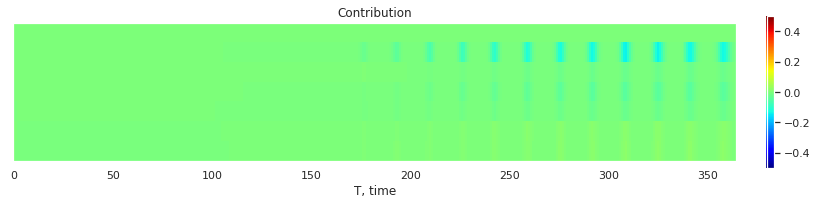

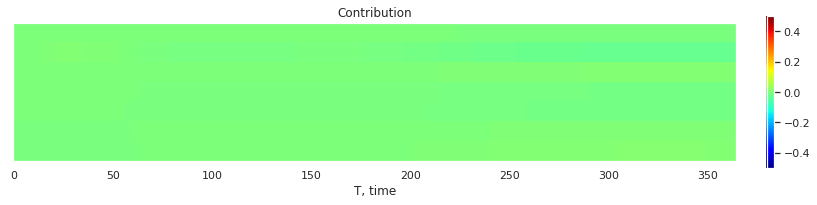

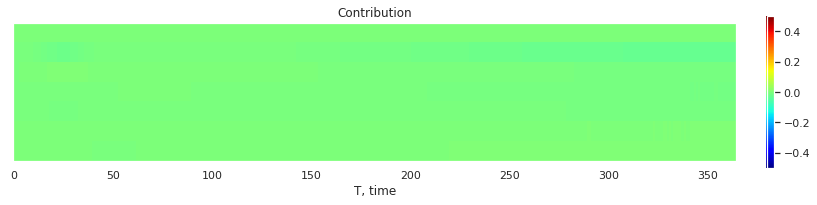

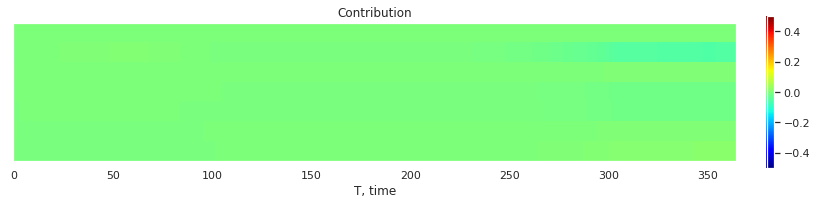

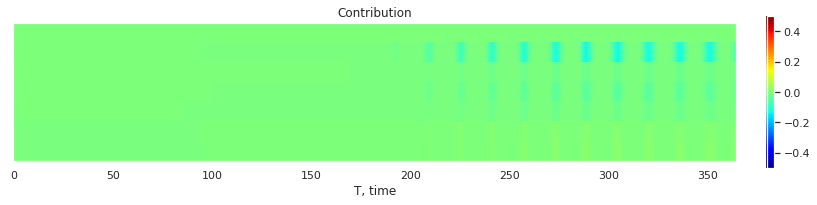

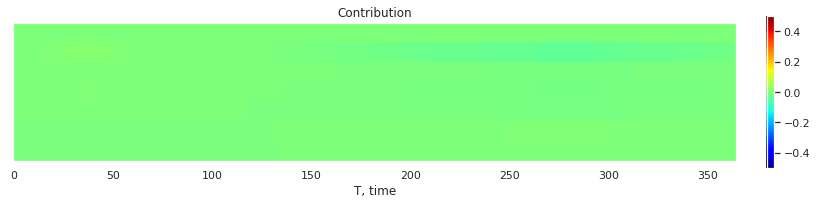

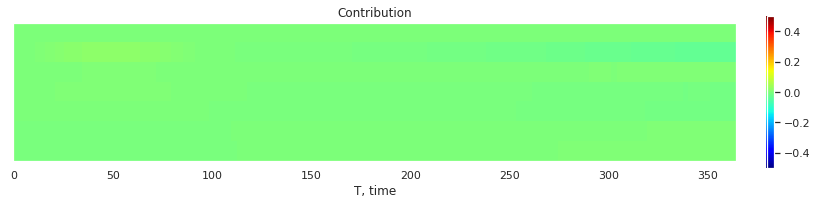

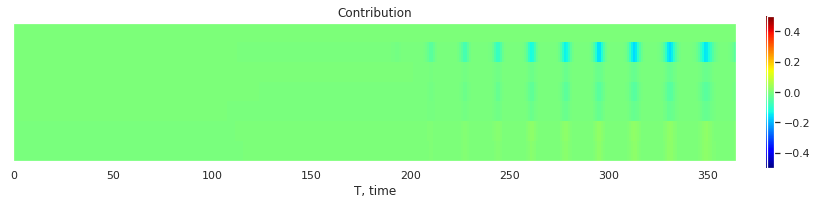

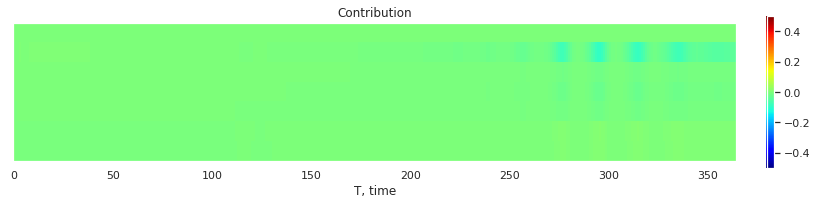

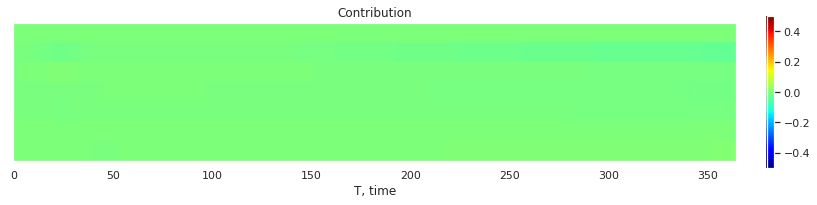

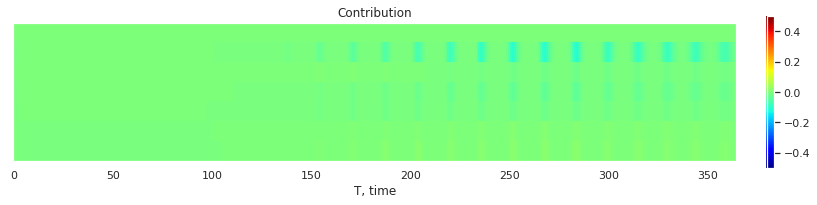

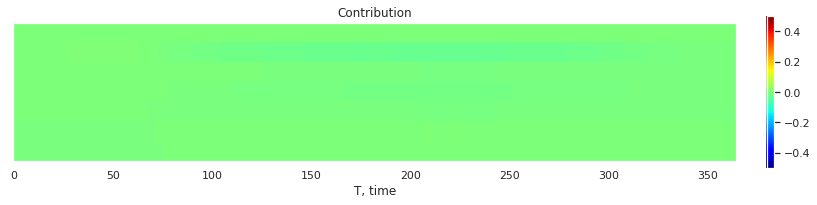

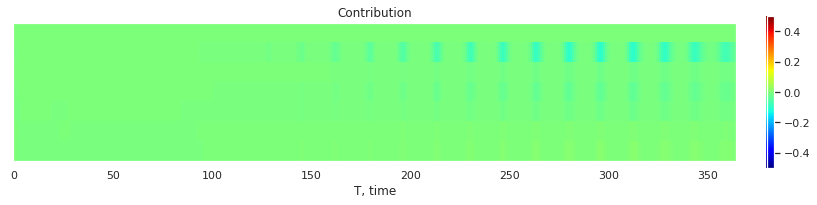

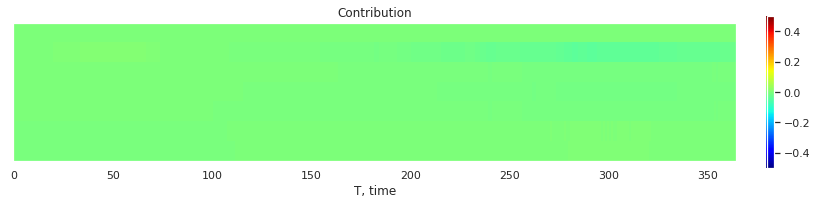

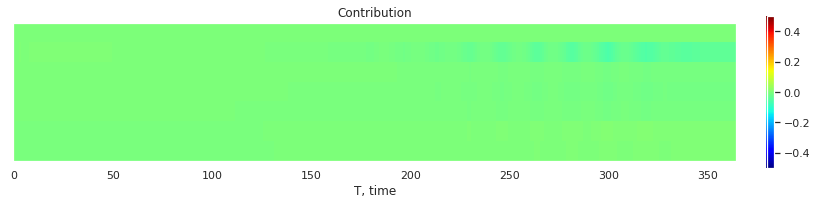

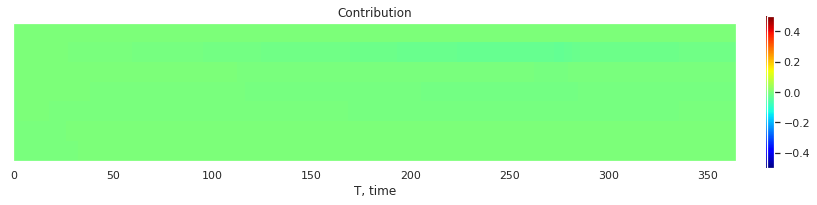

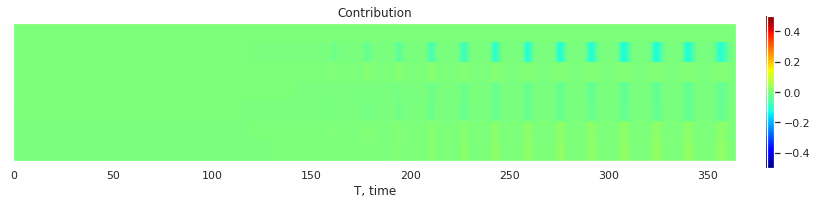

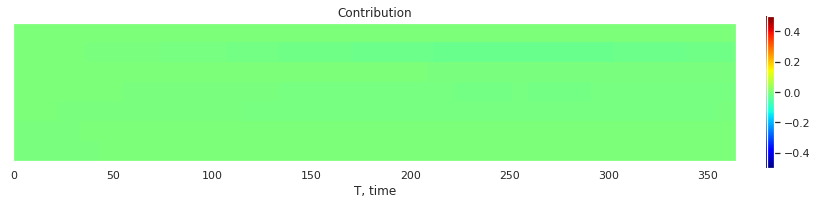

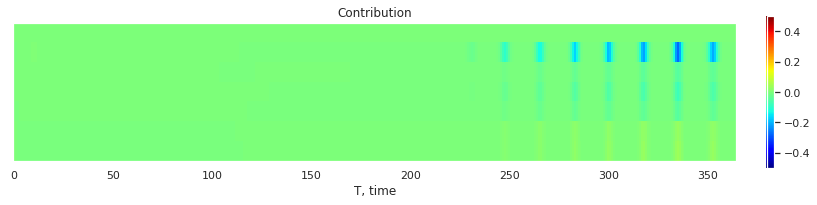

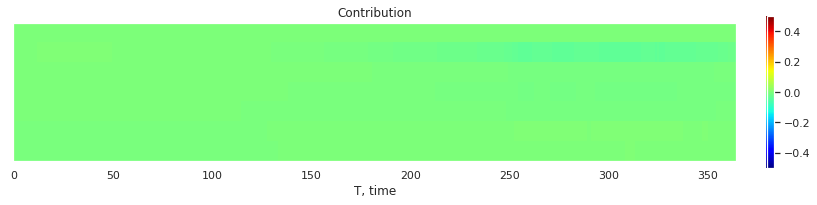

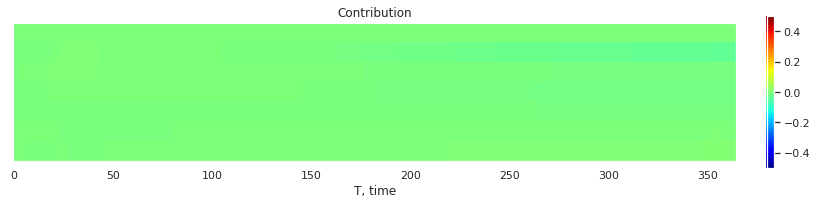

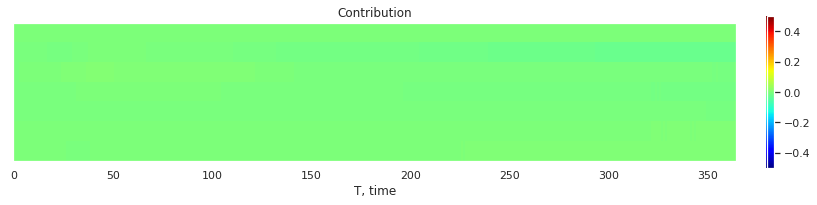

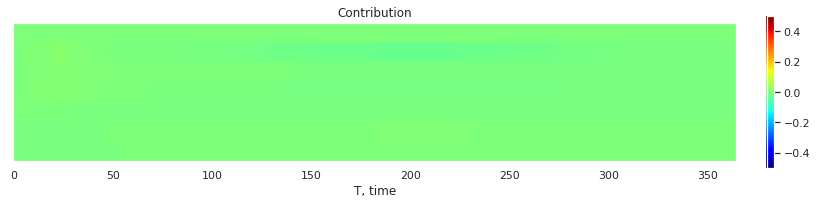

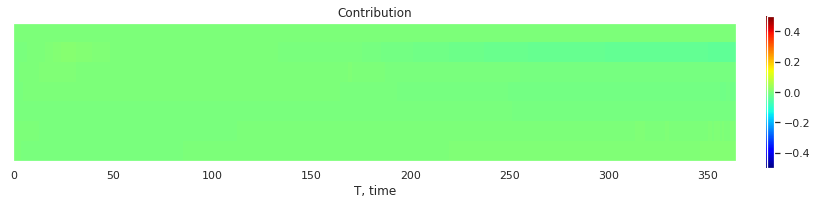

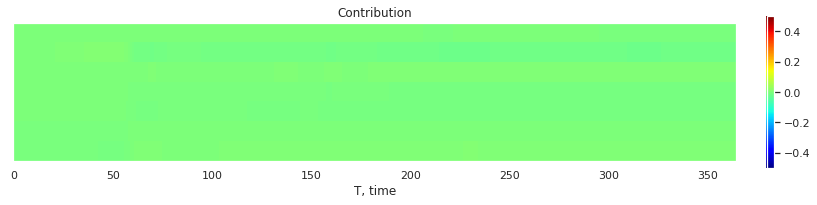

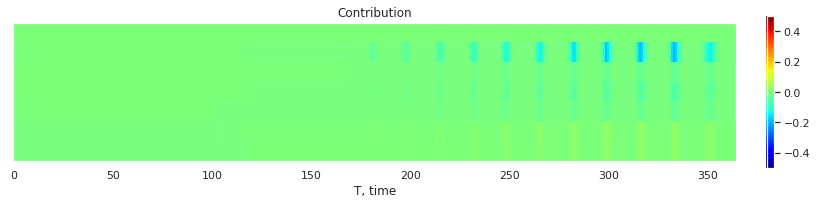

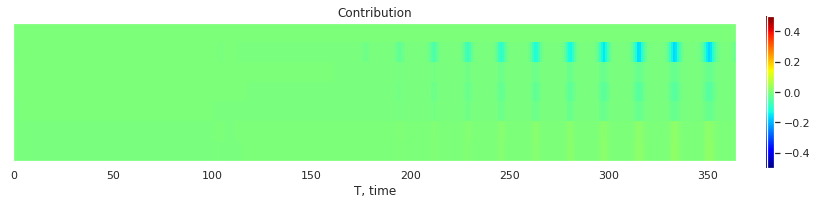

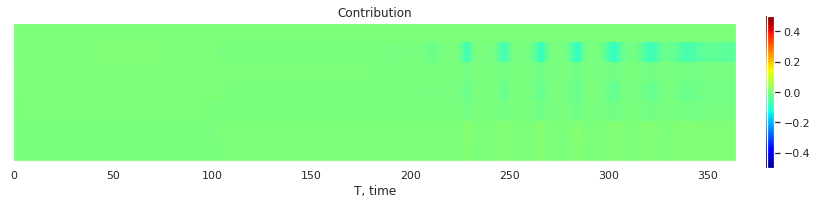

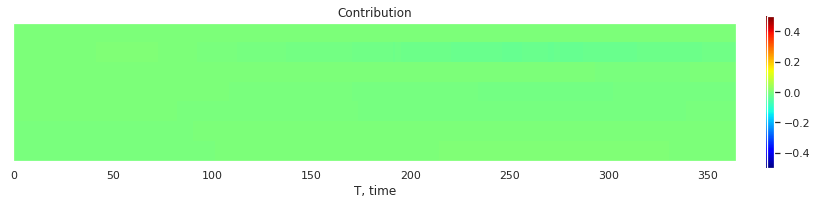

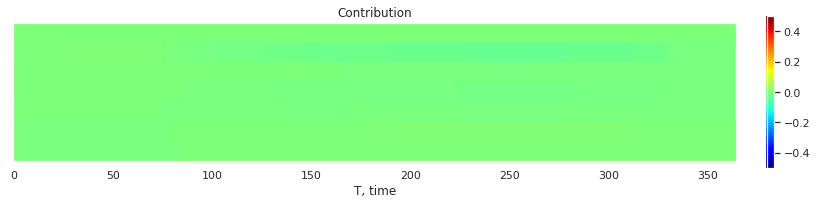

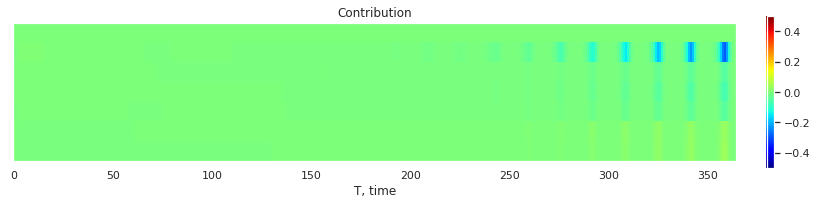

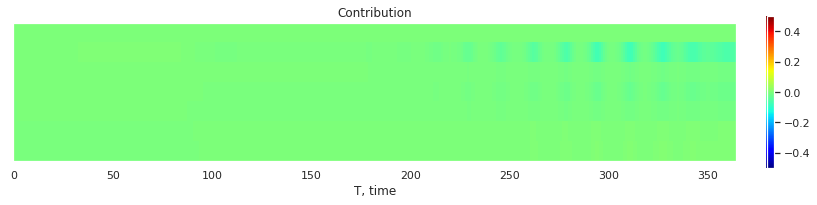

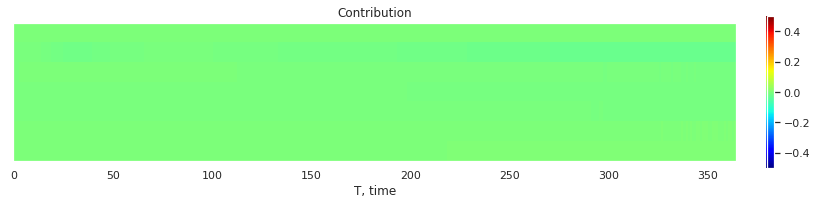

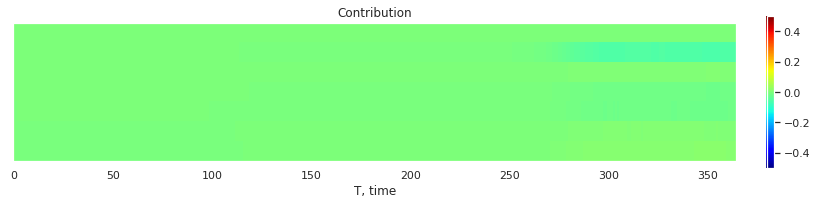

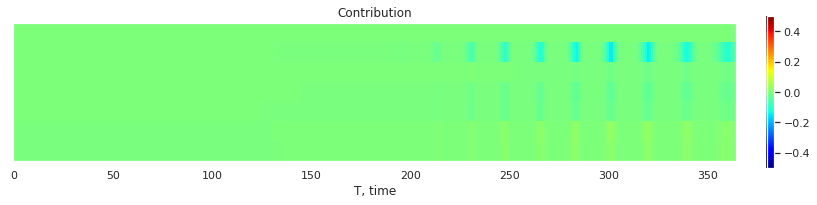

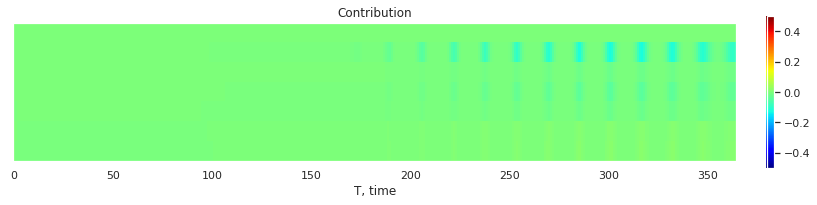

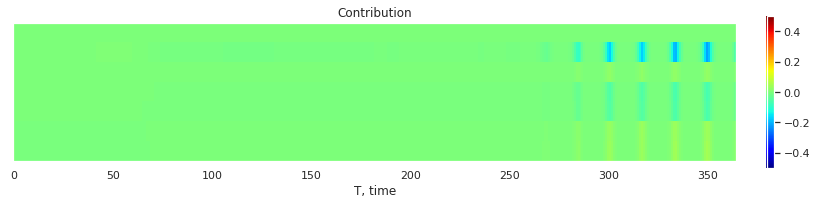

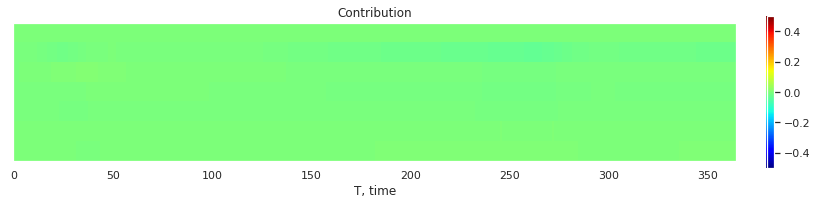

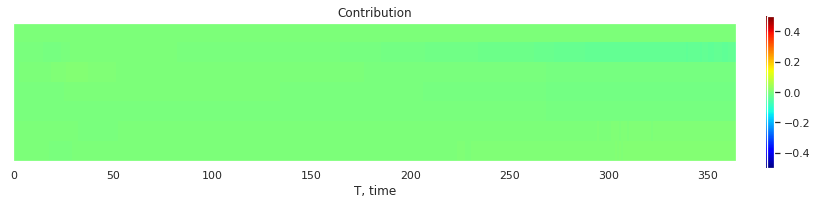

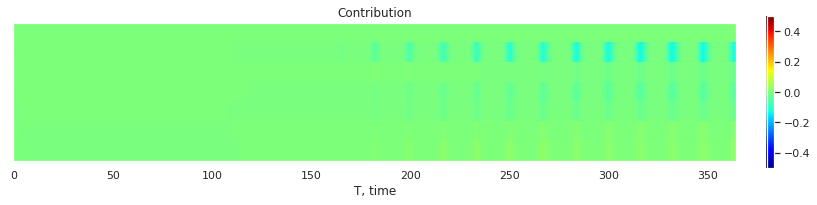

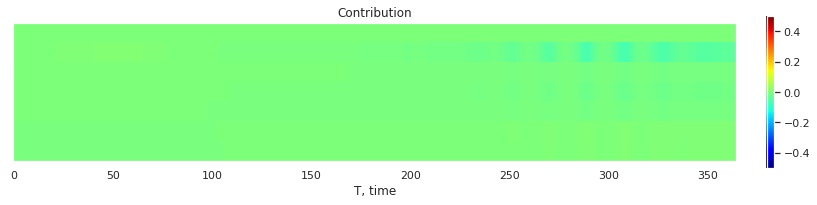

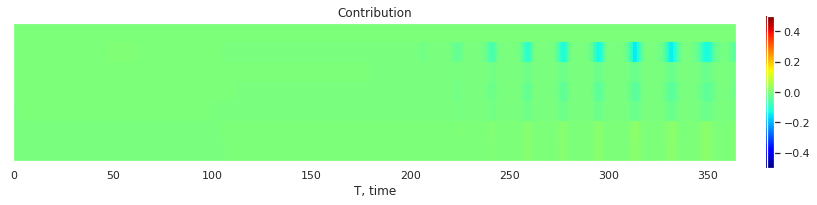

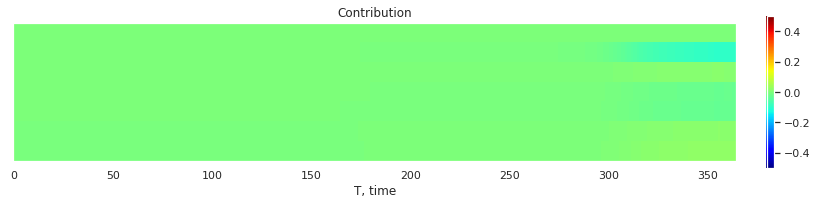

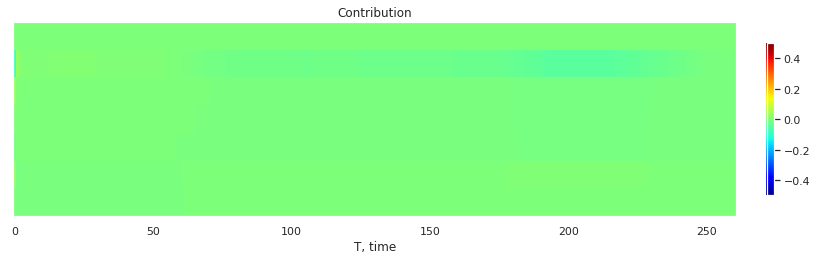

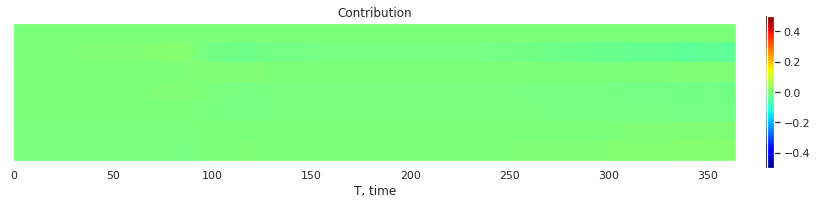

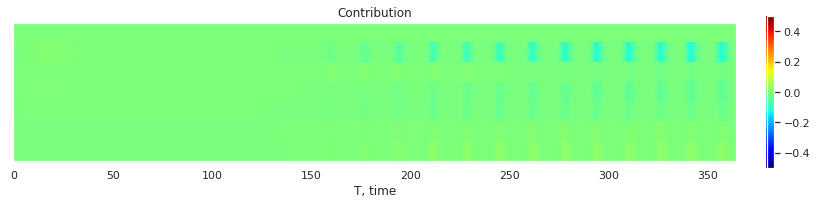

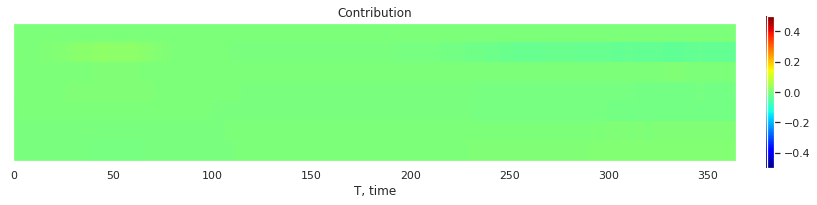

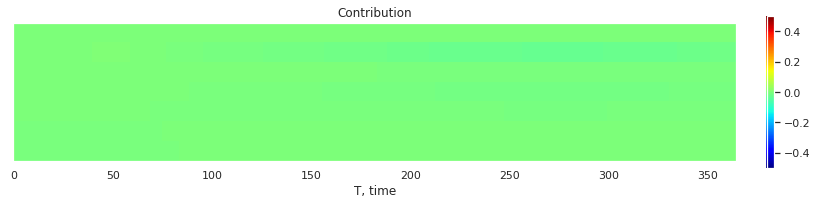

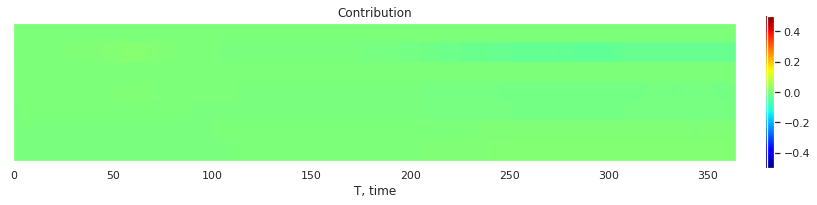

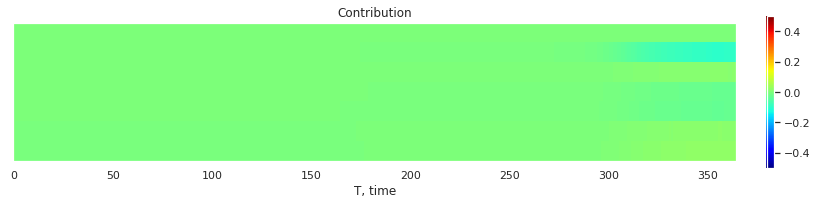

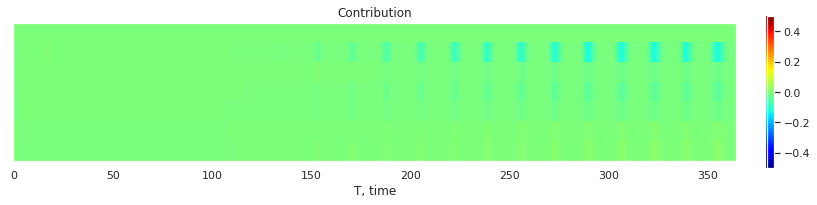

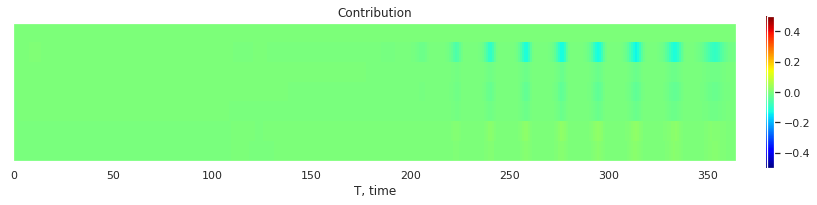

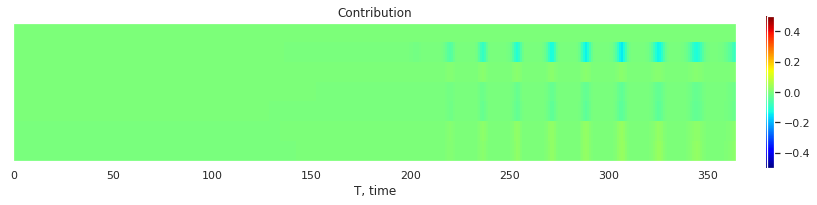

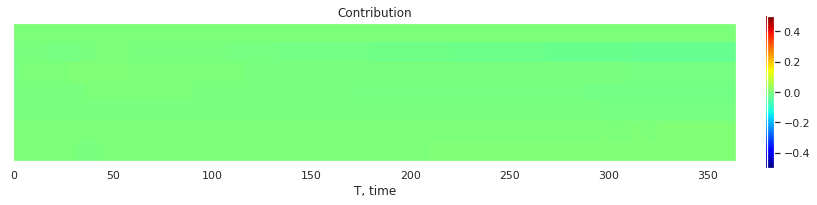

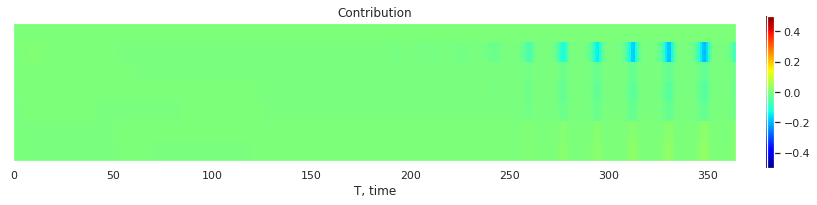

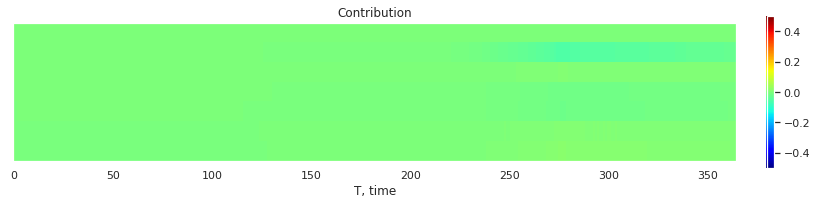

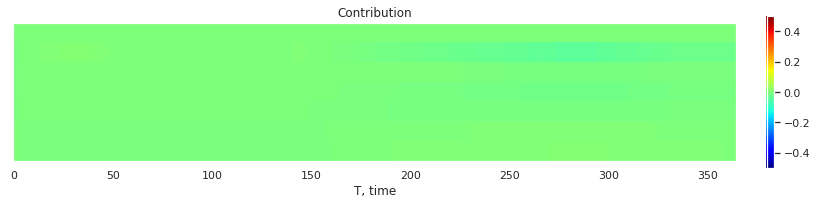

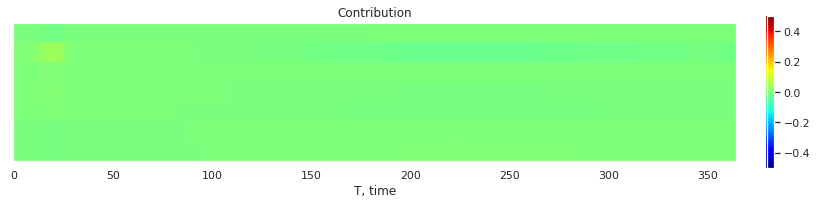

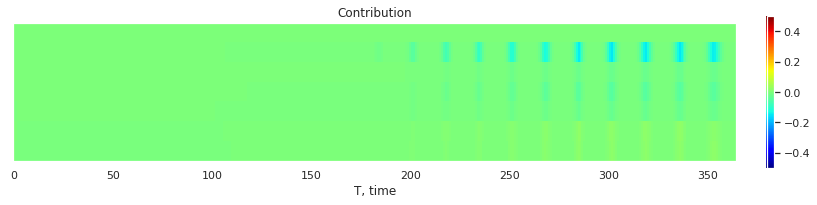

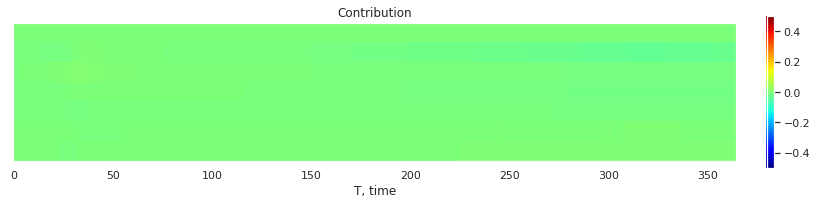

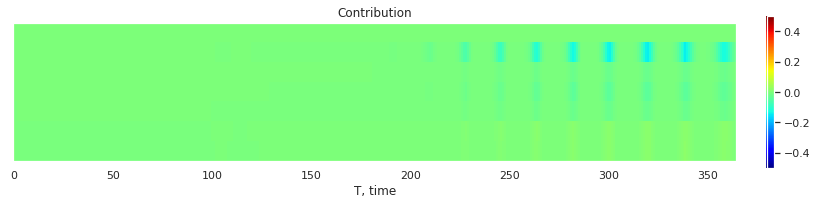

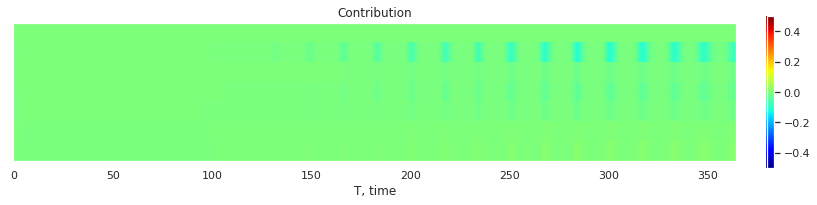

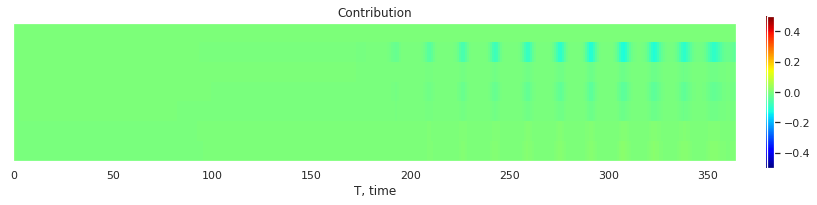

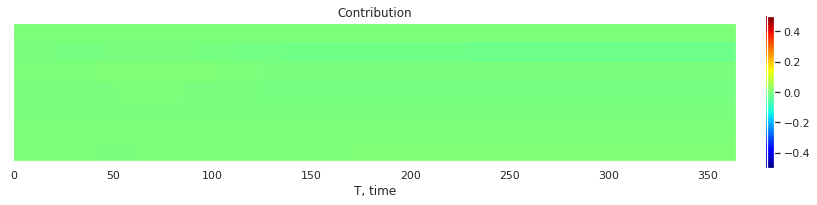

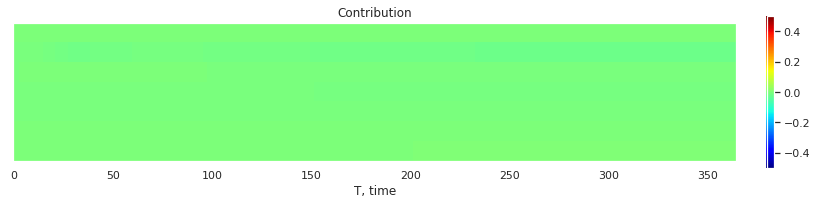

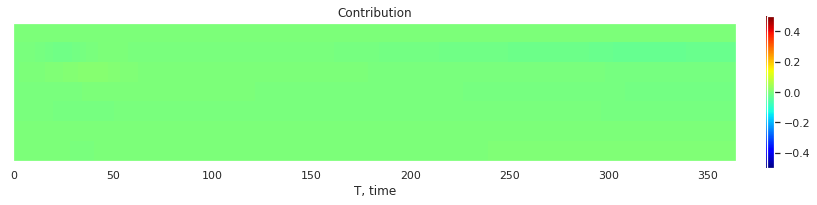

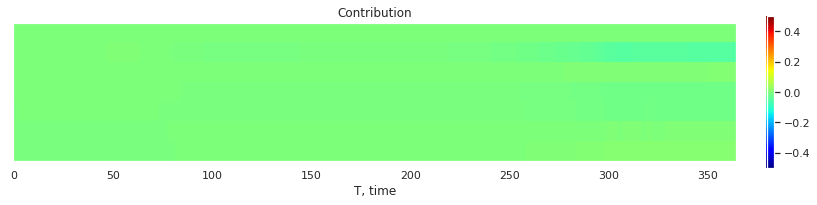

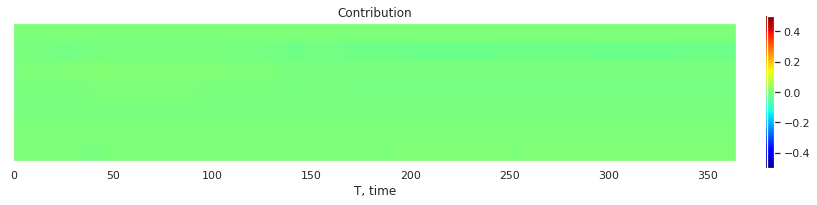

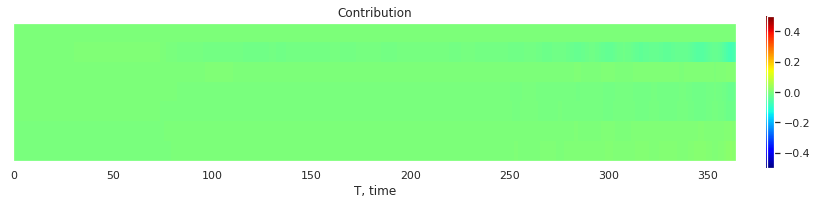

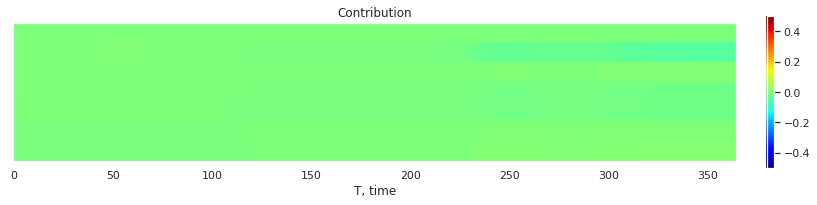

In [590]:
for i in np.where(groups == 0)[0]:
    show(get_mat(i), 10)

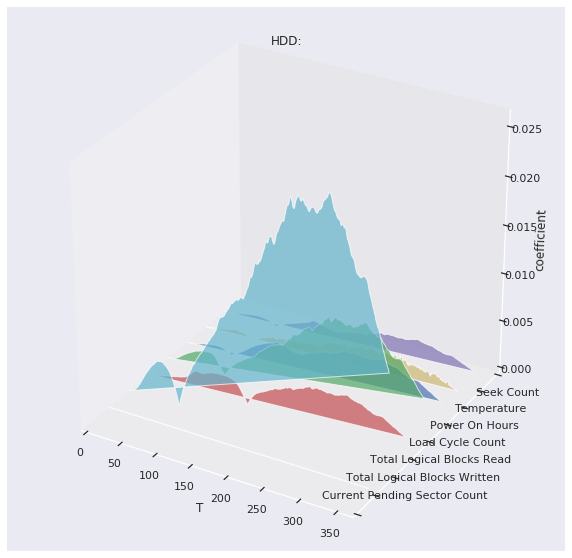

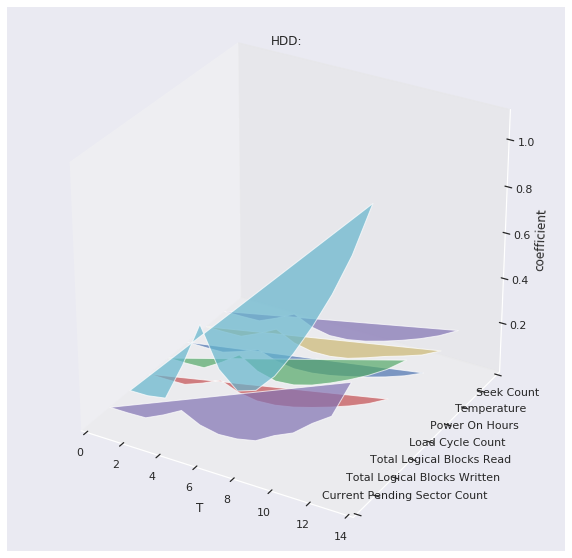

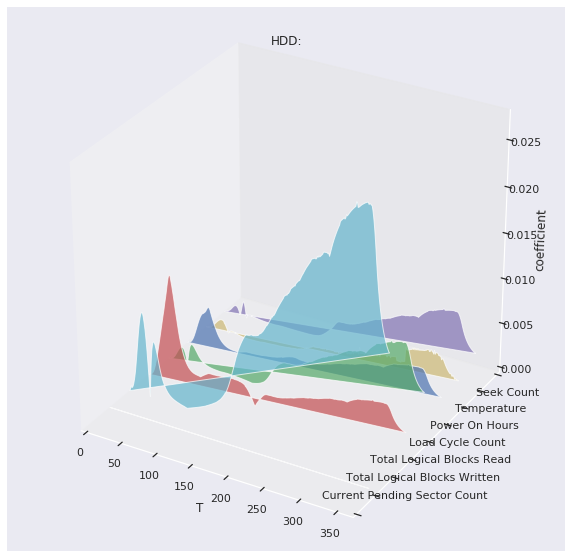

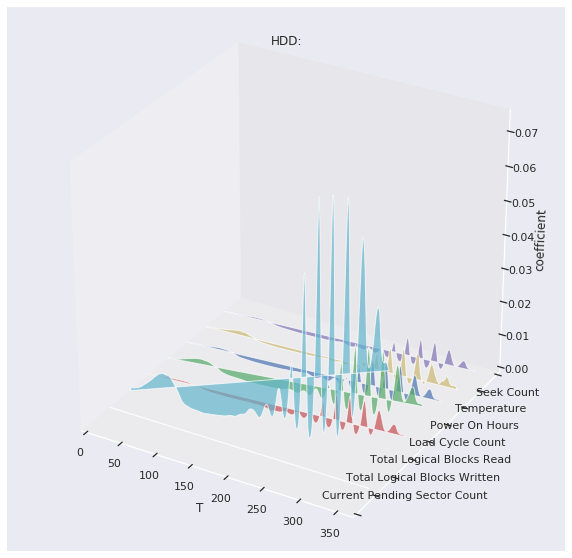

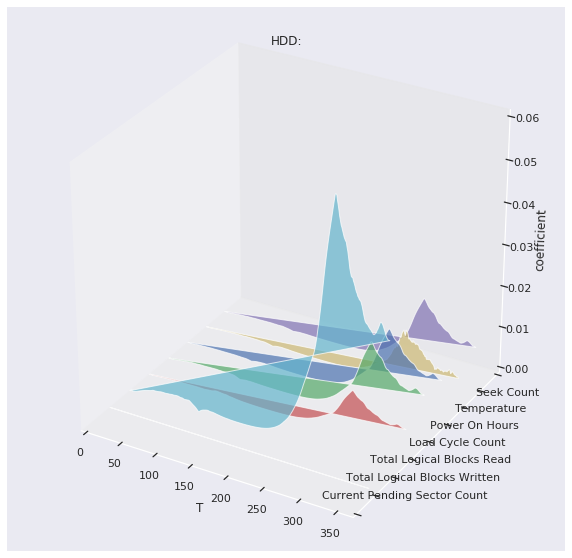

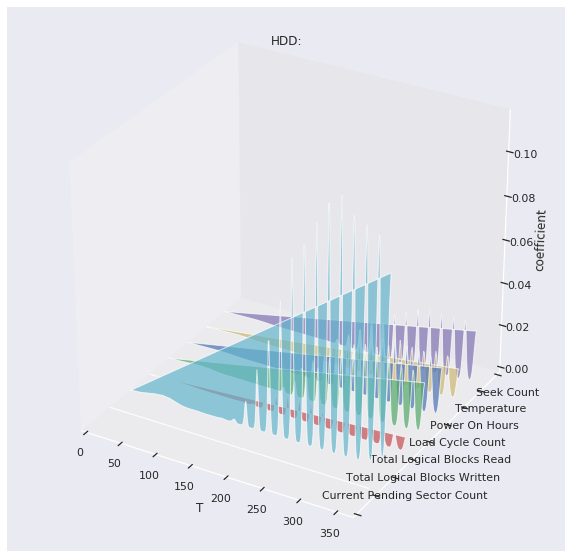

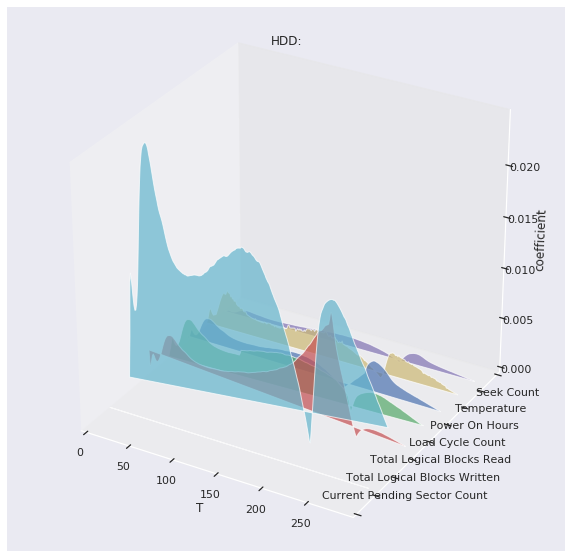

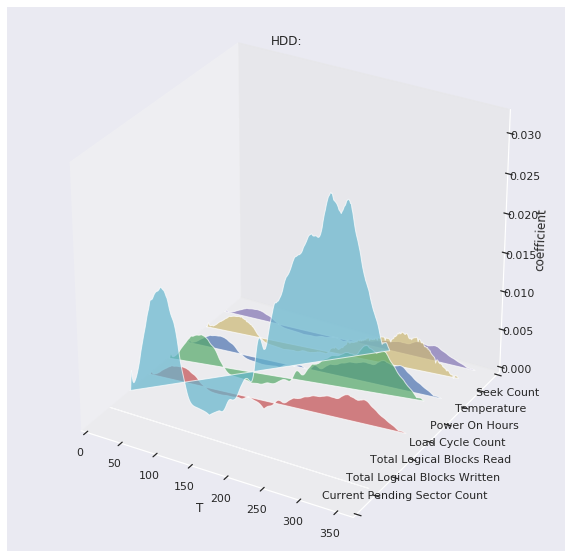

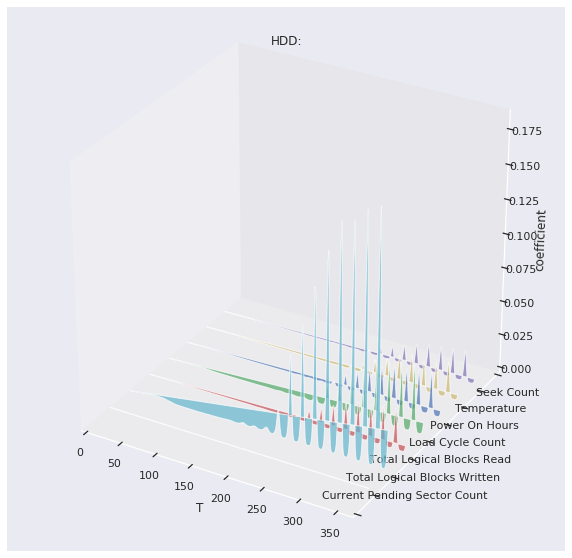

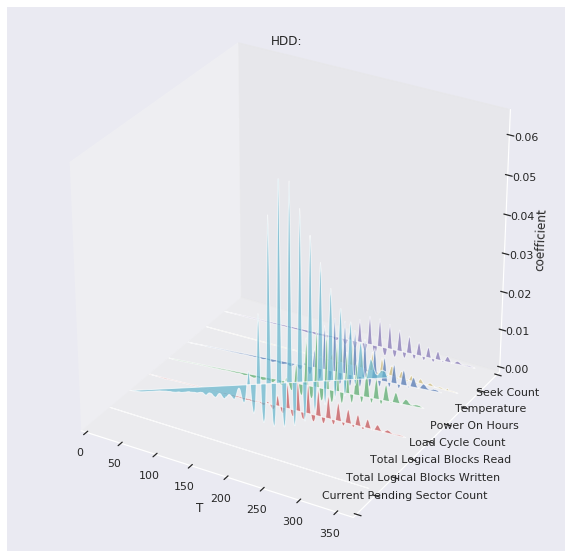

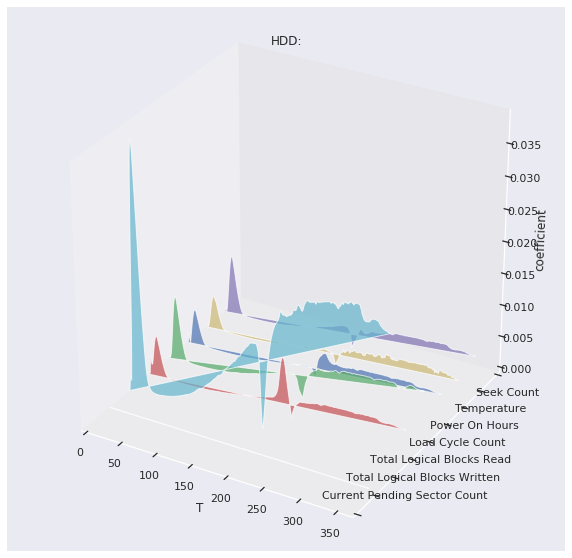

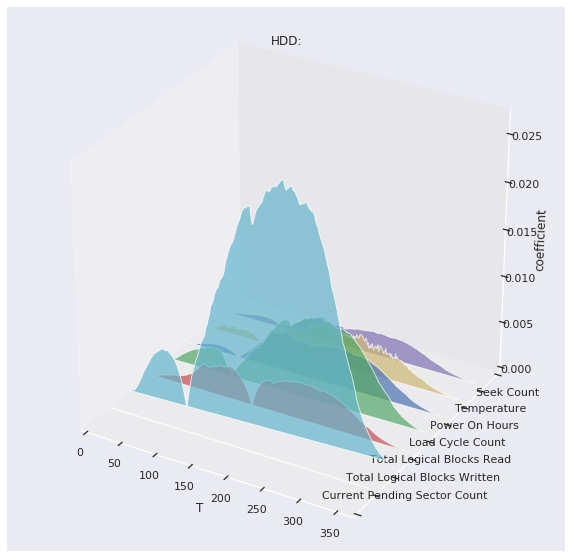

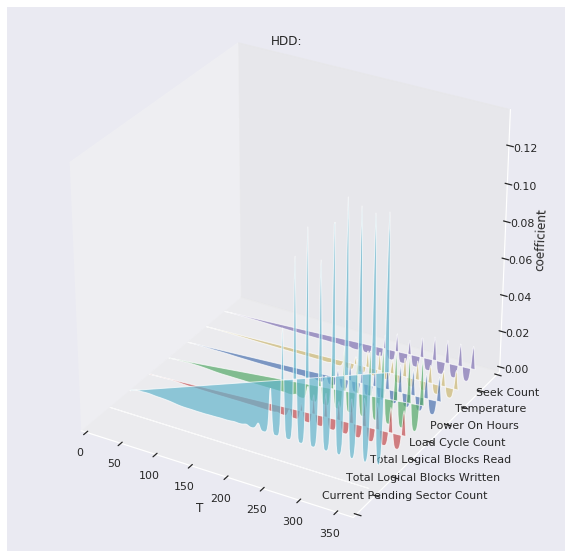

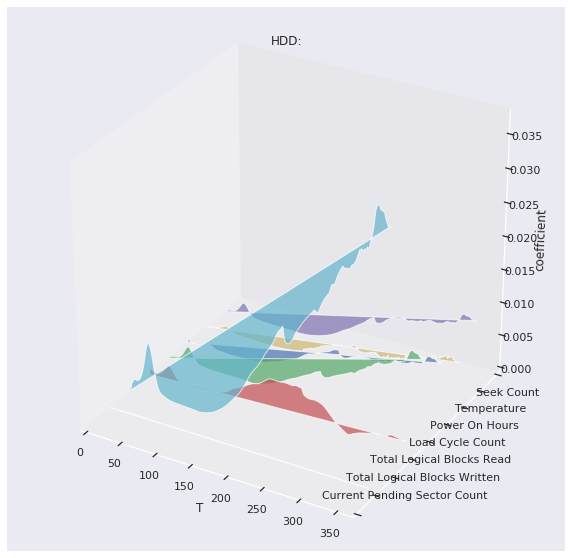

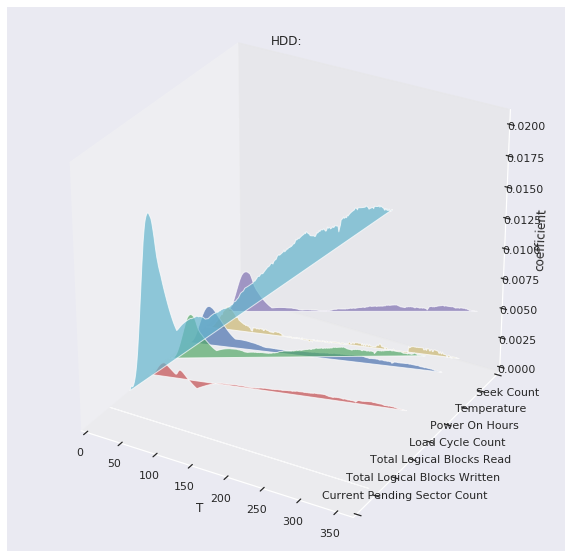

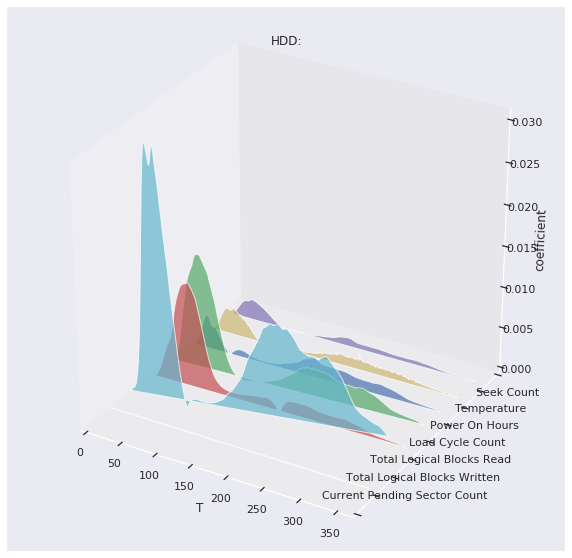

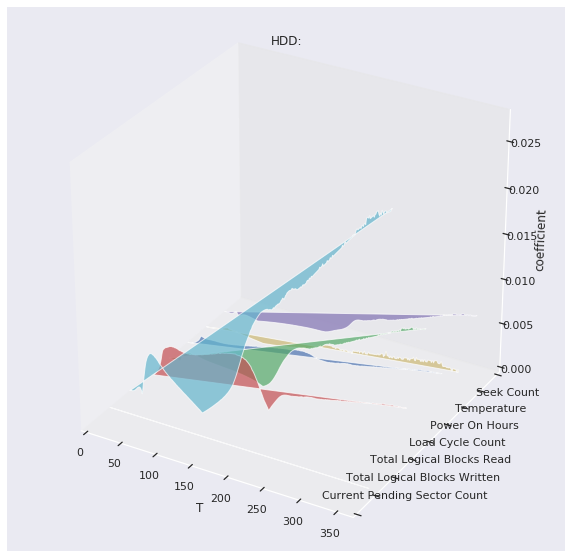

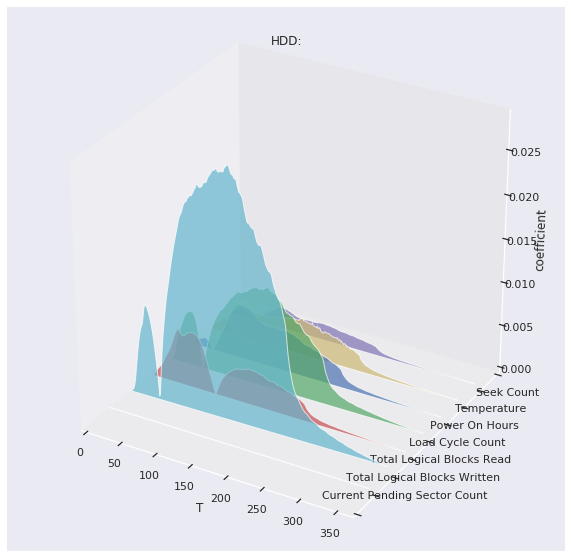

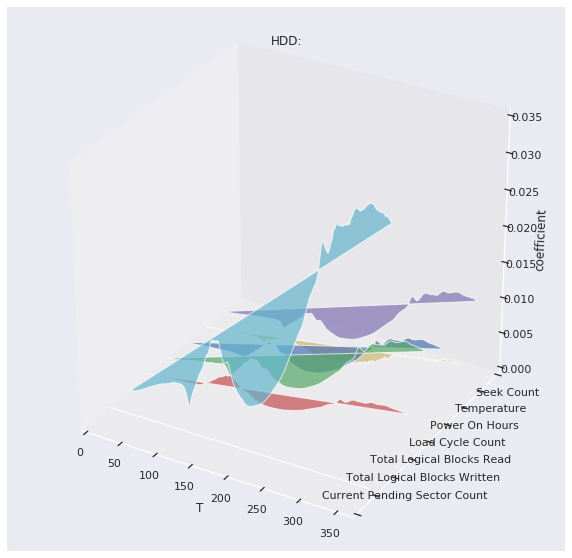

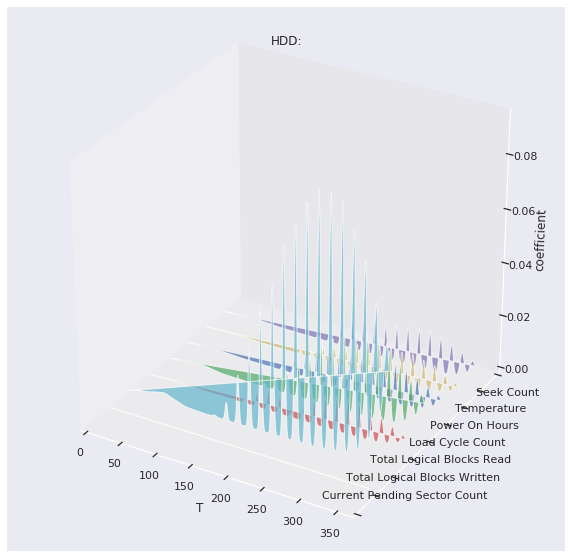

In [596]:
for i in np.where(groups == 452)[0][:20]:
    plot3d(get_mat(i))